In [1]:
%matplotlib inline
import astropy.io.fits as pyfits
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import subprocess as sp
import scipy.ndimage as sci_nd
import glob
import matplotlib.pyplot as mpl
from astropy.table import Table, hstack, join
import sys
import os
from astropy.io import ascii
from astropy.table import Column
import urllib

In [2]:
def read_results_file(fname):
    r""" Reads a galfit HDU cube to get the results for the best fit model,
    which are stored in the header of the cube extension 2. It is assumed that
    a single sersic model was fit.
    Parameters
    ----------
    fname : str
        The name of the result file to read the model parameters from.
    Returns
    -------
    xc : str
        The model X center and its error (separated by whitespace)
    yc : str
        The model Y center and its error (separated by whitespace)
    M : str
        The model magnitude and its error (separated by whitespace)
    R : str
        The model effective radius and its error (separated by whitespace)
    N : str
        The model sersic index and its error (separated by whitespace)
    Q : str
        The model axis ratio and its error (separated by whitespace)
    T : str
        The model position angle and its error (separated by whitespace)
    chi : str
        The reduced chi square value of the fit
    F : str
        A galfit flag indicating the final status of the fit. If 0 everything
        is ok. If 1 it means that GALFIT finished 100 iterations without
        converging. If 2, it means GALFIT results diverged and they cannot
        be trusted,
    References
    ----------
    Examples
    --------
    """
    try:
        hdu=pyfits.open(fname)
        chi=hdu[2].header['CHI2NU']
        xc=hdu[2].header['1_XC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        yc=hdu[2].header['1_YC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        M=hdu[2].header['1_MAG'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        R=hdu[2].header['1_RE'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        N=hdu[2].header['1_N'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        Q=hdu[2].header['1_AR'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        T=hdu[2].header['1_PA'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        F= hdu[2].header['FLAGS'].replace(' ',',')
        if ('1' in F.split(',')):
            F=1
        elif ('2' in F.split(',')):
            F=2
        else:
            F=0
    except IOError:
        xc,yc,M,R,N,Q,T,chi,F="-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99","-99"
    return xc,yc,M,R,N,Q,T,chi,F

In [3]:
masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
#masterdata = ascii.read('/data1/rowland/mastertable')

#masterdata['NUMBER_F850']

# START OF MASTERTABLE W/ KABOOMS

In [4]:
#KEEP - 1 of 4
#gets which galfit runs went kaboom

filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

kaboomis = []
kaboomfs = []
totalrealkaboomn =[]
totalrealkaboomf =[]
#testkaboom =[]
totalgalfitruns = []
totalkaboomN = []
totalkaboomF = []

for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    for num in detect_nums:
            totalgalfitruns.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/output{}.fits'.format(filter,num))
            #xc,yc,M,R,N,Q,T,chi,F = read_results_file('/data1/rowland/{}W/Outputs/output{}.fits'.format(filter,num))

            if F ==2:
                print(num,filter,'has suspected numerical converence error in current solution')
                totalkaboomN.append(num)
                totalkaboomF.append(filter)
                kaboomfs.append(filter)
                kaboomis.append(num)
                #testkaboom.append(({filter},num))
            #elif F == 0: #good runs
             #   print(num,filter)
            elif F == "-99":
                print(num,filter, 'went Kaboom')
                totalkaboomN.append(num)
                totalkaboomF.append(filter)
                totalrealkaboomn.append(num)
                totalrealkaboomf.append(filter)
            elif F ==1:
                print(num,filter,'error of ususally max #of iterations reached, but sometimes header/psf/image missing')
            else:
                continue
print(np.shape(kaboomis),'errors, plus',np.shape(totalrealkaboomn),'kabooms, out of ',np.shape(totalgalfitruns),'galfit runs of individual detections')
print(np.shape(totalkaboomN),np.shape(totalkaboomF)) #check this!!!!!!

1 F105W has suspected numerical converence error in current solution
4 F105W has suspected numerical converence error in current solution
5 F105W has suspected numerical converence error in current solution
6 F105W has suspected numerical converence error in current solution
7 F105W has suspected numerical converence error in current solution
8 F105W has suspected numerical converence error in current solution
9 F105W has suspected numerical converence error in current solution
10 F105W has suspected numerical converence error in current solution
12 F105W has suspected numerical converence error in current solution
14 F105W has suspected numerical converence error in current solution
15 F105W has suspected numerical converence error in current solution
16 F105W has suspected numerical converence error in current solution
19 F105W has suspected numerical converence error in current solution
20 F105W has suspected numerical converence error in current solution
21 F105W has suspected nume

15 F625W has suspected numerical converence error in current solution
19 F625W has suspected numerical converence error in current solution
20 F625W went Kaboom
24 F625W has suspected numerical converence error in current solution
26 F625W has suspected numerical converence error in current solution
29 F625W has suspected numerical converence error in current solution
33 F625W has suspected numerical converence error in current solution
40 F625W went Kaboom
42 F625W has suspected numerical converence error in current solution
45 F625W has suspected numerical converence error in current solution
46 F625W went Kaboom
49 F625W has suspected numerical converence error in current solution
50 F625W has suspected numerical converence error in current solution
53 F625W has suspected numerical converence error in current solution
54 F625W has suspected numerical converence error in current solution
55 F625W has suspected numerical converence error in current solution
62 F625W has suspected nume

In [5]:
#KEEP 2 of 4


realkb = Table([totalkaboomN,totalkaboomF], names=('detection_number', 'filter'))
T105kb = realkb[np.where(realkb['filter']==filters[0])]
T125kb = realkb[np.where(realkb['filter']==filters[1])]
T140kb = realkb[np.where(realkb['filter']==filters[2])]
T160kb = realkb[np.where(realkb['filter']==filters[3])]
T435kb = realkb[np.where(realkb['filter']==filters[4])]
T606kb = realkb[np.where(realkb['filter']==filters[5])]
T625kb = realkb[np.where(realkb['filter']==filters[6])]
T775kb = realkb[np.where(realkb['filter']==filters[7])]
T814kb = realkb[np.where(realkb['filter']==filters[8])]
T850Lkb = realkb[np.where(realkb['filter']==filters[9])]
mytableskb = [T105kb,T125kb,T140kb,T160kb,T435kb,T606kb,T625kb,T775kb,T814kb,T850Lkb]

In [6]:
#KEEP -3 of 4
#doing all below in one cycle--WORKS

masks=[]
allfilters=[]
mastermatch = []
idx=[]

#matches kaboom index (in detection order) with masterdata index (that includes masked nondetections)
for i,f in enumerate(filters):
    if f == 'F850LP':
        fn = f[:-2]
        tn = f[1:-2]
    else:
        fn = f[:-1]
        tn = f[1:-1]
    arr1 = (np.where(masterdata['NUMBER_{}'.format(fn)] > 0)[0])
    
#need to add in here but keep flags...maybe not bc will need to rerun all regardless of F=2 or ='-99' 
#didnt keep flags just did all b/c need to rerun both flags
    arr2 = mytableskb[i]['detection_number'].astype('int')
    newarr = np.zeros(len(arr1))
    newarr[:] = np.nan
    newarr[arr2] = arr1[arr2]
    masks.append(newarr)
for mask in masks:
    eachfilter = mask[~np.isnan(mask)]
    allfilters.append(eachfilter)
for i in allfilters:
    arr3 = np.arange(0,len(masterdata),1) 
    arr4 = i.astype('int')
    newerarr = np.zeros(len(arr3))
    newerarr[:] = np.nan
    newerarr[arr4] = arr3[arr4]
    mastermatch.append(newerarr)
    
#gets index when there was never a z match per filter
for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
        idx.append(indices)
    else:
        tfilter = filter[:-1]
        indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
        idx.append(indices)
            
#creates 0 & 1 table of galfit runs for kaboom or not
mastermatch = np.array(mastermatch)
print('shape:',np.shape(mastermatch))
mastermatch[np.where(mastermatch>=0.0)]=1 #1 means had a kaboom
mastermatch[np.where(mastermatch!=1.)]=0 #0 means no kaboom

#makes nongalfit runs into nan values
for i,master in enumerate(mastermatch):
    master[idx[i]]=np.nan

    
#add diff flag here, except will mess up sums, so idk...maybe later if theres a benefit b/c gotta rerun regardless
    
    
#gets total num of kabooms per detection, another column to add
sums = np.nansum(mastermatch,axis=0).astype('int') 

shape: (10, 89)


/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater_equal


In [7]:
masterkabooms = Table([masterdata['recno'],mastermatch[0],mastermatch[1],mastermatch[2],mastermatch[3],mastermatch[4],\
                       mastermatch[5],mastermatch[6],mastermatch[7],mastermatch[8],mastermatch[9],\
                      sums],names=("recno","F105_kabooms","F125_kabooms","F140_kabooms","F160_kabooms","F435_kabooms","F606_kabooms","F625_kabooms","F775_kabooms","F814_kabooms","F850_kabooms","KaboomTotals"))
print('1=kaboom;    0=good first run;    nan=never ran bc no z match')
masterkabooms

1=kaboom;    0=good first run;    nan=never ran bc no z match


<Table masked=True length=89>
recno F105_kabooms F125_kabooms ... F814_kabooms F850_kabooms KaboomTotals
int64   float64      float64    ...   float64      float64       int64    
----- ------------ ------------ ... ------------ ------------ ------------
    1          0.0          0.0 ...          0.0          0.0            1
    2          1.0          1.0 ...          1.0          0.0            7
    3          0.0          0.0 ...          1.0          0.0            1
    4          0.0          0.0 ...          1.0          0.0            5
    5          1.0          0.0 ...          1.0          0.0            2
    6          nan          nan ...          nan          nan            1
    7          1.0          1.0 ...          0.0          1.0            7
    8          1.0          1.0 ...          nan          0.0            2
    9          1.0          0.0 ...          1.0          0.0            3
   10          1.0          1.0 ...          1.0          0.0            4
  ...          ...          ... ...          ...          ...          ...
   80          0.0          1.0 ...          0.0          0.0            1
   81          nan          nan ...          nan          0.0            3
   82          nan          nan ...          nan          1.0            1
   83          nan          nan ...          nan          nan            0
   84          nan          nan ...          nan          0.0            0
   85          nan          nan ...          1.0          1.0            3
   86          nan          nan ...          nan          nan            0
   87          nan          nan ...          nan          nan            1
   88          nan          nan ...          nan          nan            0
   89          nan          nan ...          nan          0.0            0

In [8]:
len(masterkabooms[np.where(masterkabooms['KaboomTotals']==0.0)]) 
#number of galaxies with no kabooms but idk how many had detections to begin with

19

In [9]:
#merge kabooms with masterdata
masterdata_wkabooms = join(masterdata,masterkabooms, keys='recno')
masterdata_wkabooms[83]

<Row index=83 masked=True>
  ACT-CL          SMH              RAJ2000             DEJ2000         imag          z            e_z     rcc      MSF     Simbad recno NUMBER_F105 MAG_AUTO_F105 MAGERR_AUTO_F105 KRON_RADIUS_F105 ISOAREA_IMAGE_F105 XPEAK_IMAGE_F105 YPEAK_IMAGE_F105 X_IMAGE_F105 Y_IMAGE_F105 ALPHA_J2000_F105 DELTA_J2000_F105 A_IMAGE_F105 THETA_IMAGE_F105 MU_MAX_F105 ELLIPTICITY_F105 CLASS_STAR_F105 FLUX_RADIUS_F105 Separation_1 NUMBER_F125 MAG_AUTO_F125 MAGERR_AUTO_F125 KRON_RADIUS_F125 ISOAREA_IMAGE_F125 XPEAK_IMAGE_F125 YPEAK_IMAGE_F125 X_IMAGE_F125 Y_IMAGE_F125 ALPHA_J2000_F125 DELTA_J2000_F125 A_IMAGE_F125 THETA_IMAGE_F125 MU_MAX_F125 ELLIPTICITY_F125 CLASS_STAR_F125 FLUX_RADIUS_F125 Separation_1a NUMBER_F140 MAG_AUTO_F140 MAGERR_AUTO_F140 KRON_RADIUS_F140 ISOAREA_IMAGE_F140 XPEAK_IMAGE_F140 YPEAK_IMAGE_F140 X_IMAGE_F140 Y_IMAGE_F140 ALPHA_J2000_F140 DELTA_J2000_F140 A_IMAGE_F140 THETA_IMAGE_F140 MU_MAX_F140 ELLIPTICITY_F140 CLASS_STAR_F140 FLUX_RADIUS_F140 Separation_1b NUMBER_F160 MAG_AUTO_F160 MAGERR_AUTO_F160 KRON_RADIUS_F160 ISOAREA_IMAGE_F160 XPEAK_IMAGE_F160 YPEAK_IMAGE_F160 X_IMAGE_F160 Y_IMAGE_F160 ALPHA_J2000_F160 DELTA_J2000_F160 A_IMAGE_F160 THETA_IMAGE_F160 MU_MAX_F160 ELLIPTICITY_F160 CLASS_STAR_F160 FLUX_RADIUS_F160 Separation_1c NUMBER_F435 MAG_AUTO_F435 MAGERR_AUTO_F435 KRON_RADIUS_F435 ISOAREA_IMAGE_F435 XPEAK_IMAGE_F435 YPEAK_IMAGE_F435 X_IMAGE_F435 Y_IMAGE_F435 ALPHA_J2000_F435 DELTA_J2000_F435 A_IMAGE_F435 THETA_IMAGE_F435 MU_MAX_F435 ELLIPTICITY_F435 CLASS_STAR_F435 FLUX_RADIUS_F435 Separation_1d NUMBER_F606 MAG_AUTO_F606 MAGERR_AUTO_F606 KRON_RADIUS_F606 ISOAREA_IMAGE_F606 XPEAK_IMAGE_F606 YPEAK_IMAGE_F606 X_IMAGE_F606 Y_IMAGE_F606 ALPHA_J2000_F606 DELTA_J2000_F606 A_IMAGE_F606 THETA_IMAGE_F606 MU_MAX_F606 ELLIPTICITY_F606 CLASS_STAR_F606 FLUX_RADIUS_F606   Separation_1e    NUMBER_F625 MAG_AUTO_F625 MAGERR_AUTO_F625 KRON_RADIUS_F625 ISOAREA_IMAGE_F625 XPEAK_IMAGE_F625 YPEAK_IMAGE_F625 X_IMAGE_F625 Y_IMAGE_F625 ALPHA_J2000_F625 DELTA_J2000_F625 A_IMAGE_F625 THETA_IMAGE_F625 MU_MAX_F625 ELLIPTICITY_F625 CLASS_STAR_F625 FLUX_RADIUS_F625   Separation_1f    NUMBER_F775 MAG_AUTO_F775 MAGERR_AUTO_F775 KRON_RADIUS_F775 ISOAREA_IMAGE_F775 XPEAK_IMAGE_F775 YPEAK_IMAGE_F775 X_IMAGE_F775 Y_IMAGE_F775 ALPHA_J2000_F775 DELTA_J2000_F775 A_IMAGE_F775 THETA_IMAGE_F775 MU_MAX_F775 ELLIPTICITY_F775 CLASS_STAR_F775 FLUX_RADIUS_F775   Separation_1g   NUMBER_F814 MAG_AUTO_F814 MAGERR_AUTO_F814 KRON_RADIUS_F814 ISOAREA_IMAGE_F814 XPEAK_IMAGE_F814 YPEAK_IMAGE_F814 X_IMAGE_F814 Y_IMAGE_F814 ALPHA_J2000_F814 DELTA_J2000_F814 A_IMAGE_F814 THETA_IMAGE_F814 MU_MAX_F814 ELLIPTICITY_F814 CLASS_STAR_F814 FLUX_RADIUS_F814 Separation_1h NUMBER_F850 MAG_AUTO_F850 MAGERR_AUTO_F850 KRON_RADIUS_F850 ISOAREA_IMAGE_F850 XPEAK_IMAGE_F850 YPEAK_IMAGE_F850 X_IMAGE_F850 Y_IMAGE_F850 ALPHA_J2000_F850 DELTA_J2000_F850 A_IMAGE_F850 THETA_IMAGE_F850 MU_MAX_F850 ELLIPTICITY_F850 CLASS_STAR_F850 FLUX_RADIUS_F850     Separation     F105_kabooms F125_kabooms F140_kabooms F160_kabooms F435_kabooms F606_kabooms F625_kabooms F775_kabooms F814_kabooms F850_kabooms KaboomTotals
  str10          str18             float64             float64       float64      float64       float64 float64   str16     str6  int64    int64       float64        float64          float64            int64             int64            int64         float64      float64        float64          float64        float64        float64        float64       float64          float64         float64        float64       int64       float64        float64          float64            int64             int64            int64         float64      float64        float64          float64        float64        float64        float64       float64          float64         float64         float64       int64       float64        float64          float64            int64             int64            int64         float64      float64        float64          float64        float64        flo

# END OF MASTERTABLE W/ KABOOMS

# Rerunning Kaboom detections with amended params

## Amending galfit input files params & names

In [10]:
#Bruno's github codes

def get_fixpars_default():
    r""" Returns the default dictionary containing the information on whether
    or not to fix any parameter of the fit. By default, all parameters are
    not fixed.
    Parameters
    ----------
    Returns
    -------
    fixpars : dict
        A dictionary for each of the sersic parameters setting the fix/free key.
    References
    ----------
    Examples
    --------
    """
    return {'x':1,'y':1,'m':1,'re':1,'n':1,'q':1,'pa':1,'sky':1} #AMENDED HERE TO ALLOW n TO VARY


def write_object(model,x,y,m,re,n,ba,pa,num,fixpars=None):
    r""" Returns a string object containing a general description for a galaxy
    profile model in GALFIT, with the input parameters as first guesses.
    Parameters
    ----------
    model : str
    Returns
    -------
    References
    ----------
    Examples
    --------
    """
    if fixpars is None:
        fixpars=get_fixpars_default()

    objString = ""
    objString += "#Object number: %i\n"%(num)
    objString += " 0) %s             # Object type\n"%(model)
    objString += " 1) %6.4f %6.4f  %i %i    # position x, y        [pixel]\n"%(x,y,fixpars['x'],fixpars['y'])
    objString += " 3) %4.4f      %i       # total magnitude\n"%(m,fixpars['m'])
    objString += " 4) %4.4f       %i       #     R_e              [Pixels]\n"%(re,fixpars['re'])
    objString += " 5) %4.4f       %i       # Sersic exponent (deVauc=4, expdisk=1)\n"%(n,fixpars['n'])
    objString += " 9) %4.4f       %i       # axis ratio (b/a)   \n"%(ba,fixpars['q'])
    objString += "10) %4.4f       %i       # position angle (PA)  [Degrees: Up=0, Left=90]\n"%(pa,fixpars['pa'])
    objString += " Z) 0                  #  Skip this model in output image?  (yes=1, no=0)\n"
    objString += " \n"
    return objString


def input_file(f,modelsString,magzpt,sky,x_range,y_range,sconvbox,pixscale,imgname='input.fits',outname="output.fits",psfname='none',maskname="none",signame='none',fixpars=None, constraintname='none'):
    r""" Writes an input galfit file with the provided parameters.
    Parameters
    ----------
    f : file pointer
        Python file pointer to be written
    modelsString : str
        A single string containing the starting parameters of the models to be
        used. Model strings can be generated by the write_object function.
    magzpt : float
        Magnitude zeropoint of the image data. Needed for correct model
        magnitudes.
    sky : float
        Initial value for sky background (assumed to be constant)
    x_range : tuple, int
        X-axis boundaries to be used in image fitting (useful to fit a subset
        of a larger image).
    y_range : tuple, int
        Same as z_range, but for y-axis boundaries.
    sconvbox : int
        Size of the convolution box to be applied to the model image (should be
        at least the size of the PSF image).
    pixscale : float
        Pixel scale (in arcsecond/pixel) of the input image data
    imgname : str, optional
        Name of the image with the input data (default - input.fits)
    outname : str, optional
        Name of the output image block to be created by GALFIT
        (default - output.fits)
    psfname : str, optional
        Name of the psf fits file, to be used for model convolution
        (default - none, no psf used)
    maskname : str, optional
        Name of the mask file to be used in the fit. It mask bad pixel values
        and others (e.g. neighbor objects) that are ignored by the fitting
        algorithm (default - none, no mask used).
    signame : str, optional
        Error image corresponding to the input data.
        (default - none, sigma image created internally).
    fixpars : dict
        Dictionary which controls if parameters are fixed or not for the fit.
        This is used here to control wether the sky background is fixed or a
        free parameter for the fit.
    Returns
    -------
        None
        It writes to the file "f" and returns nothing.
    References
    ----------
    Examples
    --------
    """
    if fixpars is None:
        fixpars=get_fixpars_default()

    assert len(x_range)==len(y_range)==2,"x_range,y_range must have two elements"
    assert x_range[1]>x_range[0],"x_range must be sorted in ascendent order"
    assert y_range[1]>y_range[0],"y_range must be sorted in ascendent order"

    f.write("================================================================================\n")
    f.write("# IMAGE and GALFIT CONTROL PARAMETERS\n")
    f.write("A) %s         # Input data image (FITS file)\n"%imgname)
    f.write("B) %s        # Output data image block\n"%outname)
    f.write("C) %s                # Sigma image name (made from data if blank or 'none' \n"%signame)
    f.write("D) %s         # Input PSF image and (optional) diffusion kernel\n"%psfname)
    f.write("E) 1                   # PSF fine sampling factor relative to data \n")
    f.write("F) %s                # Bad pixel mask (FITS image or ASCII coord list)\n"%maskname)
    f.write("G) %s                # File with parameter constraints (ASCII file) \n"%(constraintname))
    f.write("H) %i    %i   %i    %i # Image region to fit (xmin xmax ymin ymax)\n"%(x_range[0],x_range[1],y_range[0],y_range[1]))
    f.write("I) %i    %i          # Size of the convolution box (x y)\n"%(sconvbox,sconvbox))
    f.write("J) %7.5f             # Magnitude photometric zeropoint \n"%magzpt)
    f.write("K) %.3f %.3f        # Plate scale (dx dy)   [arcsec per pixel]\n"%(pixscale,pixscale))
    f.write("O) regular             # Display type (regular, curses, both)\n")
    f.write("P) 0                   # Options: 0=normal run; 1,2=make model/imgblock and quit\n")
    f.write("\n")
    f.write("# INITIAL FITTING PARAMETERS\n")
    f.write("#\n")
    f.write("#For object type, the allowed functions are:\n")
    f.write("#nuker, sersic, expdisk, devauc, king, psf, gaussian, moffat,\n")
    f.write("#ferrer, and sky.\n")
    f.write("#\n")
    f.write("#Hidden parameters will only appear when theyre specified:\n")
    f.write("#C0 (diskyness/boxyness),\n")
    f.write("#Fn (n=integer, Azimuthal Fourier Modes).\n")
    f.write("#R0-R10 (PA rotation, for creating spiral structures).\n")
    f.write("#\n")
    f.write("# ------------------------------------------------------------------------------\n")
    f.write("#  par)    par value(s)    fit toggle(s)   parameter description\n")
    f.write("# ------------------------------------------------------------------------------\n")
    f.write("\n")

    f.write(modelsString)

    f.write("# Object: Sky\n")
    f.write(" 0) sky                    #  object type\n")
    f.write(" 1) %7.4f      %i          #  sky background at center of fitting region [ADUs]\n"%(sky,fixpars['sky']))
    f.write(" 2) 0.0000      0          #  dsky/dx (sky gradient in x)\n")
    f.write(" 3) 0.0000      0          #  dsky/dy (sky gradient in y)\n")
    f.write(" Z) 0                      #  output option (0 = resid., 1 = Dont subtract)")
    f.close()
    return


#amended code

def select_object_segmap(segmap,index):
    Regions = np.zeros_like(segmap)
    if index not in segmap:
        raise ValueError('index not in segmentation map')
    Regions[segmap==index]=index
    return Regions

In [11]:
#change this to grab data from master kabooms....but also need to merge tables before this


#collecting data of detections i want galfit to fit (ie cluster galaxies)
#WORKS #NOTE uses amended get_fixedpars_default where n can vary


model = 'sersic' #from bruno
object_numbers = []
xpixs = []

def modString(filter):
    modelsList = [] #FOR INDIVIDUAL DETECTIONS
    modelsString = []   
    xs = [] 
    ys = []
    print(filter,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(filter)] == 1.0)]))
    i = 1
    for detection in masterdata_wkabooms[~masterdata_wkabooms['X_IMAGE_{}'.format(filter)].mask]: #to only run on subset for testing
        ## DEFINING PARAMETERS
        #print(detection)
        #print('test here:',detection['{}_kabooms'.format(filter)])
        #print('for',filter,'detection shape is',np.shape(detection),detection) #detection is each row, not values/index    
        try:
            if detection['{}_kabooms'.format(filter)] == 1.0:
                
                num = i #detection['NUMBER_{}'.format(filter)] #object detection number from SEx list
                i += 1
                ba = 1 - detection['ELLIPTICITY_{}'.format(filter)] 
                pa = 90 - detection['THETA_IMAGE_{}'.format(filter)] 
                x = detection['X_IMAGE_{}'.format(filter)] 
                y = detection['Y_IMAGE_{}'.format(filter)]
                re = detection['FLUX_RADIUS_{}'.format(filter)]
                m = detection['MAG_AUTO_{}'.format(filter)] - 1 #+2.5*np.log10(100)
                n = 2.5     #this is sersic index, 4 b/c mostly expecting distinct cores & extended disks
                list_of_strings = write_object(model,x,y,m,re,n,ba,pa,num,fixpars=None) 
                object_numbers.append(num)
                xs.append(x) #so i can slice these the same as modelsList in next cell
                ys.append(y)
                modelsList.append(list_of_strings) #FOR INDIVIDUAL DETECTIONS INPUT FILES
                modelsString = ''.join(modelsList) #FOR ALL DETECTIONS INPUT FILE
            else:
                continue
        except np.ma.MaskError:
            continue
    return modelsList, modelsString, object_numbers, xs,ys

In [12]:
#getting strings for input files for ALL filters
#WORKS 


tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]

lists = []
strings = []
on =[]
xss =[]
yss = []


for i in tfilters:
    L,S,on,x,y = modString(i)
    
#     for j in range(len(x)):
#         imgname='/run/media/rowland/PURPLEDRIVE/elgordo_{}W.fits'.format(i)
#         data = pyfits.getdata(imgname)
#         imgnameMask = '/run/media/rowland/PURPLEDRIVE/{}W/dilated_mask.fits'.format(i)
#         dataMask = pyfits.getdata(imgnameMask)
#         xc = int(y[j])
#         yc = int(x[j])
#         runSize = 150
        
#         pyfits.writeto("forBruno/galaxy.fits",data[xc-runSize:xc+runSize,yc-runSize:yc+runSize])
#         pyfits.writeto("forBruno/mask.fits",dataMask[xc-runSize:xc+runSize,yc-runSize:yc+runSize])
        
        #break 
    #np.shape(on)
    lists.append(L)
    strings.append(S)
    xss.append(x)
    yss.append(y)
    #break
    

# print(np.shape(xss), np.shape(xss[0]),np.shape(xss[9]))

F105 35
F125 24
F140 18
F160 22
F435 5
F606 15
F625 24
F775 17
F814 43
F850 17


In [15]:
#writes input files for all galaxies in all filters
#WORKS


afiltername = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}

for number,filtername in enumerate(afiltername):
    #print(number)
    for count, item in enumerate(lists[number], 0): #will need a cycle above b/c lists[] indexs thr filters but lists[][] does objs

        with open(f'/run/media/rowland//PURPLEDRIVE/{filtername}/Inputs/KaboomRerun/input_{count}_2ndrun.txt', 'w') as f: ####would manually change FILTER folder here
            magzpt = zeropoints[filtername] #from zeropoints for this filter
            sky = 0 #b/c images already background subtracted
            width = 150
            #indexing by order of detection (enumerate(object num in low to high order))
            #print('count',count)
            sconvbox = 100 #55 is closer to psf size #100 
            pixscale = 0.06
            #print('filtername:',filtername, count)
        #for index, i in enumerate(xs[count:len(masterdata[~masterdata['X_IMAGE_{}'.format(filtername[:-1])].mask])]):
            #print('index:',index)
            x_range = (xss[number][count]-width,xss[number][count]+width) #for index in range(count,len(masterdata[~masterdata['X_IMAGE_{}'.format(filtername[:-1])].mask]))
            y_range = (yss[number][count]-width, yss[number][count]+width)
            #print(x_range)
            #print('did i start new')#,type(item),item)
            strings_forgalfit = input_file(f,item,magzpt,sky,x_range,y_range,sconvbox,pixscale,\
#                                        imgname='/data1/rowland/elgordo_{}.fits'.format(filtername),\
#                                        outname="/data1/rowland/{}/Outputs/output{}.fits".format(filtername,count),\
#                                        psfname='/data1/rowland/{}/psf.fits'.format(filtername),\
#                                        maskname='/data1/rowland/{}/dilated_mask_{}.fits'.format(filtername,filtername),\
#                                        signame='none',fixpars=None)  
                                        imgname='/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filtername),\
                                        outname="/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits".format(filtername,count),\
                                        psfname='/run/media/rowland/PURPLEDRIVE/{}/psf.fits'.format(filtername),\
                                        #psfname= "none",\
                                        maskname='/run/media/rowland/PURPLEDRIVE/{}/dilated_mask.fits'.format(filtername,filtername),\
                                        signame='none',fixpars=None,\
                                        constraintname='/run/media/rowland/PURPLEDRIVE/constraints_galfit.txt')
            #note that name of dilated mask was changed after fixing it for some galaxies that didnt mask fully

# STOP 

## Rerunning galfit 2nd time

In [20]:
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

for count,i in enumerate(filters):
    print('filter number:',count, i)
    filenums = np.arange(0,len(lists[count])) #does one whole filters detections
    for num in filenums:
        print(num, i)
        #! galfit '/data1/rowland/{i}/Inputs/input_{num}.txt'
        ! galfit '/run/media/rowland/PURPLEDRIVE/{i}/Inputs/KaboomRerun/input_{num}_2ndrun.txt'
    #break #stops after all detections for the first filter
    print('next cycle')

filter number: 0 F105W
0 F105W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_0_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output0_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F105W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F105W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 1184 1484 1619 1919 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convoluti

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1545.11,  1218.10)   18.87     16.02    2.50    0.69    30.39
 sky       : [1545.00, 1218.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.088e-01     dChi2/Chi2: -1.04e+23   alamda: 1e-03     
 sersic    : ( 1545.24,  1218.55)   19.59     12.53    2.29    0.81    26.12
 sky       : [1545.00, 1218.00]  1.97e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.041e-01     dChi2/Chi2: -4.50e


Iteration : 32    Chi2nu: 1.034e-01     dChi2/Chi2: -3.43e-08   alamda: 1e+00     
 sersic    : ( 1545.50,  1219.06)   19.99     15.71    1.44    0.57   -31.15
 sky       : [1545.00, 1218.00]  1.85e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 33    Chi2nu: 1.034e-01     dChi2/Chi2: -3.43e-08   alamda: 1e+01     
 sersic    : ( 1545.50,  1219.06)   19.99     15.71    1.44    0.57   -31.15
 sky       : [1545.00, 1218.00]  1.85e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 34    Chi2nu: 1.034e-01     dChi2/Chi2: -1.79e-05   alamda: 1e+00     
 sersic    : ( 1545.50,  1219.06)   19.99     15.75    1.45    0.57   -31.13
 sky       : [1545.00, 1218.00]  1.85e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 66 

Iteration : 35    Chi2nu: 1.034e-01     dChi2/Chi2: 2.54e-08    alamda: 1e+01     
 sersic    : ( 1545.50,  1219.06)   19.99     15.75    1.45    0.57   -31.13
 sky       : [1545.00, 1218.00]  1.85e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 36    Chi2nu: 1.0


Iteration : 5     Chi2nu: 1.324e-01     dChi2/Chi2: 1.04e-08    alamda: 1e-03     
 sersic    : ( 1379.21,  1259.16)   23.44      1.00  *20.00*   0.71    89.74
 sky       : [1381.00, 1259.00]  2.71e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 1.324e-01     dChi2/Chi2: 1.04e-08    alamda: 1e-02     
 sersic    : ( 1379.21,  1259.16)   23.44      1.00  *20.00*   0.71    89.74
 sky       : [1381.00, 1259.00]  2.71e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 1.324e-01     dChi2/Chi2: 1.04e-08    alamda: 1e-01     
 sersic    : ( 1379.21,  1259.16)   23.44      1.00  *20.00*   0.71    89.74
 sky       : [1381.00, 1259.00]  2.71e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 1.324e-01     dChi2/Chi2: -1.61e-04   alamda: 1e-02     
 sersic    : ( 1379.94,  1259.97)   24.50      1.00  *20.00*   0.10    63.52
 sky       : [1381.00, 1259.00]  3.28e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 92 

Iteration : 9     Chi2nu: 1.32


Iteration : 39    Chi2nu: 1.322e-01     dChi2/Chi2: -2.38e-09   alamda: 1e+09     
 sersic    : ( 1379.26,  1258.92)   24.26      1.00    0.10    0.10    73.61
 sky       : [1381.00, 1259.00]  3.05e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 40    Chi2nu: 1.322e-01     dChi2/Chi2: -2.38e-09   alamda: 1e+10     
 sersic    : ( 1379.26,  1258.92)   24.26      1.00    0.10    0.10    73.61
 sky       : [1381.00, 1259.00]  3.05e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 41    Chi2nu: 1.322e-01     dChi2/Chi2: -2.38e-09   alamda: 1e+11     
 sersic    : ( 1379.26,  1258.92)   24.26      1.00    0.10    0.10    73.61
 sky       : [1381.00, 1259.00]  3.05e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 42    Chi2nu: 1.322e-01     dChi2/Chi2: -2.38e-09   alamda: 1e+12     
 sersic    : ( 1379.26,  1258.92)   24.26      1.00    0.10    0.10    73.61
 sky       : [1381.00, 1259.00]  3.05e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved


Iteration : 15    Chi2nu: 1.721e-01     dChi2/Chi2: -5.68e-04   alamda: 1e-03     
 sersic    : ( 1775.41,  2671.48)   21.07      4.34    0.10    0.57   -58.98
 sky       : [1773.00, 2671.00]  -2.09e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 85 

Iteration : 16    Chi2nu: 1.721e-01     dChi2/Chi2: -1.13e-04   alamda: 1e-04     
 sersic    : ( 1775.15,  2671.46)   21.07      4.72    0.10    0.42   -64.99
 sky       : [1773.00, 2671.00]  -2.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 84 

Iteration : 17    Chi2nu: 1.721e-01     dChi2/Chi2: -4.56e-07   alamda: 1e-05     
 sersic    : ( 1775.17,  2671.43)   21.07      4.65    0.10    0.43   -66.11
 sky       : [1773.00, 2671.00]  -2.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 18    Chi2nu: 1.721e-01     dChi2/Chi2: -4.62e-06   alamda: 1e-06     
 sersic    : ( 1775.15,  2671.42)   21.07      4.65    0.10    0.43   -66.06
 sky       : [1773.00, 2671.00]  -2.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 19    Chi2nu


Iteration : 6     Chi2nu: 1.435e-01     dChi2/Chi2: -3.15e-08   alamda: 1e-02     
 sersic    : ( 1499.29,  2057.26)   21.93      2.77    0.39    0.25    28.62
 sky       : [1498.00, 2055.00]  -4.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 1.435e-01     dChi2/Chi2: -3.15e-08   alamda: 1e-01     
 sersic    : ( 1499.29,  2057.26)   21.93      2.77    0.39    0.25    28.62
 sky       : [1498.00, 2055.00]  -4.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 1.435e-01     dChi2/Chi2: -3.15e-08   alamda: 1e+00     
 sersic    : ( 1499.29,  2057.26)   21.93      2.77    0.39    0.25    28.62
 sky       : [1498.00, 2055.00]  -4.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 1.435e-01     dChi2/Chi2: -1.06e-04   alamda: 1e-01     
 sersic    : ( 1499.24,  2057.17)   21.94      3.21    0.15    0.23    28.55
 sky       : [1498.00, 2055.00]  -4.17e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 


Iteration : 4     Chi2nu: 1.436e-01     dChi2/Chi2: -1.03e-04   alamda: 1e-06     
 sersic    : ( 2269.75,  1628.78)   22.15      5.30    1.34    0.10    78.27
 sky       : [2268.00, 1628.00]  -8.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2nu: 1.436e-01     dChi2/Chi2: -3.20e-05   alamda: 1e-07     
 sersic    : ( 2269.76,  1628.71)   22.15      4.97    1.52    0.10    80.44
 sky       : [2268.00, 1628.00]  -8.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 6     Chi2nu: 1.436e-01     dChi2/Chi2: -3.21e-08   alamda: 1e-06     
 sersic    : ( 2269.76,  1628.71)   22.15      4.97    1.52    0.10    80.44
 sky       : [2268.00, 1628.00]  -8.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 7     Chi2nu: 1.436e-01     dChi2/Chi2: -3.21e-08   alamda: 1e-05     
 sersic    : ( 2269.76,  1628.71)   22.15      4.97    1.52    0.10    80.44
 sky       : [2268.00, 1628.00]  -8.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 8     Chi2nu:


Iteration : 7     Chi2nu: 1.481e-01     dChi2/Chi2: -3.13e-08   alamda: 1e-01     
 sersic    : ( 2609.17,  1856.76)   23.58      1.00  *12.46*   0.10     9.28
 sky       : [2609.00, 1855.00]  -4.45e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 8     Chi2nu: 1.481e-01     dChi2/Chi2: -3.13e-08   alamda: 1e+00     
 sersic    : ( 2609.17,  1856.76)   23.58      1.00  *12.46*   0.10     9.28
 sky       : [2609.00, 1855.00]  -4.45e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 9     Chi2nu: 1.480e-01     dChi2/Chi2: -5.56e-04   alamda: 1e-01     
 sersic    : ( 2608.77,  1856.83)   23.53      1.00    0.60    0.10    13.36
 sky       : [2609.00, 1855.00]  -7.14e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 1.480e-01     dChi2/Chi2: 2.20e-08    alamda: 1e+00     
 sersic    : ( 2608.77,  1856.83)   23.53      1.00    0.60    0.10    13.36
 sky       : [2609.00, 1855.00]  -7.14e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1325.10,  1238.53)   21.15      5.10    2.50    0.78    15.87
 sky       : [1325.00, 1238.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.403e-01     dChi2/Chi2: -8.07e+22   alamda: 1e-03     
 sersic    : ( 1324.94,  1238.97)   22.00      2.82    2.94    0.75    15.72
 sky       : [1325.00, 1238.00]  -1.62e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.392e-01     dChi2/Chi2: -7.79


Iteration : 32    Chi2nu: 1.387e-01     dChi2/Chi2: -1.17e-07   alamda: 1e+00     
 sersic    : ( 1325.37,  1239.72)   22.89      3.45    0.10    0.35   -36.29
 sky       : [1325.00, 1238.00]  -2.04e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

8 F105W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_8_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output8_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F105W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F105W/dilated_mask.fits      # 


Iteration : 18    Chi2nu: 1.327e-01     dChi2/Chi2: -7.50e-05   alamda: 1e-02     
 sersic    : ( 1833.90,  2411.21)   20.59     11.22    1.03    0.82    -9.60
 sky       : [1834.00, 2410.00]  2.85e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 82 

Iteration : 19    Chi2nu: 1.327e-01     dChi2/Chi2: -2.10e-08   alamda: 1e-01     
 sersic    : ( 1833.90,  2411.21)   20.59     11.22    1.03    0.82    -9.60
 sky       : [1834.00, 2410.00]  2.85e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 20    Chi2nu: 1.327e-01     dChi2/Chi2: -6.99e-05   alamda: 1e-02     
 sersic    : ( 1833.83,  2411.10)   20.61     11.69    0.59    0.80   -22.33
 sky       : [1834.00, 2410.00]  3.08e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 21    Chi2nu: 1.327e-01     dChi2/Chi2: 7.19e-09    alamda: 1e-01     
 sersic    : ( 1833.83,  2411.10)   20.61     11.69    0.59    0.80   -22.33
 sky       : [1834.00, 2410.00]  3.08e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 22    Chi2nu: 1.3

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1734.78,   717.96)   20.05      6.07    2.50    0.62    36.31
 sky       : [1734.00, 717.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.335e-01     dChi2/Chi2: -8.97e+22   alamda: 1e-03     
 sersic    : ( 1735.17,   718.44)   20.79      3.83    2.72    0.63    34.39
 sky       : [1734.00, 717.00]  3.94e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.307e-01     dChi2/Chi2: -2.14e-0

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2422.80,  2720.44)   20.70      4.83    2.50    0.66   -53.70
 sky       : [2422.00, 2720.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.336e-01     dChi2/Chi2: -8.99e+22   alamda: 1e-03     
 sersic    : ( 2423.33,  2720.71)   21.51      2.81    2.17    0.66   -48.72
 sky       : [2422.00, 2720.00]  3.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.332e-01     dChi2/Chi2: -2.72e


Iteration : 1     Chi2nu: 1.254e-01     dChi2/Chi2: -9.00e+22   alamda: 1e-03     
 sersic    : ( 2918.26,  2851.97)   21.56      2.69    2.67    0.73   -14.54
 sky       : [2917.00, 2851.00]  -1.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.252e-01     dChi2/Chi2: -2.07e-03   alamda: 1e-04     
 sersic    : ( 2918.55,  2852.37)   22.00      2.21  *20.00*   0.54   -12.59
 sky       : [2917.00, 2851.00]  -1.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.248e-01     dChi2/Chi2: -2.87e-03   alamda: 1e-05     
 sersic    : ( 2917.88,  2853.27)   22.42      1.00  *13.44*   0.10   -21.04
 sky       : [2917.00, 2851.00]  -6.55e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 1.246e-01     dChi2/Chi2: -1.94e-03   alamda: 1e-06     
 sersic    : ( 2918.52,  2853.20)   22.37      1.00    8.69    0.10   -21.55
 sky       : [2917.00, 2851.00]  -1.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2513.53,  3133.59)   21.03      3.99    2.50    0.58   -21.89
 sky       : [2513.00, 3133.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.216e-01     dChi2/Chi2: -9.72e+22   alamda: 1e-03     
 sersic    : ( 2513.78,  3134.14)   21.82      2.41    2.61    0.48   -17.48
 sky       : [2513.00, 3133.00]  6.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.203e-01     dChi2/Chi2: -1.14e


GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_13_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output13_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F105W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F105W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 1273 1573 827  1127 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 26.269       

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1608.45,  2786.13)   19.51      7.29    2.50    0.75    43.30
 sky       : [1608.00, 2786.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.776e-01     dChi2/Chi2: -6.42e+22   alamda: 1e-03     
 sersic    : ( 1608.50,  2786.26)   20.22      5.13    2.21    0.82    52.27
 sky       : [1608.00, 2786.00]  7.27e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.759e-01     dChi2/Chi2: -9.69e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : (  816.11,  1670.97)   19.44      5.78    2.50    0.80   -21.68
 sky       : [816.00, 1670.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.402e-01     dChi2/Chi2: -8.08e+22   alamda: 1e-03     
 sersic    : (  816.47,  1671.41)   20.14      3.99    2.65    0.80   -23.08
 sky       : [816.00, 1670.00]  -6.21e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.379e-01     dChi2/Chi2: -1.64e-

16 F105W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_16_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output16_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F105W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F105W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 2224 2524 2952 3252 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 26.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2042.84,  2750.08)   20.86      8.51    2.50    0.64    18.04
 sky       : [2042.00, 2750.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.529e-01     dChi2/Chi2: -7.48e+22   alamda: 1e-03     
 sersic    : ( 2042.95,  2750.67)   21.64      6.21    2.17    0.56    15.52
 sky       : [2042.00, 2750.00]  -1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.517e-01     dChi2/Chi2: -7.57


Iteration : 1     Chi2nu: 1.296e-01     dChi2/Chi2: -8.84e+22   alamda: 1e-03     
 sersic    : ( 1054.72,  1253.75)   21.74      3.60    1.44    0.50    -1.56
 sky       : [1054.00, 1253.00]  -5.35e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.287e-01     dChi2/Chi2: -7.56e-03   alamda: 1e-04     
 sersic    : ( 1054.87,  1254.33)   22.29      4.31  *20.00*   0.20     7.36
 sky       : [1054.00, 1253.00]  -1.04e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.283e-01     dChi2/Chi2: -2.99e-03   alamda: 1e-05     
 sersic    : ( 1055.45,  1254.49)   22.81      1.00  *17.25*   0.10     8.76
 sky       : [1054.00, 1253.00]  -6.26e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 1.283e-01     dChi2/Chi2: 5.42e-09    alamda: 1e-04     
 sersic    : ( 1055.45,  1254.49)   22.81      1.00  *17.25*   0.10     8.76
 sky       : [1054.00, 1253.00]  -6.26e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n

19 F105W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_19_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output19_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F105W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F105W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 2954 3254 2146 2446 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 26.


Iteration : 19    Chi2nu: 1.291e-01     dChi2/Chi2: 4.05e-08    alamda: 1e-01     
 sersic    : ( 3105.30,  2297.99)   20.64      3.71    1.66    0.77    35.92
 sky       : [3104.00, 2296.00]  3.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 20    Chi2nu: 1.291e-01     dChi2/Chi2: 4.05e-08    alamda: 1e+00     
 sersic    : ( 3105.30,  2297.99)   20.64      3.71    1.66    0.77    35.92
 sky       : [3104.00, 2296.00]  3.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

20 F105W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F105W/Inputs/KaboomRerun/input_20_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F105W/Outputs/KaboomRerun/output20_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none"


Iteration : 17    Chi2nu: 1.084e-01     dChi2/Chi2: -1.37e-05   alamda: 1e-01     
 sersic    : ( 3101.96,  3272.52)   20.82      3.70    1.52    0.89    55.41
 sky       : [3101.00, 3271.00]  2.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 18    Chi2nu: 1.084e-01     dChi2/Chi2: 3.31e-08    alamda: 1e+00     
 sersic    : ( 3101.96,  3272.52)   20.82      3.70    1.52    0.89    55.41
 sky       : [3101.00, 3271.00]  2.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 19    Chi2nu: 1.084e-01     dChi2/Chi2: -4.83e-06   alamda: 1e-01     
 sersic    : ( 3101.96,  3272.52)   20.82      3.73    1.61    0.88    56.71
 sky       : [3101.00, 3271.00]  2.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 20    Chi2nu: 1.084e-01     dChi2/Chi2: -7.56e-09   alamda: 1e+00     
 sersic    : ( 3101.96,  3272.52)   20.82      3.73    1.61    0.88    56.71
 sky       : [3101.00, 3271.00]  2.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 21    Chi2nu: 1.084


Iteration : 9     Chi2nu: 1.383e-01     dChi2/Chi2: 1.19e-08    alamda: 1e+01     
 sersic    : ( 2634.82,  3549.25)   22.07      1.38    0.32    0.80   -45.68
 sky       : [2633.00, 3547.00]  2.96e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 10    Chi2nu: 1.383e-01     dChi2/Chi2: -2.83e-04   alamda: 1e+00     
 sersic    : ( 2634.84,  3549.27)   22.11      1.38    0.27    0.84   -56.92
 sky       : [2633.00, 3547.00]  2.92e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 90 

Iteration : 11    Chi2nu: 1.383e-01     dChi2/Chi2: 1.53e-08    alamda: 1e+01     
 sersic    : ( 2634.84,  3549.27)   22.11      1.38    0.27    0.84   -56.92
 sky       : [2633.00, 3547.00]  2.92e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 12    Chi2nu: 1.383e-01     dChi2/Chi2: -2.38e-04   alamda: 1e+00     
 sersic    : ( 2634.86,  3549.28)   22.14      1.38    0.24    0.87   -77.36
 sky       : [2633.00, 3547.00]  2.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 88 

Iteration : 13    Chi2nu: 1

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3349.98,  2945.45)   20.14      4.41    2.50    0.60   -38.20
 sky       : [3349.00, 2945.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.422e-01     dChi2/Chi2: -7.97e+22   alamda: 1e-03     
 sersic    : ( 3350.60,  2946.09)   20.80      2.74    2.73    0.68   -33.10
 sky       : [3349.00, 2945.00]  1.77e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.412e-01     dChi2/Chi2: -7.54e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2735.60,  3621.75)   20.29      5.83    2.50    0.40    57.49
 sky       : [2735.00, 3621.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.502e-01     dChi2/Chi2: -7.45e+22   alamda: 1e-03     
 sersic    : ( 2735.42,  3622.36)   21.13      3.97    3.20    0.37    58.76
 sky       : [2735.00, 3621.00]  -2.47e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.435e-01     dChi2/Chi2: -4.63


Iteration : 32    Chi2nu: 1.427e-01     dChi2/Chi2: -3.27e-08   alamda: 1e+00     
 sersic    : ( 2736.30,  3624.79)   21.81      5.52    1.69    0.15   -59.83
 sky       : [2735.00, 3621.00]  -2.57e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 33    Chi2nu: 1.427e-01     dChi2/Chi2: -2.09e-04   alamda: 1e-01     
 sersic    : ( 2736.28,  3624.77)   21.82      5.35    1.02    0.10   -56.93
 sky       : [2735.00, 3621.00]  -2.56e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 67 

Iteration : 34    Chi2nu: 1.427e-01     dChi2/Chi2: -3.56e-08   alamda: 1e+00     
 sersic    : ( 2736.28,  3624.77)   21.82      5.35    1.02    0.10   -56.93
 sky       : [2735.00, 3621.00]  -2.56e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 35    Chi2nu: 1.427e-01     dChi2/Chi2: -7.74e-05   alamda: 1e-01     
 sersic    : ( 2736.31,  3624.68)   21.80      5.70    1.30    0.14   -57.72
 sky       : [2735.00, 3621.00]  -2.57e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 36    Chi2nu:

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3320.77,  2597.20)   19.71      7.16    2.50    0.66    84.90
 sky       : [3320.00, 2597.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.421e-01     dChi2/Chi2: -8.02e+22   alamda: 1e-03     
 sersic    : ( 3321.39,  2598.00)   20.42      5.33    2.22    0.67    85.97
 sky       : [3320.00, 2597.00]  -1.57e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.391e-01     dChi2/Chi2: -2.13


Iteration : 1     Chi2nu: 1.110e-01     dChi2/Chi2: -1.05e+23   alamda: 1e-03     
 sersic    : ( 2942.09,  3241.68)   21.25      2.23    2.45    0.62   -31.63
 sky       : [2941.00, 3241.00]  2.65e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.110e-01     dChi2/Chi2: -1.52e-08   alamda: 1e-02     
 sersic    : ( 2942.09,  3241.68)   21.25      2.23    2.45    0.62   -31.63
 sky       : [2941.00, 3241.00]  2.65e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 3     Chi2nu: 1.110e-01     dChi2/Chi2: -1.52e-08   alamda: 1e-01     
 sersic    : ( 2942.09,  3241.68)   21.25      2.23    2.45    0.62   -31.63
 sky       : [2941.00, 3241.00]  2.65e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 4     Chi2nu: 1.101e-01     dChi2/Chi2: -7.95e-03   alamda: 1e-02     
 sersic    : ( 2942.64,  3241.95)   21.60      1.14    0.12    0.73   -18.56
 sky       : [2941.00, 3241.00]  2.64e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2nu: 1.


Iteration : 1     Chi2nu: 1.464e-01     dChi2/Chi2: -7.67e+22   alamda: 1e-03     
 sersic    : ( 2735.24,  3655.70)   21.20      2.93    1.79    0.40   -85.23
 sky       : [2735.00, 3655.00]  -3.56e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.459e-01     dChi2/Chi2: -3.73e-03   alamda: 1e-04     
 sersic    : ( 2735.55,  3656.06)   21.55      2.59    1.22    0.10   -75.88
 sky       : [2735.00, 3655.00]  -3.76e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.458e-01     dChi2/Chi2: -1.61e-04   alamda: 1e-05     
 sersic    : ( 2735.51,  3656.14)   21.63      1.97    2.32    0.12   -88.85
 sky       : [2735.00, 3655.00]  -3.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 1.458e-01     dChi2/Chi2: 1.57e-08    alamda: 1e-04     
 sersic    : ( 2735.51,  3656.14)   21.63      1.97    2.32    0.12   -88.85
 sky       : [2735.00, 3655.00]  -3.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 1.328e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-05     
 sersic    : ( 2826.72,  3442.41)   23.81      1.00  *20.00*   0.10    57.17
 sky       : [2825.00, 3440.00]  6.66e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 6     Chi2nu: 1.328e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-04     
 sersic    : ( 2826.72,  3442.41)   23.81      1.00  *20.00*   0.10    57.17
 sky       : [2825.00, 3440.00]  6.66e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 7     Chi2nu: 1.328e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-03     
 sersic    : ( 2826.72,  3442.41)   23.81      1.00  *20.00*   0.10    57.17
 sky       : [2825.00, 3440.00]  6.66e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 8     Chi2nu: 1.328e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-02     
 sersic    : ( 2826.72,  3442.41)   23.81      1.00  *20.00*   0.10    57.17
 sky       : [2825.00, 3440.00]  6.66e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 9     Chi2nu: 1.32


Iteration : 39    Chi2nu: 1.327e-01     dChi2/Chi2: 3.86e-08    alamda: 1e-01     
 sersic    : ( 2826.31,  3442.02)   23.14      1.79    0.10    0.59    13.44
 sky       : [2825.00, 3440.00]  2.15e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 40    Chi2nu: 1.327e-01     dChi2/Chi2: 3.86e-08    alamda: 1e+00     
 sersic    : ( 2826.31,  3442.02)   23.14      1.79    0.10    0.59    13.44
 sky       : [2825.00, 3440.00]  2.15e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 41    Chi2nu: 1.327e-01     dChi2/Chi2: -5.87e-05   alamda: 1e-01     
 sersic    : ( 2826.14,  3441.88)   23.13      2.26    0.10    0.65    31.38
 sky       : [2825.00, 3440.00]  2.09e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 42    Chi2nu: 1.327e-01     dChi2/Chi2: -1.59e-08   alamda: 1e+00     
 sersic    : ( 2826.14,  3441.88)   23.13      2.26    0.10    0.65    31.38
 sky       : [2825.00, 3440.00]  2.09e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 43    Chi2nu: 1.327


Iteration : 9     Chi2nu: 1.333e-01     dChi2/Chi2: -1.25e-08   alamda: 1e-01     
 sersic    : ( 3305.70,  3390.97)   21.34      2.28    1.40    0.37    67.23
 sky       : [3305.00, 3389.00]  1.63e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 1.333e-01     dChi2/Chi2: -1.25e-08   alamda: 1e+00     
 sersic    : ( 3305.70,  3390.97)   21.34      2.28    1.40    0.37    67.23
 sky       : [3305.00, 3389.00]  1.63e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 1.333e-01     dChi2/Chi2: -1.25e-08   alamda: 1e+01     
 sersic    : ( 3305.70,  3390.97)   21.34      2.28    1.40    0.37    67.23
 sky       : [3305.00, 3389.00]  1.63e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 1.333e-01     dChi2/Chi2: -1.25e-08   alamda: 1e+02     
 sersic    : ( 3305.70,  3390.97)   21.34      2.28    1.40    0.37    67.23
 sky       : [3305.00, 3389.00]  1.63e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 13    Chi2nu: 1.333


Iteration : 13    Chi2nu: 1.390e-01     dChi2/Chi2: -3.42e-08   alamda: 1e+01     
 sersic    : ( 3183.56,  3703.68)   21.57      1.00    1.13    0.76   -17.26
 sky       : [3182.00, 3702.00]  2.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 14    Chi2nu: 1.390e-01     dChi2/Chi2: -5.58e-05   alamda: 1e+00     
 sersic    : ( 3183.55,  3703.67)   21.57      1.00    1.21    0.72    -5.84
 sky       : [3182.00, 3702.00]  2.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 15    Chi2nu: 1.390e-01     dChi2/Chi2: -2.69e-08   alamda: 1e+01     
 sersic    : ( 3183.55,  3703.67)   21.57      1.00    1.21    0.72    -5.84
 sky       : [3182.00, 3702.00]  2.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 16    Chi2nu: 1.390e-01     dChi2/Chi2: -4.18e-05   alamda: 1e+00     
 sersic    : ( 3183.53,  3703.67)   21.57      1.00    1.27    0.68    -0.36
 sky       : [3182.00, 3702.00]  2.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 17    Chi2nu: 1.390


Iteration : 9     Chi2nu: 1.453e-01     dChi2/Chi2: -8.07e-09   alamda: 1e+01     
 sersic    : ( 3114.15,  3656.18)   22.14      1.00    4.51    0.46    -3.13
 sky       : [3113.00, 3654.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 1.452e-01     dChi2/Chi2: -8.26e-04   alamda: 1e+00     
 sersic    : ( 3114.15,  3656.19)   22.16      1.00    3.26    0.35    16.02
 sky       : [3113.00, 3654.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 90 

Iteration : 11    Chi2nu: 1.452e-01     dChi2/Chi2: -2.10e-08   alamda: 1e+01     
 sersic    : ( 3114.15,  3656.19)   22.16      1.00    3.26    0.35    16.02
 sky       : [3113.00, 3654.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 12    Chi2nu: 1.452e-01     dChi2/Chi2: -2.40e-04   alamda: 1e+00     
 sersic    : ( 3114.11,  3656.19)   22.18      1.00    3.08    0.21    30.09
 sky       : [3113.00, 3654.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 88 

Iteration : 13    Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3518.79,  3236.42)   21.47      5.34    2.50    0.71   -55.32
 sky       : [3518.00, 3236.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.443e-01     dChi2/Chi2: -7.88e+22   alamda: 1e-03     
 sersic    : ( 3519.19,  3236.80)   22.26      2.84    2.30    0.69   -68.16
 sky       : [3518.00, 3236.00]  -3.48e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.435e-01     dChi2/Chi2: -5.80


Iteration : 32    Chi2nu: 1.430e-01     dChi2/Chi2: -2.15e-05   alamda: 1e+00     
 sersic    : ( 3519.34,  3236.74)   23.40      1.15    1.72    0.52    49.63
 sky       : [3518.00, 3236.00]  -4.09e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 33    Chi2nu: 1.430e-01     dChi2/Chi2: -1.28e-06   alamda: 1e-01     
 sersic    : ( 3519.45,  3236.93)   23.34      1.50    2.17    0.17    19.26
 sky       : [3518.00, 3236.00]  -4.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 34    Chi2nu: 1.430e-01     dChi2/Chi2: -3.27e-08   alamda: 1e+00     
 sersic    : ( 3519.45,  3236.93)   23.34      1.50    2.17    0.17    19.26
 sky       : [3518.00, 3236.00]  -4.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 35    Chi2nu: 1.430e-01     dChi2/Chi2: -3.27e-08   alamda: 1e+01     
 sersic    : ( 3519.45,  3236.93)   23.34      1.50    2.17    0.17    19.26
 sky       : [3518.00, 3236.00]  -4.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 36    Chi2nu: 1


Iteration : 1     Chi2nu: 1.658e-01     dChi2/Chi2: -7.36e+22   alamda: 1e-03     
 sersic    : ( 3753.29,  3600.74)   20.34      3.59    3.03    0.65   -47.38
 sky       : [3752.00, 3599.00]  1.66e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.551e-01     dChi2/Chi2: -6.85e-02   alamda: 1e-04     
 sersic    : ( 3753.64,  3601.45)   20.77      1.10    2.99    0.91   -60.15
 sky       : [3752.00, 3599.00]  1.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.551e-01     dChi2/Chi2: -2.96e-08   alamda: 1e-03     
 sersic    : ( 3753.64,  3601.45)   20.77      1.10    2.99    0.91   -60.15
 sky       : [3752.00, 3599.00]  1.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 1.551e-01     dChi2/Chi2: -2.96e-08   alamda: 1e-02     
 sersic    : ( 3753.64,  3601.45)   20.77      1.10    2.99    0.91   -60.15
 sky       : [3752.00, 3599.00]  1.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 1.


Iteration : 35    Chi2nu: 1.543e-01     dChi2/Chi2: -1.24e-05   alamda: 1e-01     
 sersic    : ( 3753.57,  3601.65)   21.11      2.12    2.16    0.10    27.17
 sky       : [3752.00, 3599.00]  1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 36    Chi2nu: 1.543e-01     dChi2/Chi2: 8.69e-09    alamda: 1e+00     
 sersic    : ( 3753.57,  3601.65)   21.11      2.12    2.16    0.10    27.17
 sky       : [3752.00, 3599.00]  1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 37    Chi2nu: 1.543e-01     dChi2/Chi2: 8.69e-09    alamda: 1e+01     
 sersic    : ( 3753.57,  3601.65)   21.11      2.12    2.16    0.10    27.17
 sky       : [3752.00, 3599.00]  1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 38    Chi2nu: 1.543e-01     dChi2/Chi2: -1.48e-05   alamda: 1e+00     
 sersic    : ( 3753.59,  3601.66)   21.11      2.16    2.26    0.10    27.00
 sky       : [3752.00, 3599.00]  1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 62 

Iteration : 39    Chi2nu: 1.54


Iteration : 4     Chi2nu: 1.526e-01     dChi2/Chi2: -8.78e-03   alamda: 1e-02     
 sersic    : ( 3130.62,  4025.61)   21.75      3.43    0.13    0.10   -82.22
 sky       : [3129.00, 4024.00]  -3.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2nu: 1.526e-01     dChi2/Chi2: 1.86e-08    alamda: 1e-01     
 sersic    : ( 3130.62,  4025.61)   21.75      3.43    0.13    0.10   -82.22
 sky       : [3129.00, 4024.00]  -3.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 6     Chi2nu: 1.526e-01     dChi2/Chi2: -1.67e-04   alamda: 1e-02     
 sersic    : ( 3130.90,  4025.91)   21.76      3.74    0.96    0.14   -88.00
 sky       : [3129.00, 4024.00]  -3.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 94 

Iteration : 7     Chi2nu: 1.526e-01     dChi2/Chi2: -2.23e-08   alamda: 1e-01     
 sersic    : ( 3130.90,  4025.91)   21.76      3.74    0.96    0.14   -88.00
 sky       : [3129.00, 4024.00]  -3.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 8     Chi2n


Iteration : 1     Chi2nu: 1.497e-01     dChi2/Chi2: -7.52e+22   alamda: 1e-03     
 sersic    : ( 2881.76,  4068.98)   21.29      3.64    2.09    0.52    -1.92
 sky       : [2881.00, 4068.00]  -2.59e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.493e-01     dChi2/Chi2: -2.36e-03   alamda: 1e-04     
 sersic    : ( 2882.22,  4069.90)   21.78      3.45  *20.00*   0.17   -11.07
 sky       : [2881.00, 4068.00]  -2.92e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.484e-01     dChi2/Chi2: -5.83e-03   alamda: 1e-05     
 sersic    : ( 2882.57,  4070.81)   22.09      1.00  *20.00*   0.10   -13.89
 sky       : [2881.00, 4068.00]  -2.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 1.483e-01     dChi2/Chi2: -1.07e-03   alamda: 1e-06     
 sersic    : ( 2881.65,  4069.76)   22.44      1.00  *20.00*   0.10   -16.13
 sky       : [2881.00, 4068.00]  -2.85e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n


Iteration : 35    Chi2nu: 1.478e-01     dChi2/Chi2: 3.12e-08    alamda: 1e+01     
 sersic    : ( 2882.49,  4070.33)   22.11      1.56    0.10    0.65   -10.95
 sky       : [2881.00, 4068.00]  -3.32e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 36    Chi2nu: 1.478e-01     dChi2/Chi2: -2.79e-06   alamda: 1e+00     
 sersic    : ( 2882.49,  4070.33)   22.11      1.57    0.10    0.65   -12.25
 sky       : [2881.00, 4068.00]  -3.32e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 37    Chi2nu: 1.478e-01     dChi2/Chi2: -3.61e-08   alamda: 1e+01     
 sersic    : ( 2882.49,  4070.33)   22.11      1.57    0.10    0.65   -12.25
 sky       : [2881.00, 4068.00]  -3.32e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 38    Chi2nu: 1.478e-01     dChi2/Chi2: -2.53e-06   alamda: 1e+00     
 sersic    : ( 2882.50,  4070.33)   22.11      1.59    0.10    0.65   -13.41
 sky       : [2881.00, 4068.00]  -3.32e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being s


Iteration : 14    Chi2nu: 2.639e-01     dChi2/Chi2: 2.07e-08    alamda: 1e-02     
 sersic    : ( 1334.49,  1771.22)   22.00      4.92    0.10    0.10    71.56
 sky       : [1333.00, 1769.00]  -2.26e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 15    Chi2nu: 2.639e-01     dChi2/Chi2: 2.07e-08    alamda: 1e-01     
 sersic    : ( 1334.49,  1771.22)   22.00      4.92    0.10    0.10    71.56
 sky       : [1333.00, 1769.00]  -2.26e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 16    Chi2nu: 2.639e-01     dChi2/Chi2: 2.07e-08    alamda: 1e+00     
 sersic    : ( 1334.49,  1771.22)   22.00      4.92    0.10    0.10    71.56
 sky       : [1333.00, 1769.00]  -2.26e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 17    Chi2nu: 2.639e-01     dChi2/Chi2: 2.07e-08    alamda: 1e+01     
 sersic    : ( 1334.49,  1771.22)   22.00      4.92    0.10    0.10    71.56
 sky       : [1333.00, 1769.00]  -2.26e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 18    Chi2nu: 2


Iteration : 14    Chi2nu: 2.426e-01     dChi2/Chi2: -1.28e-06   alamda: 1e+00     
 sersic    : ( 1381.70,  1259.99)   22.20      2.21    1.76    0.10   -61.12
 sky       : [1381.00, 1259.00]  -1.38e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

2 F125W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F125W/Inputs/KaboomRerun/input_2_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F125W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F125W/Outputs/KaboomRerun/output2_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F125W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F125W/dilated_mask.fits      # 


Iteration : 18    Chi2nu: 3.073e-01     dChi2/Chi2: 2.33e-08    alamda: 1e+00     
 sersic    : ( 1767.89,  2655.65)   24.42      7.28  *20.00*   0.98    76.41
 sky       : [1792.00, 2654.00]  -2.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 19    Chi2nu: 3.073e-01     dChi2/Chi2: -1.39e-05   alamda: 1e-01     
 sersic    : ( 1767.93,  2655.66)   24.34      7.24  *20.00*   0.67    51.51
 sky       : [1792.00, 2654.00]  -2.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 20    Chi2nu: 3.073e-01     dChi2/Chi2: -1.83e-08   alamda: 1e+00     
 sersic    : ( 1767.93,  2655.66)   24.34      7.24  *20.00*   0.67    51.51
 sky       : [1792.00, 2654.00]  -2.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 21    Chi2nu: 3.073e-01     dChi2/Chi2: -1.83e-08   alamda: 1e+01     
 sersic    : ( 1767.93,  2655.66)   24.34      7.24  *20.00*   0.67    51.51
 sky       : [1792.00, 2654.00]  -2.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 22    Chi2nu: 3

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = -0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2268.31,  1627.96)   19.87      4.99    2.50    0.39   -81.10
 sky       : [2268.00, 1627.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.687e-01     dChi2/Chi2: -4.15e+22   alamda: 1e-03     
 sersic    : ( 2268.69,  1628.48)   20.60      4.84    1.97    0.30   -83.76
 sky       : [2268.00, 1627.00]  -2.43e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.668e-01     dChi2/Chi2: -7.0


Iteration : 1     Chi2nu: 2.503e-01     dChi2/Chi2: -4.50e+22   alamda: 1e-03     
 sersic    : ( 1325.15,  1238.90)   21.61      3.68    2.83    0.68     9.39
 sky       : [1324.00, 1238.00]  -1.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.488e-01     dChi2/Chi2: -6.24e-03   alamda: 1e-04     
 sersic    : ( 1325.50,  1239.52)   22.08      3.07    1.62    0.30     6.54
 sky       : [1324.00, 1238.00]  -1.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.487e-01     dChi2/Chi2: -3.54e-04   alamda: 1e-05     
 sersic    : ( 1325.85,  1239.89)   22.29      3.13    1.71    0.56     6.62
 sky       : [1324.00, 1238.00]  -1.84e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.487e-01     dChi2/Chi2: -5.36e-09   alamda: 1e-04     
 sersic    : ( 1325.85,  1239.89)   22.29      3.13    1.71    0.56     6.62
 sky       : [1324.00, 1238.00]  -1.84e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 2.472e-01     dChi2/Chi2: -1.98e-08   alamda: 1e-01     
 sersic    : ( 1833.67,  2411.30)   20.38      7.32    1.11    0.87    10.19
 sky       : [1833.00, 2410.00]  -8.07e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 2.472e-01     dChi2/Chi2: -2.34e-04   alamda: 1e-02     
 sersic    : ( 1833.75,  2411.29)   20.39      8.76    1.57    1.00   -58.25
 sky       : [1833.00, 2410.00]  -9.53e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 94 

Iteration : 7     Chi2nu: 2.469e-01     dChi2/Chi2: -1.20e-03   alamda: 1e-03     
 sersic    : ( 1833.75,  2411.37)   20.42     10.09    0.68    0.75   -65.61
 sky       : [1833.00, 2410.00]  -9.03e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 2.469e-01     dChi2/Chi2: 3.67e-08    alamda: 1e-02     
 sersic    : ( 1833.75,  2411.37)   20.42     10.09    0.68    0.75   -65.61
 sky       : [1833.00, 2410.00]  -9.03e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2423.39,  2720.21)   20.47      4.46    2.50    0.71   -42.18
 sky       : [2423.00, 2720.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.467e-01     dChi2/Chi2: -4.78e+22   alamda: 1e-03     
 sersic    : ( 2423.87,  2720.74)   21.23      2.91    2.54    0.71   -30.92
 sky       : [2423.00, 2720.00]  -1.36e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.433e-01     dChi2/Chi2: -1.39

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2918.09,  2851.37)   20.52      4.51    2.50    0.88   -16.26
 sky       : [2918.00, 2851.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.406e-01     dChi2/Chi2: -4.64e+22   alamda: 1e-03     
 sersic    : ( 2918.54,  2851.92)   21.22      2.83    2.22    0.96    -9.77
 sky       : [2918.00, 2851.00]  -1.79e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.397e-01     dChi2/Chi2: -3.59


Iteration : 1     Chi2nu: 2.329e-01     dChi2/Chi2: -4.99e+22   alamda: 1e-03     
 sersic    : ( 2513.82,  3134.08)   21.47      2.71    2.22    0.56   -14.52
 sky       : [2513.00, 3133.00]  -8.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.316e-01     dChi2/Chi2: -5.52e-03   alamda: 1e-04     
 sersic    : ( 2514.29,  3134.78)   21.85      2.89  *20.00*   0.26    16.53
 sky       : [2513.00, 3133.00]  -8.31e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.311e-01     dChi2/Chi2: -2.08e-03   alamda: 1e-05     
 sersic    : ( 2514.57,  3135.05)   23.02      1.00  *20.00*   0.10    12.24
 sky       : [2513.00, 3133.00]  -6.62e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.310e-01     dChi2/Chi2: -3.05e-04   alamda: 1e-06     
 sersic    : ( 2513.59,  3134.17)   23.40      1.00  *20.00*   0.10     8.51
 sky       : [2513.00, 3133.00]  -7.76e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1423.47,   977.05)   19.75      5.25    2.50    0.87   -60.35
 sky       : [1423.00, 977.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.324e-01     dChi2/Chi2: -4.85e+22   alamda: 1e-03     
 sersic    : ( 1423.93,   977.71)   20.42      4.22    1.87    0.86   -68.14
 sky       : [1423.00, 977.00]  -1.06e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.315e-01     dChi2/Chi2: -3.80e-

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2733.48,  3102.04)   20.11      4.14    2.50    0.62    11.34
 sky       : [2733.00, 3102.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.051e-01     dChi2/Chi2: -5.73e+22   alamda: 1e-03     
 sersic    : ( 2733.93,  3102.54)   20.80      3.30    1.90    0.56     1.88
 sky       : [2733.00, 3102.00]  1.02e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.035e-01     dChi2/Chi2: -7.57e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1054.39,  1252.84)   20.69      4.33    2.50    0.65   -10.00
 sky       : [1054.00, 1252.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.424e-01     dChi2/Chi2: -4.62e+22   alamda: 1e-03     
 sersic    : ( 1054.65,  1253.55)   21.39      3.89    1.72    0.46    -0.46
 sky       : [1054.00, 1252.00]  -1.58e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.417e-01     dChi2/Chi2: -2.87


Iteration : 1     Chi2nu: 2.590e-01     dChi2/Chi2: -4.33e+22   alamda: 1e-03     
 sersic    : ( 2074.32,  3274.72)   20.81      3.31    2.01    0.58   -84.52
 sky       : [2073.00, 3274.00]  -1.62e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.578e-01     dChi2/Chi2: -4.64e-03   alamda: 1e-04     
 sersic    : ( 2074.74,  3275.31)   21.09      3.04    0.77    0.45    71.72
 sky       : [2073.00, 3274.00]  -1.67e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.577e-01     dChi2/Chi2: -3.58e-04   alamda: 1e-05     
 sersic    : ( 2074.59,  3275.39)   21.19      2.70    1.77    0.18    69.26
 sky       : [2073.00, 3274.00]  -1.69e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.577e-01     dChi2/Chi2: -2.93e-05   alamda: 1e-06     
 sersic    : ( 2074.59,  3275.41)   21.20      2.67    2.00    0.10    73.05
 sky       : [2073.00, 3274.00]  -1.69e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 2.432e-01     dChi2/Chi2: -2.72e-06   alamda: 1e-07     
 sersic    : ( 3105.35,  2297.93)   20.31      4.87    1.43    0.98    65.72
 sky       : [3104.00, 2296.00]  -1.38e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 2.432e-01     dChi2/Chi2: 3.48e-08    alamda: 1e-06     
 sersic    : ( 3105.35,  2297.93)   20.31      4.87    1.43    0.98    65.72
 sky       : [3104.00, 2296.00]  -1.38e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.432e-01     dChi2/Chi2: 3.48e-08    alamda: 1e-05     
 sersic    : ( 3105.35,  2297.93)   20.31      4.87    1.43    0.98    65.72
 sky       : [3104.00, 2296.00]  -1.38e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 2.432e-01     dChi2/Chi2: 3.48e-08    alamda: 1e-04     
 sersic    : ( 3105.35,  2297.93)   20.31      4.87    1.43    0.98    65.72
 sky       : [3104.00, 2296.00]  -1.38e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 2


Iteration : 9     Chi2nu: 2.468e-01     dChi2/Chi2: -7.41e-05   alamda: 1e-01     
 sersic    : ( 2634.07,  3549.04)   21.73      1.00    1.27    0.54   -89.18
 sky       : [2633.00, 3547.00]  -1.03e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 2.468e-01     dChi2/Chi2: 1.74e-08    alamda: 1e+00     
 sersic    : ( 2634.07,  3549.04)   21.73      1.00    1.27    0.54   -89.18
 sky       : [2633.00, 3547.00]  -1.03e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 2.468e-01     dChi2/Chi2: -6.87e-05   alamda: 1e-01     
 sersic    : ( 2634.06,  3549.04)   21.75      1.00    1.63    0.41    36.70
 sky       : [2633.00, 3547.00]  -1.03e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 2.468e-01     dChi2/Chi2: 4.13e-08    alamda: 1e+00     
 sersic    : ( 2634.06,  3549.04)   21.75      1.00    1.63    0.41    36.70
 sky       : [2633.00, 3547.00]  -1.03e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 13    Chi2nu: 2


Iteration : 1     Chi2nu: 2.544e-01     dChi2/Chi2: -4.43e+22   alamda: 1e-03     
 sersic    : ( 3350.56,  2946.08)   20.49      3.33    2.43    0.73   -31.33
 sky       : [3349.00, 2945.00]  -1.25e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.529e-01     dChi2/Chi2: -6.00e-03   alamda: 1e-04     
 sersic    : ( 3350.98,  2946.64)   20.76      1.79    2.28    0.92     6.67
 sky       : [3349.00, 2945.00]  -1.27e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.527e-01     dChi2/Chi2: -5.72e-04   alamda: 1e-05     
 sersic    : ( 3350.80,  2946.73)   20.79      2.68    1.65    0.38    12.67
 sky       : [3349.00, 2945.00]  -1.27e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.526e-01     dChi2/Chi2: -3.89e-04   alamda: 1e-06     
 sersic    : ( 3350.75,  2946.74)   20.79      2.55    2.60    0.46    39.50
 sky       : [3349.00, 2945.00]  -1.27e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n

16 F125W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F125W/Inputs/KaboomRerun/input_16_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F125W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F125W/Outputs/KaboomRerun/output16_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F125W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F125W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 2585 2885 3471 3771 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 26.


Iteration : 19    Chi2nu: 2.637e-01     dChi2/Chi2: -3.12e-04   alamda: 1e-01     
 sersic    : ( 2736.30,  3622.99)   21.57      2.01    1.82    0.44   -37.97
 sky       : [2735.00, 3621.00]  -1.83e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 81 

Iteration : 20    Chi2nu: 2.637e-01     dChi2/Chi2: -2.47e-08   alamda: 1e+00     
 sersic    : ( 2736.30,  3622.99)   21.57      2.01    1.82    0.44   -37.97
 sky       : [2735.00, 3621.00]  -1.83e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 21    Chi2nu: 2.636e-01     dChi2/Chi2: -3.99e-04   alamda: 1e-01     
 sersic    : ( 2736.30,  3623.02)   21.53      2.52    2.69    0.18   -57.63
 sky       : [2735.00, 3621.00]  -1.83e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 79 

Iteration : 22    Chi2nu: 2.636e-01     dChi2/Chi2: -9.62e-05   alamda: 1e-02     
 sersic    : ( 2736.33,  3623.07)   21.39      4.19    1.60    0.10   -37.68
 sky       : [2735.00, 3621.00]  -1.83e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 23    Chi2n


Iteration : 1     Chi2nu: 2.190e-01     dChi2/Chi2: -5.24e+22   alamda: 1e-03     
 sersic    : ( 2941.89,  3241.91)   20.90      3.15    1.95    0.65   -24.32
 sky       : [2941.00, 3241.00]  1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.180e-01     dChi2/Chi2: -4.40e-03   alamda: 1e-04     
 sersic    : ( 2942.33,  3242.51)   21.25      2.25    0.76    0.78     4.05
 sky       : [2941.00, 3241.00]  1.75e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.180e-01     dChi2/Chi2: -4.17e-08   alamda: 1e-03     
 sersic    : ( 2942.33,  3242.51)   21.25      2.25    0.76    0.78     4.05
 sky       : [2941.00, 3241.00]  1.75e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.180e-01     dChi2/Chi2: -4.17e-08   alamda: 1e-02     
 sersic    : ( 2942.33,  3242.51)   21.25      2.25    0.76    0.78     4.05
 sky       : [2941.00, 3241.00]  1.75e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 2.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2735.09,  3655.08)   20.23      3.51    2.50    0.56    81.71
 sky       : [2735.00, 3655.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.652e-01     dChi2/Chi2: -4.22e+22   alamda: 1e-03     
 sersic    : ( 2735.55,  3655.56)   20.89      2.87    1.94    0.52   -86.32
 sky       : [2735.00, 3655.00]  -1.86e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.645e-01     dChi2/Chi2: -2.58


Iteration : 1     Chi2nu: 2.480e-01     dChi2/Chi2: -4.66e+22   alamda: 1e-03     
 sersic    : ( 2826.29,  3440.84)   21.53      2.35    2.27    0.84    57.44
 sky       : [2825.00, 3440.00]  -1.33e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.480e-01     dChi2/Chi2: 3.31e-08    alamda: 1e-02     
 sersic    : ( 2826.29,  3440.84)   21.53      2.35    2.27    0.84    57.44
 sky       : [2825.00, 3440.00]  -1.33e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 3     Chi2nu: 2.480e-01     dChi2/Chi2: 3.31e-08    alamda: 1e-01     
 sersic    : ( 2826.29,  3440.84)   21.53      2.35    2.27    0.84    57.44
 sky       : [2825.00, 3440.00]  -1.33e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 4     Chi2nu: 2.480e-01     dChi2/Chi2: -5.68e-05   alamda: 1e-02     
 sersic    : ( 2826.65,  3441.34)   21.82      1.84  *20.00*   0.85    71.69
 sky       : [2825.00, 3440.00]  -1.36e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 5     Chi2nu:


Iteration : 35    Chi2nu: 2.471e-01     dChi2/Chi2: -3.24e-08   alamda: 1e-01     
 sersic    : ( 2826.74,  3441.45)   22.04      1.96    0.10    0.69   -38.04
 sky       : [2825.00, 3440.00]  -1.40e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 36    Chi2nu: 2.471e-01     dChi2/Chi2: -2.03e-07   alamda: 1e-02     
 sersic    : ( 2826.73,  3441.44)   22.04      2.00    0.10    0.69   -45.93
 sky       : [2825.00, 3440.00]  -1.40e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 37    Chi2nu: 2.471e-01     dChi2/Chi2: -6.28e-07   alamda: 1e-03     
 sersic    : ( 2826.74,  3441.45)   22.04      2.00    0.10    0.67   -41.54
 sky       : [2825.00, 3440.00]  -1.40e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 38    Chi2nu: 2.471e-01     dChi2/Chi2: 1.10e-08    alamda: 1e-02     
 sersic    : ( 2826.74,  3441.45)   22.04      2.00    0.10    0.67   -41.54
 sky       : [2825.00, 3440.00]  -1.40e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 39    Chi2nu: 2


Iteration : 12    Chi2nu: 2.549e-01     dChi2/Chi2: -1.82e-04   alamda: 1e+00     
 sersic    : ( 3114.09,  3655.30)   21.43      1.40    2.23    0.50    52.27
 sky       : [3113.00, 3654.00]  -1.82e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 88 

Iteration : 13    Chi2nu: 2.548e-01     dChi2/Chi2: -2.83e-04   alamda: 1e-01     
 sersic    : ( 3114.10,  3655.31)   21.44      1.85    2.39    0.10    37.60
 sky       : [3113.00, 3654.00]  -1.82e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 87 

Iteration : 14    Chi2nu: 2.548e-01     dChi2/Chi2: 1.73e-09    alamda: 1e+00     
 sersic    : ( 3114.10,  3655.31)   21.44      1.85    2.39    0.10    37.60
 sky       : [3113.00, 3654.00]  -1.82e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 15    Chi2nu: 2.548e-01     dChi2/Chi2: -1.22e-04   alamda: 1e-01     
 sersic    : ( 3114.09,  3655.32)   21.40      2.31    3.27    0.23    41.26
 sky       : [3113.00, 3654.00]  -1.82e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 85 

Iteration : 16    Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3518.87,  3236.20)   21.39      4.93    2.50    0.72   -64.14
 sky       : [3518.00, 3236.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.644e-01     dChi2/Chi2: -4.26e+22   alamda: 1e-03     
 sersic    : ( 3519.24,  3236.85)   22.13      3.42    2.45    0.69   -63.79
 sky       : [3518.00, 3236.00]  -1.94e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.638e-01     dChi2/Chi2: -2.31


Iteration : 2     Chi2nu: 2.577e-01     dChi2/Chi2: -4.83e-03   alamda: 1e-04     
 sersic    : ( 3656.00,  3232.10)   20.22      5.21    1.39    0.96   -80.77
 sky       : [3655.00, 3230.00]  -1.73e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.576e-01     dChi2/Chi2: -3.31e-05   alamda: 1e-05     
 sersic    : ( 3655.98,  3232.16)   20.23      5.02    2.02    0.94    42.89
 sky       : [3655.00, 3230.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.576e-01     dChi2/Chi2: -3.35e-08   alamda: 1e-04     
 sersic    : ( 3655.98,  3232.16)   20.23      5.02    2.02    0.94    42.89
 sky       : [3655.00, 3230.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 2.576e-01     dChi2/Chi2: -3.35e-08   alamda: 1e-03     
 sersic    : ( 3655.98,  3232.16)   20.23      5.02    2.02    0.94    42.89
 sky       : [3655.00, 3230.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu:


Iteration : 1     Chi2nu: 3.332e-01     dChi2/Chi2: -4.05e+22   alamda: 1e-03     
 sersic    : ( 2407.89,  4413.72)   20.01      5.25    2.10    0.92     2.94
 sky       : [2407.00, 4413.00]  -2.10e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.320e-01     dChi2/Chi2: -3.74e-03   alamda: 1e-04     
 sersic    : ( 2408.21,  4414.14)   20.32      3.98    1.97    0.96    -4.97
 sky       : [2407.00, 4413.00]  -2.22e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.319e-01     dChi2/Chi2: -1.14e-04   alamda: 1e-05     
 sersic    : ( 2408.15,  4414.08)   20.35      3.56    2.65    0.98     4.12
 sky       : [2407.00, 4413.00]  -2.25e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 3.319e-01     dChi2/Chi2: -1.77e-08   alamda: 1e-04     
 sersic    : ( 2408.15,  4414.08)   20.35      3.56    2.65    0.98     4.12
 sky       : [2407.00, 4413.00]  -2.25e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 4     Chi2nu: 2.622e-01     dChi2/Chi2: -2.67e-08   alamda: 1e-04     
 sersic    : ( 1335.10,  1770.42)   19.62      2.27    1.14    0.38    47.63
 sky       : [1334.00, 1769.00]  -2.28e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2.622e-01     dChi2/Chi2: -2.67e-08   alamda: 1e-03     
 sersic    : ( 1335.10,  1770.42)   19.62      2.27    1.14    0.38    47.63
 sky       : [1334.00, 1769.00]  -2.28e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 2.622e-01     dChi2/Chi2: -2.67e-08   alamda: 1e-02     
 sersic    : ( 1335.10,  1770.42)   19.62      2.27    1.14    0.38    47.63
 sky       : [1334.00, 1769.00]  -2.28e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.622e-01     dChi2/Chi2: -2.67e-08   alamda: 1e-01     
 sersic    : ( 1335.10,  1770.42)   19.62      2.27    1.14    0.38    47.63
 sky       : [1334.00, 1769.00]  -2.28e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1381.11,  1259.04)   18.63      4.30    2.50    0.52    69.58
 sky       : [1381.00, 1259.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.388e-01     dChi2/Chi2: -4.66e+22   alamda: 1e-03     
 sersic    : ( 1381.23,  1259.30)   19.39      3.24    2.02    0.47    74.10
 sky       : [1381.00, 1259.00]  -1.18e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.369e-01     dChi2/Chi2: -7.94


Iteration : 1     Chi2nu: 2.610e-01     dChi2/Chi2: -4.43e+22   alamda: 1e-03     
 sersic    : ( 1833.43,  2410.65)   17.85     10.22    1.88    0.90    42.61
 sky       : [1833.00, 2410.00]  -5.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.551e-01     dChi2/Chi2: -2.33e-02   alamda: 1e-04     
 sersic    : ( 1833.47,  2410.97)   18.20      8.52    0.84    0.90    23.75
 sky       : [1833.00, 2410.00]  -7.93e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.546e-01     dChi2/Chi2: -1.74e-03   alamda: 1e-05     
 sersic    : ( 1833.57,  2410.99)   18.18      9.20    1.52    0.88   -49.56
 sky       : [1833.00, 2410.00]  -9.92e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.546e-01     dChi2/Chi2: -1.68e-04   alamda: 1e-06     
 sersic    : ( 1833.64,  2410.97)   18.25     10.81    0.63    0.74   -20.76
 sky       : [1833.00, 2410.00]  -9.17e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2423.08,  2720.36)   18.21      4.70    2.50    0.70   -47.48
 sky       : [2423.00, 2720.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.471e-01     dChi2/Chi2: -4.81e+22   alamda: 1e-03     
 sersic    : ( 2423.42,  2720.83)   18.97      3.23    2.07    0.77   -43.85
 sky       : [2423.00, 2720.00]  -1.21e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.467e-01     dChi2/Chi2: -1.90

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2918.21,  2851.36)   18.34      4.66    2.50    0.88   -15.74
 sky       : [2918.00, 2851.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.380e-01     dChi2/Chi2: -4.72e+22   alamda: 1e-03     
 sersic    : ( 2918.46,  2851.58)   19.02      3.30    2.52    0.85    -2.75
 sky       : [2918.00, 2851.00]  -2.03e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.368e-01     dChi2/Chi2: -4.98


Iteration : 2     Chi2nu: 2.293e-01     dChi2/Chi2: -9.33e-03   alamda: 1e-04     
 sersic    : ( 2514.25,  3134.30)   19.57      2.79    0.81    0.54    11.39
 sky       : [2513.00, 3133.00]  -6.70e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.292e-01     dChi2/Chi2: -6.59e-04   alamda: 1e-05     
 sersic    : ( 2514.44,  3134.46)   19.75      2.53    1.62    0.35    24.58
 sky       : [2513.00, 3133.00]  -7.17e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.292e-01     dChi2/Chi2: -3.38e-05   alamda: 1e-06     
 sersic    : ( 2514.46,  3134.46)   19.76      2.84    1.52    0.17    20.33
 sky       : [2513.00, 3133.00]  -7.17e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2.292e-01     dChi2/Chi2: 4.56e-08    alamda: 1e-05     
 sersic    : ( 2514.46,  3134.46)   19.76      2.84    1.52    0.17    20.33
 sky       : [2513.00, 3133.00]  -7.17e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu


Iteration : 6     Chi2nu: 2.015e-01     dChi2/Chi2: -4.94e-08   alamda: 1e-06     
 sersic    : ( 2734.23,  3102.91)   19.16      2.76    1.25    0.27   -16.31
 sky       : [2733.00, 3102.00]  1.18e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.015e-01     dChi2/Chi2: -4.94e-08   alamda: 1e-05     
 sersic    : ( 2734.23,  3102.91)   19.16      2.76    1.25    0.27   -16.31
 sky       : [2733.00, 3102.00]  1.18e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 2.015e-01     dChi2/Chi2: -4.94e-08   alamda: 1e-04     
 sersic    : ( 2734.23,  3102.91)   19.16      2.76    1.25    0.27   -16.31
 sky       : [2733.00, 3102.00]  1.18e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 2.015e-01     dChi2/Chi2: -4.94e-08   alamda: 1e-03     
 sersic    : ( 2734.23,  3102.91)   19.16      2.76    1.25    0.27   -16.31
 sky       : [2733.00, 3102.00]  1.18e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 2.015


Iteration : 10    Chi2nu: 2.318e-01     dChi2/Chi2: 3.33e-08    alamda: 1e-02     
 sersic    : ( 3105.28,  2297.58)   18.15      5.24    1.43    0.89    68.73
 sky       : [3104.00, 2296.00]  -6.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 2.318e-01     dChi2/Chi2: 3.33e-08    alamda: 1e-01     
 sersic    : ( 3105.28,  2297.58)   18.15      5.24    1.43    0.89    68.73
 sky       : [3104.00, 2296.00]  -6.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 2.318e-01     dChi2/Chi2: 3.33e-08    alamda: 1e+00     
 sersic    : ( 3105.28,  2297.58)   18.15      5.24    1.43    0.89    68.73
 sky       : [3104.00, 2296.00]  -6.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 13    Chi2nu: 2.318e-01     dChi2/Chi2: -4.07e-06   alamda: 1e-01     
 sersic    : ( 3105.28,  2297.58)   18.15      5.25    1.46    0.90    67.69
 sky       : [3104.00, 2296.00]  -6.53e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 14    Chi2nu: 2


Iteration : 14    Chi2nu: 2.618e-01     dChi2/Chi2: -3.86e-08   alamda: 1e-02     
 sersic    : ( 2633.84,  3548.77)   19.47      1.93    2.10    0.27    47.15
 sky       : [2633.00, 3547.00]  -8.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 15    Chi2nu: 2.618e-01     dChi2/Chi2: -3.86e-08   alamda: 1e-01     
 sersic    : ( 2633.84,  3548.77)   19.47      1.93    2.10    0.27    47.15
 sky       : [2633.00, 3547.00]  -8.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 16    Chi2nu: 2.618e-01     dChi2/Chi2: -3.86e-08   alamda: 1e+00     
 sersic    : ( 2633.84,  3548.77)   19.47      1.93    2.10    0.27    47.15
 sky       : [2633.00, 3547.00]  -8.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 17    Chi2nu: 2.618e-01     dChi2/Chi2: -1.55e-05   alamda: 1e-01     
 sersic    : ( 2633.84,  3548.78)   19.47      1.96    1.60    0.27    45.20
 sky       : [2633.00, 3547.00]  -8.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 18    Chi2nu: 2


Iteration : 9     Chi2nu: 1.813e-01     dChi2/Chi2: -3.73e-04   alamda: 1e-03     
 sersic    : ( 2895.95,  3124.67)   17.61     16.13    2.50    0.87   -57.04
 sky       : [2893.00, 3123.00]  1.36e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 1.813e-01     dChi2/Chi2: -1.53e-04   alamda: 1e-04     
 sersic    : ( 2895.96,  3124.64)   17.62     16.41    2.44    0.81   -67.68
 sky       : [2893.00, 3123.00]  1.39e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 90 

Iteration : 11    Chi2nu: 1.812e-01     dChi2/Chi2: -3.65e-05   alamda: 1e-05     
 sersic    : ( 2895.94,  3124.66)   17.62     16.66    2.46    0.81   -62.56
 sky       : [2893.00, 3123.00]  1.37e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 12    Chi2nu: 1.812e-01     dChi2/Chi2: -4.08e-06   alamda: 1e-06     
 sersic    : ( 2895.94,  3124.65)   17.62     16.61    2.41    0.80   -63.07
 sky       : [2893.00, 3123.00]  1.39e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 13    Chi2nu: 1.


Iteration : 6     Chi2nu: 2.613e-01     dChi2/Chi2: -1.71e-03   alamda: 1e-02     
 sersic    : ( 3350.70,  2946.42)   18.60      3.10    1.78    0.34    43.20
 sky       : [3349.00, 2945.00]  -1.57e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 94 

Iteration : 7     Chi2nu: 2.613e-01     dChi2/Chi2: -2.73e-04   alamda: 1e-03     
 sersic    : ( 3350.68,  2946.39)   18.59      3.64    1.66    0.34    34.97
 sky       : [3349.00, 2945.00]  -1.57e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 2.613e-01     dChi2/Chi2: -5.32e-06   alamda: 1e-04     
 sersic    : ( 3350.70,  2946.38)   18.59      3.73    1.75    0.32    35.77
 sky       : [3349.00, 2945.00]  -1.58e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu: 2.613e-01     dChi2/Chi2: -9.73e-07   alamda: 1e-05     
 sersic    : ( 3350.71,  2946.38)   18.59      3.79    1.61    0.33    35.46
 sky       : [3349.00, 2945.00]  -1.57e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 10    Chi2nu


Iteration : 6     Chi2nu: 2.069e-01     dChi2/Chi2: -4.17e-08   alamda: 1e+00     
 sersic    : ( 2942.30,  3242.11)   18.97      1.85    0.72    0.90    25.78
 sky       : [2941.00, 3241.00]  1.49e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 2.068e-01     dChi2/Chi2: -4.92e-04   alamda: 1e-01     
 sersic    : ( 2942.25,  3242.08)   19.01      1.96    1.16    0.71    45.70
 sky       : [2941.00, 3241.00]  1.47e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 2.068e-01     dChi2/Chi2: 3.03e-08    alamda: 1e+00     
 sersic    : ( 2942.25,  3242.08)   19.01      1.96    1.16    0.71    45.70
 sky       : [2941.00, 3241.00]  1.47e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu: 2.067e-01     dChi2/Chi2: -4.04e-04   alamda: 1e-01     
 sersic    : ( 2942.22,  3242.06)   19.02      2.10    1.73    0.58    22.99
 sky       : [2941.00, 3241.00]  1.46e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 2.


Iteration : 2     Chi2nu: 2.712e-01     dChi2/Chi2: -2.19e-03   alamda: 1e-04     
 sersic    : ( 2735.63,  3655.97)   18.90      2.19    3.20    0.38   -77.45
 sky       : [2735.00, 3655.00]  -1.76e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.711e-01     dChi2/Chi2: -2.29e-04   alamda: 1e-05     
 sersic    : ( 2735.63,  3655.99)   18.93      1.89    4.20    0.14   -80.64
 sky       : [2735.00, 3655.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.711e-01     dChi2/Chi2: -4.65e-05   alamda: 1e-06     
 sersic    : ( 2735.64,  3656.03)   18.92      1.81    4.75    0.12   -77.20
 sky       : [2735.00, 3655.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2.711e-01     dChi2/Chi2: -8.62e-06   alamda: 1e-07     
 sersic    : ( 2735.63,  3656.00)   18.91      1.77    5.05    0.10   -78.06
 sky       : [2735.00, 3655.00]  -1.77e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu


Iteration : 6     Chi2nu: 2.533e-01     dChi2/Chi2: 6.05e-09    alamda: 1e-04     
 sersic    : ( 2826.26,  3441.18)   19.89      1.59    1.13    0.37   -59.64
 sky       : [2825.00, 3440.00]  -2.02e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.533e-01     dChi2/Chi2: 6.05e-09    alamda: 1e-03     
 sersic    : ( 2826.26,  3441.18)   19.89      1.59    1.13    0.37   -59.64
 sky       : [2825.00, 3440.00]  -2.02e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 2.533e-01     dChi2/Chi2: 6.05e-09    alamda: 1e-02     
 sersic    : ( 2826.26,  3441.18)   19.89      1.59    1.13    0.37   -59.64
 sky       : [2825.00, 3440.00]  -2.02e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 2.533e-01     dChi2/Chi2: 6.05e-09    alamda: 1e-01     
 sersic    : ( 2826.26,  3441.18)   19.89      1.59    1.13    0.37   -59.64
 sky       : [2825.00, 3440.00]  -2.02e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 2


Iteration : 10    Chi2nu: 2.414e-01     dChi2/Chi2: -3.91e-09   alamda: 1e+00     
 sersic    : ( 3305.85,  3389.93)   18.71      2.50    1.33    0.93    60.01
 sky       : [3305.00, 3389.00]  -5.59e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu: 2.414e-01     dChi2/Chi2: -6.90e-05   alamda: 1e-01     
 sersic    : ( 3305.86,  3389.94)   18.71      2.60    1.66    0.89    52.92
 sky       : [3305.00, 3389.00]  -5.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 12    Chi2nu: 2.414e-01     dChi2/Chi2: 2.52e-09    alamda: 1e+00     
 sersic    : ( 3305.86,  3389.94)   18.71      2.60    1.66    0.89    52.92
 sky       : [3305.00, 3389.00]  -5.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 13    Chi2nu: 2.414e-01     dChi2/Chi2: -2.45e-05   alamda: 1e-01     
 sersic    : ( 3305.86,  3389.94)   18.71      2.66    1.44    0.86    61.82
 sky       : [3305.00, 3389.00]  -5.59e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 14    Chi2nu: 


Iteration : 8     Chi2nu: 2.584e-01     dChi2/Chi2: -2.38e-08   alamda: 1e+00     
 sersic    : ( 3183.28,  3703.31)   18.79      3.18    1.87    0.84   -29.65
 sky       : [3182.00, 3702.00]  -1.42e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2.583e-01     dChi2/Chi2: -2.62e-04   alamda: 1e-01     
 sersic    : ( 3183.29,  3703.32)   18.81      3.08    1.31    0.83   -50.82
 sky       : [3182.00, 3702.00]  -1.42e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 2.583e-01     dChi2/Chi2: -3.22e-08   alamda: 1e+00     
 sersic    : ( 3183.29,  3703.32)   18.81      3.08    1.31    0.83   -50.82
 sky       : [3182.00, 3702.00]  -1.42e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu: 2.583e-01     dChi2/Chi2: -6.58e-05   alamda: 1e-01     
 sersic    : ( 3183.29,  3703.32)   18.81      3.19    1.63    0.79   -58.01
 sky       : [3182.00, 3702.00]  -1.42e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 12    Chi2nu:


Iteration : 6     Chi2nu: 2.558e-01     dChi2/Chi2: -8.46e-04   alamda: 1e-02     
 sersic    : ( 3113.88,  3655.01)   19.03      2.11    0.17    0.89    37.87
 sky       : [3113.00, 3654.00]  -1.88e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 94 

Iteration : 7     Chi2nu: 2.556e-01     dChi2/Chi2: -9.30e-04   alamda: 1e-03     
 sersic    : ( 3113.87,  3655.00)   19.14      2.38    1.17    0.19    31.67
 sky       : [3113.00, 3654.00]  -1.89e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 2.555e-01     dChi2/Chi2: -9.44e-05   alamda: 1e-04     
 sersic    : ( 3113.92,  3655.01)   19.05      2.31    3.61    0.25    39.45
 sky       : [3113.00, 3654.00]  -1.90e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu: 2.555e-01     dChi2/Chi2: -9.05e-09   alamda: 1e-03     
 sersic    : ( 3113.92,  3655.01)   19.05      2.31    3.61    0.25    39.45
 sky       : [3113.00, 3654.00]  -1.90e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 10    Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3518.75,  3236.38)   19.27      4.98    2.50    0.82   -47.92
 sky       : [3518.00, 3236.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.637e-01     dChi2/Chi2: -4.30e+22   alamda: 1e-03     
 sersic    : ( 3519.31,  3237.09)   19.99      3.23    2.10    0.81   -44.85
 sky       : [3518.00, 3236.00]  -2.05e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.629e-01     dChi2/Chi2: -2.95


Iteration : 32    Chi2nu: 2.628e-01     dChi2/Chi2: -1.63e-08   alamda: 1e+00     
 sersic    : ( 3519.83,  3237.47)   20.45      2.69    1.50    0.66    49.64
 sky       : [3518.00, 3236.00]  -2.14e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 33    Chi2nu: 2.628e-01     dChi2/Chi2: -1.63e-08   alamda: 1e+01     
 sersic    : ( 3519.83,  3237.47)   20.45      2.69    1.50    0.66    49.64
 sky       : [3518.00, 3236.00]  -2.14e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 34    Chi2nu: 2.628e-01     dChi2/Chi2: -3.29e-06   alamda: 1e+00     
 sersic    : ( 3519.84,  3237.47)   20.45      2.69    1.44    0.65    49.71
 sky       : [3518.00, 3236.00]  -2.14e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 35    Chi2nu: 2.628e-01     dChi2/Chi2: -6.39e-07   alamda: 1e-01     
 sersic    : ( 3519.83,  3237.48)   20.45      2.76    1.27    0.63    49.67
 sky       : [3518.00, 3236.00]  -2.14e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 36    Chi2nu: 2


Iteration : 12    Chi2nu: 1.022e-01     dChi2/Chi2: -3.88e-08   alamda: 1e+00     
 sersic    : ( 1335.47,  1770.68)   21.52      1.12    1.74    0.10    71.41
 sky       : [1334.00, 1769.00]  -1.73e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu: 1.022e-01     dChi2/Chi2: -3.88e-08   alamda: 1e+01     
 sersic    : ( 1335.47,  1770.68)   21.52      1.12    1.74    0.10    71.41
 sky       : [1334.00, 1769.00]  -1.73e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 14    Chi2nu: 1.022e-01     dChi2/Chi2: -9.34e-05   alamda: 1e+00     
 sersic    : ( 1335.48,  1770.68)   21.52      1.19    2.10    0.10    69.91
 sky       : [1334.00, 1769.00]  -1.73e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 86 

Iteration : 15    Chi2nu: 1.022e-01     dChi2/Chi2: -7.88e-06   alamda: 1e-01     
 sersic    : ( 1335.48,  1770.70)   21.50      1.51    2.30    0.10    63.52
 sky       : [1334.00, 1769.00]  -1.73e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 16    Chi2nu


Iteration : 5     Chi2nu: 1.007e-01     dChi2/Chi2: -2.67e-06   alamda: 1e-07     
 sersic    : ( 2699.90,  1749.50)   20.78      2.92    0.77    0.33   -89.19
 sky       : [2699.00, 1748.00]  1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 1.007e-01     dChi2/Chi2: -8.51e-07   alamda: 1e-08     
 sersic    : ( 2699.90,  1749.50)   20.78      2.93    0.75    0.32   -89.25
 sky       : [2699.00, 1748.00]  1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 1.007e-01     dChi2/Chi2: -1.73e-08   alamda: 1e-09     
 sersic    : ( 2699.89,  1749.50)   20.78      2.93    0.76    0.33   -89.28
 sky       : [2699.00, 1748.00]  1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 1.007e-01     dChi2/Chi2: -1.86e-07   alamda: 1e-10     
 sersic    : ( 2699.89,  1749.50)   20.78      2.93    0.76    0.32   -89.28
 sky       : [2699.00, 1748.00]  1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 1.007


Iteration : 9     Chi2nu: 9.076e-02     dChi2/Chi2: 3.90e-09    alamda: 1e-01     
 sersic    : ( 1382.49,  1260.14)   21.97      1.98    1.23    0.35   -84.60
 sky       : [1381.00, 1259.00]  6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 10    Chi2nu: 9.076e-02     dChi2/Chi2: 3.90e-09    alamda: 1e+00     
 sersic    : ( 1382.49,  1260.14)   21.97      1.98    1.23    0.35   -84.60
 sky       : [1381.00, 1259.00]  6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 11    Chi2nu: 9.073e-02     dChi2/Chi2: -2.37e-04   alamda: 1e-01     
 sersic    : ( 1382.51,  1260.27)   21.98      2.10    0.93    0.16   -58.35
 sky       : [1381.00, 1259.00]  6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 89 

Iteration : 12    Chi2nu: 9.073e-02     dChi2/Chi2: -1.84e-08   alamda: 1e+00     
 sersic    : ( 1382.51,  1260.27)   21.98      2.10    0.93    0.16   -58.35
 sky       : [1381.00, 1259.00]  6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu: 9.0


Iteration : 3     Chi2nu: 1.075e-01     dChi2/Chi2: -5.06e-04   alamda: 1e-05     
 sersic    : ( 2269.04,  1629.24)   20.59      4.23    1.69    0.10    77.66
 sky       : [2268.00, 1628.00]  -4.22e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 1.075e-01     dChi2/Chi2: -6.10e-05   alamda: 1e-06     
 sersic    : ( 2269.01,  1629.24)   20.57      4.15    1.89    0.10    79.72
 sky       : [2268.00, 1628.00]  -4.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 1.075e-01     dChi2/Chi2: -3.59e-06   alamda: 1e-07     
 sersic    : ( 2269.02,  1629.24)   20.56      4.19    1.86    0.10    79.17
 sky       : [2268.00, 1628.00]  -4.24e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 1.075e-01     dChi2/Chi2: -1.33e-06   alamda: 1e-08     
 sersic    : ( 2269.01,  1629.24)   20.56      4.16    1.88    0.10    79.34
 sky       : [2268.00, 1628.00]  -4.24e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu:


Iteration : 7     Chi2nu: 9.423e-02     dChi2/Chi2: -2.49e-08   alamda: 1e-01     
 sersic    : ( 1326.91,  1239.60)   21.74      3.14    0.93    0.23   -12.23
 sky       : [1325.00, 1238.00]  4.03e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 9.423e-02     dChi2/Chi2: -2.79e-06   alamda: 1e-02     
 sersic    : ( 1326.98,  1239.62)   21.75      2.80    1.71    0.21   -14.59
 sky       : [1325.00, 1238.00]  4.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 9.423e-02     dChi2/Chi2: -5.79e-08   alamda: 1e-01     
 sersic    : ( 1326.98,  1239.62)   21.75      2.80    1.71    0.21   -14.59
 sky       : [1325.00, 1238.00]  4.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 9.423e-02     dChi2/Chi2: -5.79e-08   alamda: 1e+00     
 sersic    : ( 1326.98,  1239.62)   21.75      2.80    1.71    0.21   -14.59
 sky       : [1325.00, 1238.00]  4.01e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 9.423


Iteration : 11    Chi2nu: 9.366e-02     dChi2/Chi2: -3.10e-04   alamda: 1e-01     
 sersic    : ( 1834.12,  2411.34)   20.08     11.57    0.99    0.85   -35.54
 sky       : [1833.00, 2410.00]  7.33e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 89 

Iteration : 12    Chi2nu: 9.366e-02     dChi2/Chi2: 8.45e-09    alamda: 1e+00     
 sersic    : ( 1834.12,  2411.34)   20.08     11.57    0.99    0.85   -35.54
 sky       : [1833.00, 2410.00]  7.33e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu: 9.360e-02     dChi2/Chi2: -5.75e-04   alamda: 1e-01     
 sersic    : ( 1834.13,  2411.36)   20.08     11.52    0.82    0.83   -30.53
 sky       : [1833.00, 2410.00]  7.34e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 87 

Iteration : 14    Chi2nu: 9.360e-02     dChi2/Chi2: 2.21e-08    alamda: 1e+00     
 sersic    : ( 1834.13,  2411.36)   20.08     11.52    0.82    0.83   -30.53
 sky       : [1833.00, 2410.00]  7.34e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 15    Chi2nu: 9

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2423.00,  2720.53)   20.03      4.87    2.50    0.73   -46.17
 sky       : [2422.00, 2720.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 8.816e-02     dChi2/Chi2: -1.39e+23   alamda: 1e-03     
 sersic    : ( 2423.75,  2720.94)   20.72      3.59    2.14    0.80   -46.90
 sky       : [2422.00, 2720.00]  6.13e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 8.645e-02     dChi2/Chi2: -1.97e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2918.12,  2851.20)   20.16      4.73    2.50    0.89   -20.56
 sky       : [2918.00, 2851.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 8.471e-02     dChi2/Chi2: -1.36e+23   alamda: 1e-03     
 sersic    : ( 2918.63,  2851.82)   20.83      3.26    2.69    0.82    -0.39
 sky       : [2918.00, 2851.00]  2.31e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 8.359e-02     dChi2/Chi2: -1.34e


Iteration : 1     Chi2nu: 8.662e-02     dChi2/Chi2: -1.41e+23   alamda: 1e-03     
 sersic    : ( 2514.02,  3133.87)   21.08      2.79    2.45    0.62   -15.25
 sky       : [2513.00, 3133.00]  9.63e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 8.481e-02     dChi2/Chi2: -2.14e-02   alamda: 1e-04     
 sersic    : ( 2514.73,  3134.49)   21.42      2.41    0.33    0.44    12.91
 sky       : [2513.00, 3133.00]  9.67e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 8.469e-02     dChi2/Chi2: -1.38e-03   alamda: 1e-05     
 sersic    : ( 2514.88,  3134.53)   21.65      2.40    0.89    0.10    21.44
 sky       : [2513.00, 3133.00]  9.27e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 8.469e-02     dChi2/Chi2: -2.62e-05   alamda: 1e-06     
 sersic    : ( 2514.88,  3134.50)   21.65      2.28    1.59    0.10    22.95
 sky       : [2513.00, 3133.00]  9.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 8


Iteration : 5     Chi2nu: 6.262e-02     dChi2/Chi2: 6.63e-09    alamda: 1e-05     
 sersic    : ( 2734.59,  3103.27)   20.78      2.56    1.83    0.10   -11.94
 sky       : [2733.00, 3102.00]  3.01e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 6     Chi2nu: 6.262e-02     dChi2/Chi2: 6.63e-09    alamda: 1e-04     
 sersic    : ( 2734.59,  3103.27)   20.78      2.56    1.83    0.10   -11.94
 sky       : [2733.00, 3102.00]  3.01e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 7     Chi2nu: 6.262e-02     dChi2/Chi2: 6.63e-09    alamda: 1e-03     
 sersic    : ( 2734.59,  3103.27)   20.78      2.56    1.83    0.10   -11.94
 sky       : [2733.00, 3102.00]  3.01e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 8     Chi2nu: 6.262e-02     dChi2/Chi2: 6.63e-09    alamda: 1e-02     
 sersic    : ( 2734.59,  3103.27)   20.78      2.56    1.83    0.10   -11.94
 sky       : [2733.00, 3102.00]  3.01e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 9     Chi2nu: 6.26


Iteration : 8     Chi2nu: 9.679e-02     dChi2/Chi2: -3.14e-08   alamda: 1e-02     
 sersic    : ( 1055.67,  1254.23)   21.42      2.65    1.56    0.11    -9.76
 sky       : [1054.00, 1253.00]  2.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 9.679e-02     dChi2/Chi2: -3.14e-08   alamda: 1e-01     
 sersic    : ( 1055.67,  1254.23)   21.42      2.65    1.56    0.11    -9.76
 sky       : [1054.00, 1253.00]  2.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 9.679e-02     dChi2/Chi2: -3.14e-08   alamda: 1e+00     
 sersic    : ( 1055.67,  1254.23)   21.42      2.65    1.56    0.11    -9.76
 sky       : [1054.00, 1253.00]  2.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 9.678e-02     dChi2/Chi2: -8.01e-05   alamda: 1e-01     
 sersic    : ( 1055.74,  1254.24)   21.41      2.59    1.89    0.17    -6.15
 sky       : [1054.00, 1253.00]  2.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 9.678


Iteration : 12    Chi2nu: 1.064e-01     dChi2/Chi2: -6.09e-05   alamda: 1e-04     
 sersic    : ( 2074.66,  3275.20)   20.81      3.11    0.91    0.10    70.51
 sky       : [2073.00, 3274.00]  -3.35e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 13    Chi2nu: 1.064e-01     dChi2/Chi2: 5.18e-09    alamda: 1e-03     
 sersic    : ( 2074.66,  3275.20)   20.81      3.11    0.91    0.10    70.51
 sky       : [2073.00, 3274.00]  -3.35e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 14    Chi2nu: 1.064e-01     dChi2/Chi2: 5.18e-09    alamda: 1e-02     
 sersic    : ( 2074.66,  3275.20)   20.81      3.11    0.91    0.10    70.51
 sky       : [2073.00, 3274.00]  -3.35e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 15    Chi2nu: 1.064e-01     dChi2/Chi2: 5.18e-09    alamda: 1e-01     
 sersic    : ( 2074.66,  3275.20)   20.81      3.11    0.91    0.10    70.51
 sky       : [2073.00, 3274.00]  -3.35e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 16    Chi2nu: 1


Iteration : 2     Chi2nu: 8.609e-02     dChi2/Chi2: -3.60e-02   alamda: 1e-04     
 sersic    : ( 3105.57,  2297.67)   19.95      5.12    1.76    0.77    88.52
 sky       : [3104.00, 2296.00]  9.07e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 8.598e-02     dChi2/Chi2: -1.27e-03   alamda: 1e-05     
 sersic    : ( 3105.48,  2297.82)   20.01      4.85    1.29    0.86    80.00
 sky       : [3104.00, 2296.00]  8.55e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 8.598e-02     dChi2/Chi2: 1.32e-09    alamda: 1e-04     
 sersic    : ( 3105.48,  2297.82)   20.01      4.85    1.29    0.86    80.00
 sky       : [3104.00, 2296.00]  8.55e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 8.598e-02     dChi2/Chi2: 1.32e-09    alamda: 1e-03     
 sersic    : ( 3105.48,  2297.82)   20.01      4.85    1.29    0.86    80.00
 sky       : [3104.00, 2296.00]  8.55e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 8.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2633.13,  3547.83)   20.08      4.10    2.50    0.62   -53.64
 sky       : [2633.00, 3547.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.088e-01     dChi2/Chi2: -1.08e+23   alamda: 1e-03     
 sersic    : ( 2633.58,  3548.29)   20.82      2.56    2.49    0.60   -51.91
 sky       : [2633.00, 3547.00]  9.70e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.055e-01     dChi2/Chi2: -3.14e


Iteration : 32    Chi2nu: 1.052e-01     dChi2/Chi2: 3.76e-08    alamda: 1e+00     
 sersic    : ( 2634.01,  3549.15)   21.35      2.21    0.25    0.10    46.68
 sky       : [2633.00, 3547.00]  9.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 33    Chi2nu: 1.052e-01     dChi2/Chi2: -3.03e-05   alamda: 1e-01     
 sersic    : ( 2634.01,  3549.14)   21.37      2.35    0.30    0.10    48.52
 sky       : [2633.00, 3547.00]  9.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 67 

Iteration : 34    Chi2nu: 1.052e-01     dChi2/Chi2: 2.15e-08    alamda: 1e+00     
 sersic    : ( 2634.01,  3549.14)   21.37      2.35    0.30    0.10    48.52
 sky       : [2633.00, 3547.00]  9.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 35    Chi2nu: 1.052e-01     dChi2/Chi2: -2.00e-05   alamda: 1e-01     
 sersic    : ( 2634.00,  3549.15)   21.38      2.40    0.10    0.10    47.52
 sky       : [2633.00, 3547.00]  9.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 36    Chi2nu: 1.0


Iteration : 6     Chi2nu: 1.066e-01     dChi2/Chi2: -2.67e-08   alamda: 1e+00     
 sersic    : ( 2735.68,  3622.44)   20.89      1.46    3.12    0.67    59.45
 sky       : [2735.00, 3621.00]  2.03e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 1.064e-01     dChi2/Chi2: -2.53e-03   alamda: 1e-01     
 sersic    : ( 2735.72,  3622.55)   20.95      1.08    1.19    0.72   -75.32
 sky       : [2735.00, 3621.00]  1.95e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 1.064e-01     dChi2/Chi2: 2.03e-08    alamda: 1e+00     
 sersic    : ( 2735.72,  3622.55)   20.95      1.08    1.19    0.72   -75.32
 sky       : [2735.00, 3621.00]  1.95e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu: 1.063e-01     dChi2/Chi2: -4.74e-04   alamda: 1e-01     
 sersic    : ( 2735.74,  3622.54)   21.00      1.27    2.93    0.62    -5.86
 sky       : [2735.00, 3621.00]  1.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 1.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2941.39,  3241.30)   19.81      4.34    2.50    0.67   -29.30
 sky       : [2941.00, 3241.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 7.066e-02     dChi2/Chi2: -1.69e+23   alamda: 1e-03     
 sersic    : ( 2942.18,  3241.95)   20.49      2.72    2.38    0.72   -19.82
 sky       : [2941.00, 3241.00]  3.78e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 6.984e-02     dChi2/Chi2: -1.17e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2734.97,  3655.17)   19.87      3.85    2.50    0.58    80.76
 sky       : [2734.00, 3655.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.076e-01     dChi2/Chi2: -1.05e+23   alamda: 1e-03     
 sersic    : ( 2735.51,  3655.76)   20.49      2.99    2.44    0.52   -81.52
 sky       : [2734.00, 3655.00]  7.68e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.069e-01     dChi2/Chi2: -6.78e


Iteration : 1     Chi2nu: 9.290e-02     dChi2/Chi2: -1.29e+23   alamda: 1e-03     
 sersic    : ( 2826.18,  3440.66)   21.29      1.86    2.89    0.86    50.32
 sky       : [2825.00, 3440.00]  4.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 9.238e-02     dChi2/Chi2: -5.53e-03   alamda: 1e-04     
 sersic    : ( 2826.72,  3441.15)   21.66      1.33  *20.00*   1.00   -15.06
 sky       : [2825.00, 3440.00]  4.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 9.238e-02     dChi2/Chi2: -3.00e-09   alamda: 1e-03     
 sersic    : ( 2826.72,  3441.15)   21.66      1.33  *20.00*   1.00   -15.06
 sky       : [2825.00, 3440.00]  4.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 9.238e-02     dChi2/Chi2: -3.00e-09   alamda: 1e-02     
 sersic    : ( 2826.72,  3441.15)   21.66      1.33  *20.00*   1.00   -15.06
 sky       : [2825.00, 3440.00]  4.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 9.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3182.27,  3702.46)   19.61      5.41    2.50    0.79    61.38
 sky       : [3182.00, 3702.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 9.825e-02     dChi2/Chi2: -1.17e+23   alamda: 1e-03     
 sersic    : ( 3182.75,  3702.94)   20.28      3.99    2.24    0.80    60.72
 sky       : [3182.00, 3702.00]  8.68e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 9.693e-02     dChi2/Chi2: -1.37e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3791.67,  3473.48)   18.77      8.79    2.50    0.76    47.38
 sky       : [3791.00, 3473.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.037e-01     dChi2/Chi2: -1.08e+23   alamda: 1e-03     
 sersic    : ( 3792.05,  3474.00)   19.45      7.41    1.89    0.85    48.76
 sky       : [3791.00, 3473.00]  8.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.021e-01     dChi2/Chi2: -1.57e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3519.09,  3236.20)   21.11      5.45    2.50    0.74   -55.82
 sky       : [3519.00, 3236.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.043e-01     dChi2/Chi2: -1.10e+23   alamda: 1e-03     
 sersic    : ( 3519.69,  3236.73)   21.89      3.43    2.63    0.65   -45.70
 sky       : [3519.00, 3236.00]  -3.50e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.035e-01     dChi2/Chi2: -8.03

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3129.49,  4024.64)   19.82      4.70    2.50    0.62    82.38
 sky       : [3129.00, 4024.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.097e-01     dChi2/Chi2: -1.07e+23   alamda: 1e-03     
 sersic    : ( 3130.06,  4025.23)   20.47      3.70    1.90    0.55   -88.42
 sky       : [3129.00, 4024.00]  1.58e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.086e-01     dChi2/Chi2: -9.95e


Iteration : 1     Chi2nu: 3.895e-01     dChi2/Chi2: -2.84e+22   alamda: 1e-03     
 sersic    : ( 1852.57,  1385.93)   23.75      6.91    2.49    0.45   -88.45
 sky       : [1852.00, 1385.00]  -4.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.894e-01     dChi2/Chi2: -1.40e-04   alamda: 1e-04     
 sersic    : ( 1852.64,  1386.55)   24.19      6.67    2.47    0.37    89.61
 sky       : [1852.00, 1385.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.894e-01     dChi2/Chi2: -7.50e-06   alamda: 1e-05     
 sersic    : ( 1852.70,  1386.78)   24.29      6.72    1.97    0.32   -89.85
 sky       : [1852.00, 1385.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.894e-01     dChi2/Chi2: -7.93e-06   alamda: 1e-06     
 sersic    : ( 1852.97,  1386.85)   24.25      7.02    1.35    0.33   -87.90
 sky       : [1852.00, 1385.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu


Iteration : 6     Chi2nu: 3.787e-01     dChi2/Chi2: -1.19e-08   alamda: 1e+00     
 sersic    : ( 2512.79,  1373.90)   27.81      1.00  *12.60*   0.53   -86.27
 sky       : [2510.00, 1373.00]  -4.11e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 7     Chi2nu: 3.787e-01     dChi2/Chi2: -1.19e-08   alamda: 1e+01     
 sersic    : ( 2512.79,  1373.90)   27.81      1.00  *12.60*   0.53   -86.27
 sky       : [2510.00, 1373.00]  -4.11e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 8     Chi2nu: 3.787e-01     dChi2/Chi2: -1.33e-05   alamda: 1e+00     
 sersic    : ( 2512.27,  1373.98)   27.66      1.00    4.74    0.16   -63.63
 sky       : [2510.00, 1373.00]  -4.11e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 9     Chi2nu: 3.787e-01     dChi2/Chi2: -5.66e-06   alamda: 1e-01     
 sersic    : ( 2511.19,  1373.31)   26.66      1.00  *20.00*   0.10   -70.24
 sky       : [2510.00, 1373.00]  -4.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 10    Chi2nu: 3

3 F435W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F435W/Inputs/KaboomRerun/input_3_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F435W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F435W/Outputs/KaboomRerun/output3_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F435W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F435W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 479  779  1145 1445 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 25.665

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3229.49,   703.50)   24.29      4.41    2.50    0.80   -49.66
 sky       : [3229.00, 703.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.143e-01     dChi2/Chi2: -3.54e+22   alamda: 1e-03     
 sersic    : ( 3230.04,   703.41)   25.26      4.21    4.11    0.78    84.67
 sky       : [3229.00, 703.00]  -2.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.143e-01     dChi2/Chi2: -1.74e-


Iteration : 32    Chi2nu: 3.142e-01     dChi2/Chi2: -1.04e-06   alamda: 1e-04     
 sersic    : ( 3210.74,   702.36)   25.77     36.19    0.34    0.16   -67.30
 sky       : [3229.00, 703.00]  -2.46e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 33    Chi2nu: 3.142e-01     dChi2/Chi2: -1.91e-05   alamda: 1e-05     
 sersic    : ( 3203.93,   697.17)   25.86     32.31    0.65    0.17   -72.60
 sky       : [3229.00, 703.00]  -2.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 34    Chi2nu: 3.142e-01     dChi2/Chi2: 2.08e-08    alamda: 1e-04     
 sersic    : ( 3203.93,   697.17)   25.86     32.31    0.65    0.17   -72.60
 sky       : [3229.00, 703.00]  -2.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 35    Chi2nu: 3.142e-01     dChi2/Chi2: 2.08e-08    alamda: 1e-03     
 sersic    : ( 3203.93,   697.17)   25.86     32.31    0.65    0.17   -72.60
 sky       : [3229.00, 703.00]  -2.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 36    Chi2nu: 3.14


Iteration : 1     Chi2nu: 2.635e-01     dChi2/Chi2: -4.23e+22   alamda: 1e-03     
 sersic    : ( 4417.16,  3290.08)   23.87      2.67    1.86    0.50   -82.64
 sky       : [4416.00, 3289.00]  -4.26e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.634e-01     dChi2/Chi2: -2.83e-04   alamda: 1e-04     
 sersic    : ( 4417.63,  3290.57)   24.18      2.52    1.79    0.33   -88.19
 sky       : [4416.00, 3289.00]  -4.51e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.634e-01     dChi2/Chi2: -5.44e-05   alamda: 1e-05     
 sersic    : ( 4417.57,  3290.64)   24.25      2.01    3.22    0.17    87.87
 sky       : [4416.00, 3289.00]  -4.65e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.634e-01     dChi2/Chi2: -1.87e-05   alamda: 1e-06     
 sersic    : ( 4417.58,  3290.52)   24.26      1.64    4.61    0.18    85.57
 sky       : [4416.00, 3289.00]  -4.73e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu


Iteration : 1     Chi2nu: 1.782e-01     dChi2/Chi2: -6.43e+22   alamda: 1e-03     
 sersic    : ( 4226.30,  4673.80)   25.49      2.27    1.69    0.60   -37.87
 sky       : [4225.00, 4673.00]  2.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.781e-01     dChi2/Chi2: -3.79e-04   alamda: 1e-04     
 sersic    : ( 4226.89,  4674.41)   25.93      1.90    0.84    0.46   -37.82
 sky       : [4225.00, 4673.00]  2.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.781e-01     dChi2/Chi2: -2.49e-05   alamda: 1e-05     
 sersic    : ( 4226.81,  4674.43)   26.00      1.17    0.95    0.98   -23.06
 sky       : [4225.00, 4673.00]  2.08e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 1.781e-01     dChi2/Chi2: -2.22e-08   alamda: 1e-04     
 sersic    : ( 4226.81,  4674.43)   26.00      1.17    0.95    0.98   -23.06
 sky       : [4225.00, 4673.00]  2.08e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 1.


Iteration : 6     Chi2nu: 2.109e-01     dChi2/Chi2: -8.58e-09   alamda: 1e+00     
 sersic    : ( 3755.01,  4290.35)   25.99      1.00  *20.00*   0.75    60.59
 sky       : [3754.00, 4288.00]  -6.37e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 7     Chi2nu: 2.109e-01     dChi2/Chi2: -2.83e-05   alamda: 1e-01     
 sersic    : ( 3754.96,  4289.59)   26.01      1.00  *20.00*   0.10   -22.79
 sky       : [3754.00, 4288.00]  -6.57e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 8     Chi2nu: 2.109e-01     dChi2/Chi2: 2.23e-08    alamda: 1e+00     
 sersic    : ( 3754.96,  4289.59)   26.01      1.00  *20.00*   0.10   -22.79
 sky       : [3754.00, 4288.00]  -6.57e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 9     Chi2nu: 2.109e-01     dChi2/Chi2: 2.23e-08    alamda: 1e+01     
 sersic    : ( 3754.96,  4289.59)   26.01      1.00  *20.00*   0.10   -22.79
 sky       : [3754.00, 4288.00]  -6.57e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 10    Chi2nu: 2


Iteration : 10    Chi2nu: 2.757e-01     dChi2/Chi2: -8.25e-07   alamda: 1e+00     
 sersic    : ( 1926.71,  3403.69)   25.88      1.54    1.05    0.88   -44.10
 sky       : [1925.00, 3402.00]  -2.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 11    Chi2nu: 2.757e-01     dChi2/Chi2: -1.65e-06   alamda: 1e-01     
 sersic    : ( 1926.79,  3403.75)   25.91      1.51    1.00    0.90   -65.93
 sky       : [1925.00, 3402.00]  -2.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 12    Chi2nu: 2.757e-01     dChi2/Chi2: -2.17e-09   alamda: 1e+00     
 sersic    : ( 1926.79,  3403.75)   25.91      1.51    1.00    0.90   -65.93
 sky       : [1925.00, 3402.00]  -2.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

4 F606W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F606W/Inputs/KaboomRerun/input_4_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4345.47,  5087.31)   24.41      2.68    2.50    0.70   -58.99
 sky       : [4345.00, 5087.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.595e-01     dChi2/Chi2: -4.32e+22   alamda: 1e-03     
 sersic    : ( 4346.11,  5087.88)   25.22      2.01    1.07    0.70   -63.64
 sky       : [4345.00, 5087.00]  7.44e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.595e-01     dChi2/Chi2: -1.17e


Iteration : 1     Chi2nu: 2.904e-01     dChi2/Chi2: -3.81e+22   alamda: 1e-03     
 sersic    : ( 4447.76,  5160.96)   24.44      3.80    1.68    0.41    55.13
 sky       : [4447.00, 5161.00]  -2.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.901e-01     dChi2/Chi2: -1.10e-03   alamda: 1e-04     
 sersic    : ( 4448.01,  5160.91)   25.03      3.33    0.80    0.52    52.10
 sky       : [4447.00, 5161.00]  -2.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.901e-01     dChi2/Chi2: -1.15e-04   alamda: 1e-05     
 sersic    : ( 4448.30,  5161.46)   25.07      2.44    1.02    0.96    54.78
 sky       : [4447.00, 5161.00]  -2.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.901e-01     dChi2/Chi2: 6.06e-09    alamda: 1e-04     
 sersic    : ( 4448.30,  5161.46)   25.07      2.44    1.02    0.96    54.78
 sky       : [4447.00, 5161.00]  -2.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 2.933e-01     dChi2/Chi2: 1.98e-08    alamda: 1e-03     
 sersic    : ( 4448.10,  5195.71)   25.04      2.00    2.04    0.21   -86.85
 sky       : [4447.00, 5194.00]  -2.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 2.933e-01     dChi2/Chi2: 1.98e-08    alamda: 1e-02     
 sersic    : ( 4448.10,  5195.71)   25.04      2.00    2.04    0.21   -86.85
 sky       : [4447.00, 5194.00]  -2.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 2.933e-01     dChi2/Chi2: 1.98e-08    alamda: 1e-01     
 sersic    : ( 4448.10,  5195.71)   25.04      2.00    2.04    0.21   -86.85
 sky       : [4447.00, 5194.00]  -2.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 2.933e-01     dChi2/Chi2: 1.98e-08    alamda: 1e+00     
 sersic    : ( 4448.10,  5195.71)   25.04      2.00    2.04    0.21   -86.85
 sky       : [4447.00, 5194.00]  -2.60e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2


Iteration : 10    Chi2nu: 3.016e-01     dChi2/Chi2: -6.24e-09   alamda: 1e+00     
 sersic    : ( 2322.00,  1733.13)   26.19      1.09    1.10    0.68   -65.95
 sky       : [2321.00, 1732.00]  -2.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 11    Chi2nu: 3.016e-01     dChi2/Chi2: -4.48e-06   alamda: 1e-01     
 sersic    : ( 2322.06,  1733.17)   26.18      1.16    1.72    0.37   -52.59
 sky       : [2321.00, 1732.00]  -2.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 12    Chi2nu: 3.016e-01     dChi2/Chi2: -1.26e-06   alamda: 1e-02     
 sersic    : ( 2322.15,  1733.25)   26.18      1.49    1.45    0.10   -76.41
 sky       : [2321.00, 1732.00]  -2.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

9 F606W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F606W/Inputs/KaboomRerun/input_9_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1141.51,  3022.17)   25.58      2.08    2.50    0.65   -18.84
 sky       : [1141.00, 3022.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.918e-01     dChi2/Chi2: -6.03e+22   alamda: 1e-03     
 sersic    : ( 1141.55,  3022.78)   26.39      1.22    5.79    0.74   -21.41
 sky       : [1141.00, 3022.00]  -2.96e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.917e-01     dChi2/Chi2: -1.61


Iteration : 1     Chi2nu: 2.661e-01     dChi2/Chi2: -4.16e+22   alamda: 1e-03     
 sersic    : ( 5465.28,  5140.47)   23.99      3.60    2.10    0.83   -38.45
 sky       : [5464.00, 5140.00]  -1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.658e-01     dChi2/Chi2: -7.66e-04   alamda: 1e-04     
 sersic    : ( 5465.90,  5140.95)   24.33      2.52    1.51    0.87   -35.47
 sky       : [5464.00, 5140.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.658e-01     dChi2/Chi2: -3.65e-08   alamda: 1e-03     
 sersic    : ( 5465.90,  5140.95)   24.33      2.52    1.51    0.87   -35.47
 sky       : [5464.00, 5140.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.658e-01     dChi2/Chi2: -3.65e-08   alamda: 1e-02     
 sersic    : ( 5465.90,  5140.95)   24.33      2.52    1.51    0.87   -35.47
 sky       : [5464.00, 5140.00]  -1.39e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu


Iteration : 6     Chi2nu: 2.446e-01     dChi2/Chi2: -2.34e-08   alamda: 1e-02     
 sersic    : ( 6638.69,  1582.25)   25.39      4.05    0.79    0.80     4.21
 sky       : [6637.00, 1581.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 2.446e-01     dChi2/Chi2: -2.34e-08   alamda: 1e-01     
 sersic    : ( 6638.69,  1582.25)   25.39      4.05    0.79    0.80     4.21
 sky       : [6637.00, 1581.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 2.446e-01     dChi2/Chi2: -2.34e-08   alamda: 1e+00     
 sersic    : ( 6638.69,  1582.25)   25.39      4.05    0.79    0.80     4.21
 sky       : [6637.00, 1581.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2.446e-01     dChi2/Chi2: -1.68e-05   alamda: 1e-01     
 sersic    : ( 6638.82,  1582.37)   25.40      4.14    0.60    0.80   -49.27
 sky       : [6637.00, 1581.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 10    Chi2nu: 2


Iteration : 11    Chi2nu: 3.196e-01     dChi2/Chi2: 1.46e-08    alamda: 1e+01     
 sersic    : ( 4269.82,  6367.71)   24.82      1.64    2.08    0.83    24.05
 sky       : [4268.00, 6366.00]  -3.34e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 12    Chi2nu: 3.196e-01     dChi2/Chi2: -4.69e-06   alamda: 1e+00     
 sersic    : ( 4269.82,  6367.71)   24.83      1.65    1.96    0.80    31.53
 sky       : [4268.00, 6366.00]  -3.34e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 13    Chi2nu: 3.196e-01     dChi2/Chi2: -7.79e-06   alamda: 1e-01     
 sersic    : ( 4269.82,  6367.72)   24.86      1.78    1.60    0.64    47.71
 sky       : [4268.00, 6366.00]  -3.34e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

14 F606W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F606W/Inputs/KaboomRerun/input_14_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIV


GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F625W/Inputs/KaboomRerun/input_0_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F625W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F625W/Outputs/KaboomRerun/output0_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F625W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F625W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 2901 3201 3160 3460 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 24.857         


Iteration : 19    Chi2nu: 2.699e-01     dChi2/Chi2: -8.01e-09   alamda: 1e+01     
 sersic    : ( 3053.27,  3311.68)   24.00      1.43    3.18    0.10    57.92
 sky       : [3051.00, 3310.00]  -1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 20    Chi2nu: 2.699e-01     dChi2/Chi2: -1.92e-06   alamda: 1e+00     
 sersic    : ( 3053.27,  3311.68)   24.00      1.48    3.16    0.10    56.94
 sky       : [3051.00, 3310.00]  -1.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 21    Chi2nu: 2.699e-01     dChi2/Chi2: -3.36e-07   alamda: 1e-01     
 sersic    : ( 3053.26,  3311.68)   24.04      1.77    3.00    0.10    53.35
 sky       : [3051.00, 3310.00]  -1.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 22    Chi2nu: 2.699e-01     dChi2/Chi2: -1.42e-08   alamda: 1e+00     
 sersic    : ( 3053.26,  3311.68)   24.04      1.77    3.00    0.10    53.35
 sky       : [3051.00, 3310.00]  -1.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 23    Chi2nu: 2


Iteration : 13    Chi2nu: 2.767e-01     dChi2/Chi2: 3.27e-08    alamda: 1e-15     
 sersic    : ( 3099.93,  2801.12)   24.48      2.25    0.10    0.37   -69.04
 sky       : [3098.00, 2800.00]  -1.48e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

2 F625W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F625W/Inputs/KaboomRerun/input_2_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F625W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F625W/Outputs/KaboomRerun/output2_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F625W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F625W/dilated_mask.fits      # 

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4143.90,  4263.97)   23.06      3.08    2.50    0.79   -81.61
 sky       : [4143.00, 4263.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.935e-01     dChi2/Chi2: -5.96e+22   alamda: 1e-03     
 sersic    : ( 4144.23,  4264.49)   23.84      2.23    1.02    0.94   -71.58
 sky       : [4143.00, 4263.00]  1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.935e-01     dChi2/Chi2: -7.87e


Iteration : 3     Chi2nu: 2.060e-01     dChi2/Chi2: -6.26e-05   alamda: 1e-05     
 sersic    : ( 4234.71,  4678.56)   24.28      2.15    2.54    0.39    12.29
 sky       : [4233.00, 4677.00]  2.00e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 4     Chi2nu: 2.060e-01     dChi2/Chi2: -5.09e-08   alamda: 1e-04     
 sersic    : ( 4234.71,  4678.56)   24.28      2.15    2.54    0.39    12.29
 sky       : [4233.00, 4677.00]  2.00e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 5     Chi2nu: 2.060e-01     dChi2/Chi2: -5.09e-08   alamda: 1e-03     
 sersic    : ( 4234.71,  4678.56)   24.28      2.15    2.54    0.39    12.29
 sky       : [4233.00, 4677.00]  2.00e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 6     Chi2nu: 2.060e-01     dChi2/Chi2: -5.09e-08   alamda: 1e-02     
 sersic    : ( 4234.71,  4678.56)   24.28      2.15    2.54    0.39    12.29
 sky       : [4233.00, 4677.00]  2.00e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 7     Chi2nu: 2.060

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3141.15,  2517.82)   22.38      3.16    2.50    0.77   -47.97
 sky       : [3141.00, 2517.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.942e-01     dChi2/Chi2: -3.78e+22   alamda: 1e-03     
 sersic    : ( 3141.75,  2518.39)   23.17      2.34  *20.00*   0.86   -59.58
 sky       : [3141.00, 2517.00]  -1.97e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.942e-01     dChi2/Chi2: -7.79


Iteration : 1     Chi2nu: 1.895e-01     dChi2/Chi2: -5.85e+22   alamda: 1e-03     
 sersic    : ( 3762.62,  4293.72)   24.39      1.34    0.93    0.61   -71.09
 sky       : [3761.00, 4293.00]  -1.59e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.895e-01     dChi2/Chi2: -6.31e-05   alamda: 1e-04     
 sersic    : ( 3762.98,  4294.06)   24.63      1.00    3.42    0.56   -66.34
 sky       : [3761.00, 4293.00]  -1.63e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 3     Chi2nu: 1.895e-01     dChi2/Chi2: -1.02e-05   alamda: 1e-05     
 sersic    : ( 3763.01,  4294.11)   24.53      1.00    9.91    0.54    76.28
 sky       : [3761.00, 4293.00]  -1.69e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 4     Chi2nu: 1.895e-01     dChi2/Chi2: -1.37e-08   alamda: 1e-04     
 sersic    : ( 3763.01,  4294.11)   24.53      1.00    9.91    0.54    76.28
 sky       : [3761.00, 4293.00]  -1.69e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 5     Chi2nu:

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 2801.30,  2772.72)   24.77      1.01    2.50    0.79    48.52
 sky       : [2801.00, 2772.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.154e-01     dChi2/Chi2: -3.52e+22   alamda: 1e-03     
 sersic    : ( 2801.91,  2774.01)   25.41      1.00    8.78    0.46    70.54
 sky       : [2801.00, 2772.00]  -3.31e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.154e-01     dChi2/Chi2: -7.90

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 1925.77,  3403.11)   23.22      2.73    2.50    0.87   -55.91
 sky       : [1925.00, 3403.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.370e-01     dChi2/Chi2: -3.29e+22   alamda: 1e-03     
 sersic    : ( 1926.74,  3403.29)   24.20      1.97    1.31    0.39    76.38
 sky       : [1925.00, 3403.00]  -3.48e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.370e-01     dChi2/Chi2: -4.63


Iteration : 1     Chi2nu: 2.432e-01     dChi2/Chi2: -4.57e+22   alamda: 1e-03     
 sersic    : ( 4934.71,  4749.00)   22.59      3.07    1.47    0.95   -18.62
 sky       : [4934.00, 4748.00]  2.47e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.432e-01     dChi2/Chi2: -1.04e-04   alamda: 1e-04     
 sersic    : ( 4935.28,  4749.44)   22.98      2.83    0.22    1.00   -60.04
 sky       : [4934.00, 4748.00]  1.39e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 3     Chi2nu: 2.431e-01     dChi2/Chi2: -1.10e-04   alamda: 1e-05     
 sersic    : ( 4935.38,  4749.56)   23.12      2.40    0.97    0.97   -22.16
 sky       : [4934.00, 4748.00]  1.20e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.431e-01     dChi2/Chi2: -2.38e-08   alamda: 1e-04     
 sersic    : ( 4935.38,  4749.56)   23.12      2.40    0.97    0.97   -22.16
 sky       : [4934.00, 4748.00]  1.20e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2


Iteration : 5     Chi2nu: 2.767e-01     dChi2/Chi2: 3.07e-08    alamda: 1e-03     
 sersic    : ( 4456.77,  5166.02)   23.84      2.74    0.79    0.71   -73.24
 sky       : [4455.00, 5165.00]  -2.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 2.767e-01     dChi2/Chi2: 3.07e-08    alamda: 1e-02     
 sersic    : ( 4456.77,  5166.02)   23.84      2.74    0.79    0.71   -73.24
 sky       : [4455.00, 5165.00]  -2.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 2.767e-01     dChi2/Chi2: 3.07e-08    alamda: 1e-01     
 sersic    : ( 4456.77,  5166.02)   23.84      2.74    0.79    0.71   -73.24
 sky       : [4455.00, 5165.00]  -2.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 2.767e-01     dChi2/Chi2: 3.07e-08    alamda: 1e+00     
 sersic    : ( 4456.77,  5166.02)   23.84      2.74    0.79    0.71   -73.24
 sky       : [4455.00, 5165.00]  -2.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2


Iteration : 2     Chi2nu: 2.399e-01     dChi2/Chi2: -1.48e-04   alamda: 1e-04     
 sersic    : ( 4647.38,  4771.89)   24.80      2.49    2.08    0.20    55.03
 sky       : [4646.00, 4771.00]  -2.29e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.399e-01     dChi2/Chi2: -1.90e-08   alamda: 1e-03     
 sersic    : ( 4647.38,  4771.89)   24.80      2.49    2.08    0.20    55.03
 sky       : [4646.00, 4771.00]  -2.29e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.399e-01     dChi2/Chi2: -1.90e-08   alamda: 1e-02     
 sersic    : ( 4647.38,  4771.89)   24.80      2.49    2.08    0.20    55.03
 sky       : [4646.00, 4771.00]  -2.29e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 2.399e-01     dChi2/Chi2: -1.90e-08   alamda: 1e-01     
 sersic    : ( 4647.38,  4771.89)   24.80      2.49    2.08    0.20    55.03
 sky       : [4646.00, 4771.00]  -2.29e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu:


Iteration : 7     Chi2nu: 2.691e-01     dChi2/Chi2: -3.78e-08   alamda: 1e-01     
 sersic    : ( 4546.86,  4985.48)   24.48      1.41    0.77    0.93   -49.96
 sky       : [4545.00, 4984.00]  -7.39e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 8     Chi2nu: 2.691e-01     dChi2/Chi2: -3.78e-08   alamda: 1e+00     
 sersic    : ( 4546.86,  4985.48)   24.48      1.41    0.77    0.93   -49.96
 sky       : [4545.00, 4984.00]  -7.39e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 9     Chi2nu: 2.691e-01     dChi2/Chi2: -2.08e-06   alamda: 1e-01     
 sersic    : ( 4547.01,  4985.48)   24.51      1.43    0.78    0.86    66.78
 sky       : [4545.00, 4984.00]  -7.40e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 10    Chi2nu: 2.691e-01     dChi2/Chi2: -3.80e-08   alamda: 1e+00     
 sersic    : ( 4547.01,  4985.48)   24.51      1.43    0.78    0.86    66.78
 sky       : [4545.00, 4984.00]  -7.40e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 11    Chi2nu: 2


Iteration : 9     Chi2nu: 2.892e-01     dChi2/Chi2: -4.35e-09   alamda: 1e-01     
 sersic    : ( 5026.13,  4933.47)   23.74      3.24  *20.00*   0.13    32.18
 sky       : [5025.00, 4933.00]  -3.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 10    Chi2nu: 2.892e-01     dChi2/Chi2: -4.35e-09   alamda: 1e+00     
 sersic    : ( 5026.13,  4933.47)   23.74      3.24  *20.00*   0.13    32.18
 sky       : [5025.00, 4933.00]  -3.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 11    Chi2nu: 2.892e-01     dChi2/Chi2: -7.15e-05   alamda: 1e-01     
 sersic    : ( 5025.88,  4933.37)   23.81      2.40  *20.00*   0.10    39.27
 sky       : [5025.00, 4933.00]  -3.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 89 

Iteration : 12    Chi2nu: 2.892e-01     dChi2/Chi2: -2.16e-08   alamda: 1e+00     
 sersic    : ( 5025.88,  4933.37)   23.81      2.40  *20.00*   0.10    39.27
 sky       : [5025.00, 4933.00]  -3.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu:


Iteration : 5     Chi2nu: 2.129e-01     dChi2/Chi2: 7.57e-10    alamda: 1e-01     
 sersic    : ( 2321.78,  1732.80)   24.72      1.11    1.50    0.84    65.98
 sky       : [2320.00, 1732.00]  -1.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 6     Chi2nu: 2.129e-01     dChi2/Chi2: 7.57e-10    alamda: 1e+00     
 sersic    : ( 2321.78,  1732.80)   24.72      1.11    1.50    0.84    65.98
 sky       : [2320.00, 1732.00]  -1.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 7     Chi2nu: 2.129e-01     dChi2/Chi2: -5.86e-06   alamda: 1e-01     
 sersic    : ( 2321.94,  1732.94)   24.79      1.09    0.53    0.83   -84.58
 sky       : [2320.00, 1732.00]  -1.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 8     Chi2nu: 2.129e-01     dChi2/Chi2: -6.12e-06   alamda: 1e-02     
 sersic    : ( 2322.10,  1733.09)   24.86      1.04    1.55    0.86    34.60
 sky       : [2320.00, 1732.00]  -1.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 9     Chi2nu: 2


Iteration : 11    Chi2nu: 3.080e-01     dChi2/Chi2: -1.48e-08   alamda: 1e-03     
 sersic    : ( 4834.34,  5199.28)   23.41      3.39    0.98    0.50    27.76
 sky       : [4833.00, 5198.00]  -3.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 12    Chi2nu: 3.080e-01     dChi2/Chi2: -1.48e-08   alamda: 1e-02     
 sersic    : ( 4834.34,  5199.28)   23.41      3.39    0.98    0.50    27.76
 sky       : [4833.00, 5198.00]  -3.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 13    Chi2nu: 3.080e-01     dChi2/Chi2: -1.48e-08   alamda: 1e-01     
 sersic    : ( 4834.34,  5199.28)   23.41      3.39    0.98    0.50    27.76
 sky       : [4833.00, 5198.00]  -3.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 14    Chi2nu: 3.080e-01     dChi2/Chi2: -1.48e-08   alamda: 1e+00     
 sersic    : ( 4834.34,  5199.28)   23.41      3.39    0.98    0.50    27.76
 sky       : [4833.00, 5198.00]  -3.23e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 15    Chi2nu: 3


Iteration : 10    Chi2nu: 2.487e-01     dChi2/Chi2: -2.36e-08   alamda: 1e+00     
 sersic    : ( 1143.66,  3022.71)   25.64      2.87    0.33    0.10    38.97
 sky       : [1141.00, 3022.00]  -1.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 11    Chi2nu: 2.487e-01     dChi2/Chi2: -1.59e-05   alamda: 1e-01     
 sersic    : ( 1143.59,  3022.73)   25.58      3.12    0.69    0.10    32.85
 sky       : [1141.00, 3022.00]  -1.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 89 

Iteration : 12    Chi2nu: 2.487e-01     dChi2/Chi2: -4.31e-08   alamda: 1e+00     
 sersic    : ( 1143.59,  3022.73)   25.58      3.12    0.69    0.10    32.85
 sky       : [1141.00, 3022.00]  -1.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu: 2.487e-01     dChi2/Chi2: -4.31e-08   alamda: 1e+01     
 sersic    : ( 1143.59,  3022.73)   25.58      3.12    0.69    0.10    32.85
 sky       : [1141.00, 3022.00]  -1.45e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 14    Chi2nu:


Iteration : 6     Chi2nu: 2.663e-01     dChi2/Chi2: -2.89e-06   alamda: 1e-02     
 sersic    : ( 1615.93,  3020.63)   24.31      2.34    1.49    0.72    -7.25
 sky       : [1614.00, 3019.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 7     Chi2nu: 2.663e-01     dChi2/Chi2: 3.88e-08    alamda: 1e-01     
 sersic    : ( 1615.93,  3020.63)   24.31      2.34    1.49    0.72    -7.25
 sky       : [1614.00, 3019.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 8     Chi2nu: 2.663e-01     dChi2/Chi2: 3.88e-08    alamda: 1e+00     
 sersic    : ( 1615.93,  3020.63)   24.31      2.34    1.49    0.72    -7.25
 sky       : [1614.00, 3019.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 9     Chi2nu: 2.663e-01     dChi2/Chi2: 3.88e-08    alamda: 1e+01     
 sersic    : ( 1615.93,  3020.63)   24.31      2.34    1.49    0.72    -7.25
 sky       : [1614.00, 3019.00]  -1.40e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 10    Chi2nu: 2


Iteration : 12    Chi2nu: 2.511e-01     dChi2/Chi2: -2.05e-08   alamda: 1e+00     
 sersic    : ( 5474.06,  5144.89)   22.91      3.85    2.36    0.54    40.37
 sky       : [5472.00, 5143.00]  -1.91e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 13    Chi2nu: 2.511e-01     dChi2/Chi2: -1.79e-05   alamda: 1e-01     
 sersic    : ( 5474.08,  5144.83)   22.93      4.04    1.96    0.44    45.20
 sky       : [5472.00, 5143.00]  -1.91e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 14    Chi2nu: 2.511e-01     dChi2/Chi2: -1.23e-05   alamda: 1e-02     
 sersic    : ( 5474.07,  5144.79)   22.88      4.76    2.29    0.40    45.67
 sky       : [5472.00, 5143.00]  -2.00e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 15    Chi2nu: 2.511e-01     dChi2/Chi2: -2.20e-06   alamda: 1e-03     
 sersic    : ( 5474.11,  5144.71)   22.91      5.08    2.02    0.30    43.89
 sky       : [5472.00, 5143.00]  -1.97e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 16    Chi2nu: 2


Iteration : 9     Chi2nu: 2.302e-01     dChi2/Chi2: -4.61e-08   alamda: 1e-01     
 sersic    : ( 6066.05,  5214.66)   24.81      2.81    1.18    0.28   -88.28
 sky       : [6064.00, 5213.00]  -2.82e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 10    Chi2nu: 2.302e-01     dChi2/Chi2: -4.61e-08   alamda: 1e+00     
 sersic    : ( 6066.05,  5214.66)   24.81      2.81    1.18    0.28   -88.28
 sky       : [6064.00, 5213.00]  -2.82e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 11    Chi2nu: 2.302e-01     dChi2/Chi2: -4.61e-08   alamda: 1e+01     
 sersic    : ( 6066.05,  5214.66)   24.81      2.81    1.18    0.28   -88.28
 sky       : [6064.00, 5213.00]  -2.82e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 12    Chi2nu: 2.302e-01     dChi2/Chi2: -1.62e-06   alamda: 1e+00     
 sersic    : ( 6066.04,  5214.66)   24.80      2.83    1.28    0.30   -88.40
 sky       : [6064.00, 5213.00]  -2.82e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being s

21 F625W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F625W/Inputs/KaboomRerun/input_21_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F625W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F625W/Outputs/KaboomRerun/output21_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F625W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F625W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 6337 6637 4991 5291 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 24.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4276.78,  6370.95)   22.56      2.78    2.50    0.55   -29.66
 sky       : [4276.00, 6370.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.650e-01     dChi2/Chi2: -4.17e+22   alamda: 1e-03     
 sersic    : ( 4277.02,  6370.96)   23.46      2.12    1.70    0.61   -23.70
 sky       : [4276.00, 6370.00]  -1.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.649e-01     dChi2/Chi2: -4.32


Iteration : 5     Chi2nu: 1.839e-01     dChi2/Chi2: -1.18e-08   alamda: 1e-01     
 sersic    : ( 5305.01,  6316.90)   23.57      2.58    0.74    0.56    -0.91
 sky       : [5303.00, 6315.00]  4.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 1.839e-01     dChi2/Chi2: -3.18e-06   alamda: 1e-02     
 sersic    : ( 5305.10,  6316.99)   23.60      2.28    1.85    0.46     6.87
 sky       : [5303.00, 6315.00]  4.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 1.839e-01     dChi2/Chi2: -2.01e-08   alamda: 1e-01     
 sersic    : ( 5305.10,  6316.99)   23.60      2.28    1.85    0.46     6.87
 sky       : [5303.00, 6315.00]  4.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 1.839e-01     dChi2/Chi2: -2.01e-08   alamda: 1e+00     
 sersic    : ( 5305.10,  6316.99)   23.60      2.28    1.85    0.46     6.87
 sky       : [5303.00, 6315.00]  4.72e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 1.839


Iteration : 9     Chi2nu: 2.355e-01     dChi2/Chi2: -2.15e-05   alamda: 1e-01     
 sersic    : ( 3053.04,  3311.78)   23.86      2.09    1.27    0.34    64.42
 sky       : [3051.00, 3310.00]  -9.68e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 2.355e-01     dChi2/Chi2: -1.75e-08   alamda: 1e+00     
 sersic    : ( 3053.04,  3311.78)   23.86      2.09    1.27    0.34    64.42
 sky       : [3051.00, 3310.00]  -9.68e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 2.355e-01     dChi2/Chi2: -1.75e-08   alamda: 1e+01     
 sersic    : ( 3053.04,  3311.78)   23.86      2.09    1.27    0.34    64.42
 sky       : [3051.00, 3310.00]  -9.68e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 2.355e-01     dChi2/Chi2: -3.35e-06   alamda: 1e+00     
 sersic    : ( 3053.03,  3311.79)   23.85      2.14    1.36    0.33    65.09
 sky       : [3051.00, 3310.00]  -9.68e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 13    Chi2nu: 2


Iteration : 13    Chi2nu: 1.532e-01     dChi2/Chi2: -2.13e-06   alamda: 1e-01     
 sersic    : ( 4417.32,  3290.56)   23.36      2.06    2.15    0.13    75.99
 sky       : [4416.00, 3289.00]  1.54e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 14    Chi2nu: 1.532e-01     dChi2/Chi2: 2.76e-09    alamda: 1e+00     
 sersic    : ( 4417.32,  3290.56)   23.36      2.06    2.15    0.13    75.99
 sky       : [4416.00, 3289.00]  1.54e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

2 F775W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F775W/Inputs/KaboomRerun/input_2_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F775W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F775W/Outputs/KaboomRerun/output2_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 


-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3098.67,  2799.96)   22.86      3.25    2.50    0.47    67.21
 sky       : [3098.00, 2799.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.482e-01     dChi2/Chi2: -4.46e+22   alamda: 1e-03     
 sersic    : ( 3098.72,  2800.20)   23.71      2.89    1.87    0.41    72.05
 sky       : [3098.00, 2799.00]  1.43e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.481e-01     dChi2/Chi2: -5.40e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3216.22,  3596.23)   22.38      3.68    2.50    0.41   -19.09
 sky       : [3216.00, 3596.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.108e-01     dChi2/Chi2: -5.29e+22   alamda: 1e-03     
 sersic    : ( 3216.55,  3596.93)   23.16      3.40    0.91    0.45   -16.93
 sky       : [3216.00, 3596.00]  -8.98e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.107e-01     dChi2/Chi2: -5.99

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4638.30,  4395.39)   22.76      3.46    2.50    0.97     9.18
 sky       : [4638.00, 4395.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.908e-01     dChi2/Chi2: -5.82e+22   alamda: 1e-03     
 sersic    : ( 4638.66,  4396.04)   23.47      2.72    1.49    0.92   -49.24
 sky       : [4638.00, 4395.00]  1.26e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.908e-01     dChi2/Chi2: -1.70e


Iteration : 2     Chi2nu: 1.799e-01     dChi2/Chi2: -9.98e-04   alamda: 1e-04     
 sersic    : ( 4234.41,  4679.13)   24.16      2.31    1.75    0.47     0.29
 sky       : [4233.00, 4677.00]  2.08e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 1.799e-01     dChi2/Chi2: -3.31e-05   alamda: 1e-05     
 sersic    : ( 4234.55,  4679.16)   24.28      2.09    1.07    0.33    21.73
 sky       : [4233.00, 4677.00]  2.06e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 1.799e-01     dChi2/Chi2: 8.10e-09    alamda: 1e-04     
 sersic    : ( 4234.55,  4679.16)   24.28      2.09    1.07    0.33    21.73
 sky       : [4233.00, 4677.00]  2.06e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 1.799e-01     dChi2/Chi2: 8.10e-09    alamda: 1e-03     
 sersic    : ( 4234.55,  4679.16)   24.28      2.09    1.07    0.33    21.73
 sky       : [4233.00, 4677.00]  2.06e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 1.7


Iteration : 7     Chi2nu: 2.770e-01     dChi2/Chi2: -2.14e-08   alamda: 1e-01     
 sersic    : ( 2772.79,  2794.95)   24.18      2.61    0.87    0.42    15.63
 sky       : [2772.00, 2793.00]  -2.50e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 2.770e-01     dChi2/Chi2: -2.14e-08   alamda: 1e+00     
 sersic    : ( 2772.79,  2794.95)   24.18      2.61    0.87    0.42    15.63
 sky       : [2772.00, 2793.00]  -2.50e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2.770e-01     dChi2/Chi2: -1.11e-05   alamda: 1e-01     
 sersic    : ( 2772.79,  2794.94)   24.18      2.60    1.51    0.44    15.85
 sky       : [2772.00, 2793.00]  -2.50e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 10    Chi2nu: 2.770e-01     dChi2/Chi2: -1.81e-08   alamda: 1e+00     
 sersic    : ( 2772.79,  2794.94)   24.18      2.60    1.51    0.44    15.85
 sky       : [2772.00, 2793.00]  -2.50e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 11    Chi2nu: 2


Iteration : 12    Chi2nu: 3.088e-01     dChi2/Chi2: -5.62e-07   alamda: 1e-04     
 sersic    : ( 1926.45,  3403.89)   24.33      1.70    0.10    0.94    55.15
 sky       : [1925.00, 3402.00]  -3.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

9 F775W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F775W/Inputs/KaboomRerun/input_9_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F775W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F775W/Outputs/KaboomRerun/output9_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F775W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F775W/dilated_mask.fits      # 


Iteration : 18    Chi2nu: 2.087e-01     dChi2/Chi2: -8.99e-06   alamda: 1e+00     
 sersic    : ( 5042.19,  4142.77)   22.64      4.97    1.14    0.72   -85.92
 sky       : [5041.00, 4141.00]  -4.38e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

10 F775W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F775W/Inputs/KaboomRerun/input_10_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F775W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F775W/Outputs/KaboomRerun/output10_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F775W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F775W/dilated_mask.fits     

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4902.45,  5246.63)   22.28      4.46    2.50    0.73    75.10
 sky       : [4902.00, 5246.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.668e-01     dChi2/Chi2: -4.19e+22   alamda: 1e-03     
 sersic    : ( 4902.77,  5247.13)   23.01      3.77    1.69    0.79   -88.22
 sky       : [4902.00, 5246.00]  -7.61e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.668e-01     dChi2/Chi2: -2.66


Iteration : 2     Chi2nu: 2.857e-01     dChi2/Chi2: -1.88e-03   alamda: 1e-04     
 sersic    : ( 4833.84,  5199.73)   23.33      2.52    1.71    0.76   -43.66
 sky       : [4833.00, 5198.00]  -1.80e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.857e-01     dChi2/Chi2: -1.33e-05   alamda: 1e-05     
 sersic    : ( 4833.99,  5199.89)   23.33      1.47    1.41    0.71   -44.86
 sky       : [4833.00, 5198.00]  -1.81e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.857e-01     dChi2/Chi2: -4.88e-05   alamda: 1e-06     
 sersic    : ( 4834.02,  5199.86)   23.46      1.16    2.57    0.74   -56.89
 sky       : [4833.00, 5198.00]  -1.82e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2nu: 2.857e-01     dChi2/Chi2: -1.60e-06   alamda: 1e-07     
 sersic    : ( 4834.01,  5199.82)   23.48      1.11    1.83    0.59    67.29
 sky       : [4833.00, 5198.00]  -1.82e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 6     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5375.35,  4775.42)   21.52      5.89    2.50    0.85   -70.41
 sky       : [5375.00, 4775.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.878e-01     dChi2/Chi2: -3.90e+22   alamda: 1e-03     
 sersic    : ( 5375.76,  4775.95)   22.26      4.51    1.29    0.89   -73.87
 sky       : [5375.00, 4775.00]  -9.69e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.877e-01     dChi2/Chi2: -3.25


Iteration : 2     Chi2nu: 2.335e-01     dChi2/Chi2: -9.88e-04   alamda: 1e-04     
 sersic    : ( 4559.76,  6270.27)   23.16      3.33    0.94    0.78    33.99
 sky       : [4559.00, 6269.00]  -7.81e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.335e-01     dChi2/Chi2: -2.62e-05   alamda: 1e-05     
 sersic    : ( 4559.85,  6270.35)   23.17      3.05    1.81    0.90     7.84
 sky       : [4559.00, 6269.00]  -1.43e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.335e-01     dChi2/Chi2: -2.41e-09   alamda: 1e-04     
 sersic    : ( 4559.85,  6270.35)   23.17      3.05    1.81    0.90     7.84
 sky       : [4559.00, 6269.00]  -1.43e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 2.335e-01     dChi2/Chi2: -2.41e-09   alamda: 1e-03     
 sersic    : ( 4559.85,  6270.35)   23.17      3.05    1.81    0.90     7.84
 sky       : [4559.00, 6269.00]  -1.43e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu:

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 6487.52,  5141.75)   22.19      6.82    2.50    0.79   -88.14
 sky       : [6487.00, 5141.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.988e-01     dChi2/Chi2: -5.62e+22   alamda: 1e-03     
 sersic    : ( 6487.76,  5142.17)   23.03      5.23    1.89    0.76   -87.12
 sky       : [6487.00, 5141.00]  -2.28e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.986e-01     dChi2/Chi2: -9.13


Iteration : 1     Chi2nu: 2.460e-01     dChi2/Chi2: -4.50e+22   alamda: 1e-03     
 sersic    : ( 4277.00,  6371.83)   23.14      2.96    1.45    0.54   -28.70
 sky       : [4276.00, 6371.00]  -1.36e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.458e-01     dChi2/Chi2: -7.62e-04   alamda: 1e-04     
 sersic    : ( 4277.32,  6372.49)   23.53      2.66    1.09    0.70   -16.76
 sky       : [4276.00, 6371.00]  -1.42e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.458e-01     dChi2/Chi2: -1.11e-04   alamda: 1e-05     
 sersic    : ( 4277.53,  6372.77)   23.54      1.74    1.47    0.96    42.20
 sky       : [4276.00, 6371.00]  -1.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.458e-01     dChi2/Chi2: 9.36e-09    alamda: 1e-04     
 sersic    : ( 4277.53,  6372.77)   23.54      1.74    1.47    0.96    42.20
 sky       : [4276.00, 6371.00]  -1.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3051.34,  3310.25)   21.45      3.26    2.50    0.46   -67.30
 sky       : [3051.00, 3310.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 4.103e-01     dChi2/Chi2: -2.72e+22   alamda: 1e-03     
 sersic    : ( 3051.62,  3310.60)   22.33      2.16    2.04    0.39   -74.10
 sky       : [3051.00, 3310.00]  -8.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 4.082e-01     dChi2/Chi2: -5.26


Iteration : 1     Chi2nu: 3.954e-01     dChi2/Chi2: -3.35e+22   alamda: 1e-03     
 sersic    : ( 3887.59,  4132.96)   21.78      1.24    2.11    0.63    34.93
 sky       : [3887.00, 4132.00]  -4.37e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.951e-01     dChi2/Chi2: -9.07e-04   alamda: 1e-04     
 sersic    : ( 3887.55,  4133.09)   22.36      1.00  *20.00*   0.36    70.06
 sky       : [3887.00, 4132.00]  -4.80e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.951e-01     dChi2/Chi2: -3.07e-08   alamda: 1e-03     
 sersic    : ( 3887.55,  4133.09)   22.36      1.00  *20.00*   0.36    70.06
 sky       : [3887.00, 4132.00]  -4.80e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.951e-01     dChi2/Chi2: -3.07e-08   alamda: 1e-02     
 sersic    : ( 3887.55,  4133.09)   22.36      1.00  *20.00*   0.36    70.06
 sky       : [3887.00, 4132.00]  -4.80e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu


Iteration : 1     Chi2nu: 3.491e-01     dChi2/Chi2: -3.21e+22   alamda: 1e-03     
 sersic    : ( 4416.28,  3289.53)   21.75      3.26    1.52    0.25   -86.11
 sky       : [4415.00, 3289.00]  -4.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.451e-01     dChi2/Chi2: -1.15e-02   alamda: 1e-04     
 sersic    : ( 4416.44,  3290.07)   22.64      3.64  *20.00*   0.19   -84.01
 sky       : [4415.00, 3289.00]  -4.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.451e-01     dChi2/Chi2: -2.29e-08   alamda: 1e-03     
 sersic    : ( 4416.44,  3290.07)   22.64      3.64  *20.00*   0.19   -84.01
 sky       : [4415.00, 3289.00]  -4.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.449e-01     dChi2/Chi2: -4.06e-04   alamda: 1e-04     
 sersic    : ( 4416.30,  3289.36)   22.61      1.00  *20.00*   0.10   -84.41
 sky       : [4415.00, 3289.00]  -4.67e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 96 

Iteration : 5     Chi2n

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3261.69,  2758.17)   20.05     11.13    2.50    0.72    27.19
 sky       : [3261.00, 2758.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.108e-01     dChi2/Chi2: -3.58e+22   alamda: 1e-03     
 sersic    : ( 3262.32,  2758.63)   20.69      8.56    2.26    0.84    18.77
 sky       : [3261.00, 2758.00]  1.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.104e-01     dChi2/Chi2: -1.38e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3215.58,  3596.27)   21.32      4.04    2.50    0.44   -17.67
 sky       : [3215.00, 3596.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 4.140e-01     dChi2/Chi2: -2.70e+22   alamda: 1e-03     
 sersic    : ( 3216.10,  3596.38)   22.18      2.66    1.99    0.20   -13.91
 sky       : [3215.00, 3596.00]  -7.05e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 4.129e-01     dChi2/Chi2: -2.57


Iteration : 2     Chi2nu: 3.539e-01     dChi2/Chi2: -7.64e-03   alamda: 1e-04     
 sersic    : ( 3985.01,  3169.63)   22.90      3.56    0.97    0.21    89.01
 sky       : [3985.00, 3168.00]  -7.07e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.536e-01     dChi2/Chi2: -8.10e-04   alamda: 1e-05     
 sersic    : ( 3984.83,  3170.44)   23.62      1.00    1.88    0.10    71.90
 sky       : [3985.00, 3168.00]  -7.09e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 3.536e-01     dChi2/Chi2: -2.48e-05   alamda: 1e-06     
 sersic    : ( 3985.12,  3170.30)   24.11      1.00    0.31    0.88   -37.40
 sky       : [3985.00, 3168.00]  -7.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 3.536e-01     dChi2/Chi2: -2.99e-08   alamda: 1e-05     
 sersic    : ( 3985.12,  3170.30)   24.11      1.00    0.31    0.88   -37.40
 sky       : [3985.00, 3168.00]  -7.10e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu


Iteration : 6     Chi2nu: 3.576e-01     dChi2/Chi2: -5.36e-09   alamda: 1e-02     
 sersic    : ( 4326.93,  3401.50)   25.23      2.96    2.31    0.10     3.44
 sky       : [4326.00, 3396.00]  -5.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 3.576e-01     dChi2/Chi2: -5.36e-09   alamda: 1e-01     
 sersic    : ( 4326.93,  3401.50)   25.23      2.96    2.31    0.10     3.44
 sky       : [4326.00, 3396.00]  -5.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 3.576e-01     dChi2/Chi2: -5.36e-09   alamda: 1e+00     
 sersic    : ( 4326.93,  3401.50)   25.23      2.96    2.31    0.10     3.44
 sky       : [4326.00, 3396.00]  -5.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 3.576e-01     dChi2/Chi2: -5.36e-09   alamda: 1e+01     
 sersic    : ( 4326.93,  3401.50)   25.23      2.96    2.31    0.10     3.44
 sky       : [4326.00, 3396.00]  -5.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 10    Chi2nu: 3


Iteration : 11    Chi2nu: 3.529e-01     dChi2/Chi2: -1.30e-05   alamda: 1e-01     
 sersic    : ( 3043.24,  2776.74)   24.73      1.00    3.80    0.10   -49.49
 sky       : [3042.00, 2778.00]  -6.58e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 89 

Iteration : 12    Chi2nu: 3.529e-01     dChi2/Chi2: 4.86e-09    alamda: 1e+00     
 sersic    : ( 3043.24,  2776.74)   24.73      1.00    3.80    0.10   -49.49
 sky       : [3042.00, 2778.00]  -6.58e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 13    Chi2nu: 3.529e-01     dChi2/Chi2: -2.09e-05   alamda: 1e-01     
 sersic    : ( 3042.65,  2776.66)   24.68      1.00    4.94    0.38   -23.73
 sky       : [3042.00, 2778.00]  -6.64e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 87 

Iteration : 14    Chi2nu: 3.529e-01     dChi2/Chi2: 4.36e-09    alamda: 1e+00     
 sersic    : ( 3042.65,  2776.66)   24.68      1.00    4.94    0.38   -23.73
 sky       : [3042.00, 2778.00]  -6.64e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 15    Chi2n


Iteration : 5     Chi2nu: 3.164e-01     dChi2/Chi2: -3.23e-08   alamda: 1e-03     
 sersic    : ( 3922.23,  2735.52)   21.47      1.00    0.65    0.39    -9.00
 sky       : [3921.00, 2734.00]  -4.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 3.164e-01     dChi2/Chi2: -3.23e-08   alamda: 1e-02     
 sersic    : ( 3922.23,  2735.52)   21.47      1.00    0.65    0.39    -9.00
 sky       : [3921.00, 2734.00]  -4.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 3.164e-01     dChi2/Chi2: -3.23e-08   alamda: 1e-01     
 sersic    : ( 3922.23,  2735.52)   21.47      1.00    0.65    0.39    -9.00
 sky       : [3921.00, 2734.00]  -4.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 3.164e-01     dChi2/Chi2: -3.23e-08   alamda: 1e+00     
 sersic    : ( 3922.23,  2735.52)   21.47      1.00    0.65    0.39    -9.00
 sky       : [3921.00, 2734.00]  -4.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 3


Iteration : 9     Chi2nu: 3.994e-01     dChi2/Chi2: -2.84e-06   alamda: 1e-11     
 sersic    : ( 3550.64,  3951.68)   21.32      8.38    1.38    0.51   -23.85
 sky       : [3549.00, 3951.00]  -4.51e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 10    Chi2nu: 3.994e-01     dChi2/Chi2: -9.65e-07   alamda: 1e-12     
 sersic    : ( 3550.64,  3951.68)   21.31      8.44    1.53    0.55   -23.56
 sky       : [3549.00, 3951.00]  -4.57e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 11    Chi2nu: 3.994e-01     dChi2/Chi2: -1.61e-06   alamda: 1e-13     
 sersic    : ( 3550.61,  3951.70)   21.32      8.59    1.34    0.52   -23.83
 sky       : [3549.00, 3951.00]  -4.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 12    Chi2nu: 3.994e-01     dChi2/Chi2: -5.34e-07   alamda: 1e-14     
 sersic    : ( 3550.61,  3951.70)   21.31      8.61    1.47    0.55   -23.62
 sky       : [3549.00, 3951.00]  -4.56e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 13    Chi2nu: 3


Iteration : 12    Chi2nu: 3.302e-01     dChi2/Chi2: 3.20e-08    alamda: 1e+00     
 sersic    : ( 4590.03,  3160.09)   24.50      1.00  *20.00*   0.10    79.82
 sky       : [4588.00, 3156.00]  -5.13e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 13    Chi2nu: 3.302e-01     dChi2/Chi2: -3.25e-05   alamda: 1e-01     
 sersic    : ( 4588.39,  3157.87)   24.39      1.00  *20.00*   0.10    65.78
 sky       : [4588.00, 3156.00]  -5.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 14    Chi2nu: 3.302e-01     dChi2/Chi2: -2.78e-08   alamda: 1e+00     
 sersic    : ( 4588.39,  3157.87)   24.39      1.00  *20.00*   0.10    65.78
 sky       : [4588.00, 3156.00]  -5.18e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 15    Chi2nu: 3.302e-01     dChi2/Chi2: -3.58e-05   alamda: 1e-01     
 sersic    : ( 4590.41,  3159.39)   24.37      1.00    2.12    0.10    78.86
 sky       : [4588.00, 3156.00]  -5.21e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 85 

Iteration : 16    Chi2nu: 


Iteration : 4     Chi2nu: 2.536e-01     dChi2/Chi2: 2.44e-08    alamda: 1e-04     
 sersic    : ( 3452.46,  2258.22)   23.33      1.00    2.18    0.93    48.81
 sky       : [3451.00, 2258.00]  3.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2.536e-01     dChi2/Chi2: 2.44e-08    alamda: 1e-03     
 sersic    : ( 3452.46,  2258.22)   23.33      1.00    2.18    0.93    48.81
 sky       : [3451.00, 2258.00]  3.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 2.536e-01     dChi2/Chi2: 2.44e-08    alamda: 1e-02     
 sersic    : ( 3452.46,  2258.22)   23.33      1.00    2.18    0.93    48.81
 sky       : [3451.00, 2258.00]  3.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.536e-01     dChi2/Chi2: 2.44e-08    alamda: 1e-01     
 sersic    : ( 3452.46,  2258.22)   23.33      1.00    2.18    0.93    48.81
 sky       : [3451.00, 2258.00]  3.35e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 2.53


Iteration : 8     Chi2nu: 3.452e-01     dChi2/Chi2: -1.04e-04   alamda: 1e-02     
 sersic    : ( 4226.49,  4673.80)   24.32      1.00  *20.00*   0.10   -19.75
 sky       : [4225.00, 4672.00]  -7.84e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 92 

Iteration : 9     Chi2nu: 3.451e-01     dChi2/Chi2: -2.13e-04   alamda: 1e-03     
 sersic    : ( 4224.19,  4674.13)   25.07      1.00  *20.00*   0.10   -20.62
 sky       : [4225.00, 4672.00]  -7.87e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 3.451e-01     dChi2/Chi2: 2.77e-08    alamda: 1e-02     
 sersic    : ( 4224.19,  4674.13)   25.07      1.00  *20.00*   0.10   -20.62
 sky       : [4225.00, 4672.00]  -7.87e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu: 3.451e-01     dChi2/Chi2: 2.77e-08    alamda: 1e-01     
 sersic    : ( 4224.19,  4674.13)   25.07      1.00  *20.00*   0.10   -20.62
 sky       : [4225.00, 4672.00]  -7.87e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 12    Chi2nu


Iteration : 4     Chi2nu: 3.303e-01     dChi2/Chi2: -2.68e-08   alamda: 1e-02     
 sersic    : ( 3141.01,  2518.09)   22.13      1.00  *20.00*   0.64    54.50
 sky       : [3140.00, 2517.00]  -5.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 3.303e-01     dChi2/Chi2: -2.68e-08   alamda: 1e-01     
 sersic    : ( 3141.01,  2518.09)   22.13      1.00  *20.00*   0.64    54.50
 sky       : [3140.00, 2517.00]  -5.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 3.303e-01     dChi2/Chi2: -2.68e-08   alamda: 1e+00     
 sersic    : ( 3141.01,  2518.09)   22.13      1.00  *20.00*   0.64    54.50
 sky       : [3140.00, 2517.00]  -5.38e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 3.303e-01     dChi2/Chi2: -8.21e-05   alamda: 1e-01     
 sersic    : ( 3140.85,  2518.06)   22.24      1.00  *20.00*   0.55    50.63
 sky       : [3140.00, 2517.00]  -5.42e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 3


Iteration : 7     Chi2nu: 4.183e-01     dChi2/Chi2: 2.35e-08    alamda: 1e-01     
 sersic    : ( 3324.12,  4325.56)   21.96      1.00    2.20    0.65    42.87
 sky       : [3323.00, 4324.00]  -7.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 4.183e-01     dChi2/Chi2: 2.35e-08    alamda: 1e+00     
 sersic    : ( 3324.12,  4325.56)   21.96      1.00    2.20    0.65    42.87
 sky       : [3323.00, 4324.00]  -7.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 4.182e-01     dChi2/Chi2: -4.07e-05   alamda: 1e-01     
 sersic    : ( 3324.06,  4325.54)   21.96      1.00    0.65    0.70    64.39
 sky       : [3323.00, 4324.00]  -7.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 4.182e-01     dChi2/Chi2: -2.76e-06   alamda: 1e-02     
 sersic    : ( 3324.00,  4325.59)   21.96      1.00    0.30    0.83   -17.20
 sky       : [3323.00, 4324.00]  -7.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu:

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4085.88,  4641.05)   21.37      6.22    2.50    0.97    22.56
 sky       : [4085.00, 4641.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.841e-01     dChi2/Chi2: -2.93e+22   alamda: 1e-03     
 sersic    : ( 4086.51,  4641.70)   22.10      2.69    2.96    0.82    42.04
 sky       : [4085.00, 4641.00]  -4.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.838e-01     dChi2/Chi2: -7.09

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3753.67,  4288.69)   22.37      5.01    2.50    0.81    36.92
 sky       : [3753.00, 4288.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 4.267e-01     dChi2/Chi2: -2.76e+22   alamda: 1e-03     
 sersic    : ( 3753.90,  4289.30)   23.12      2.02    2.06    0.68    54.68
 sky       : [3753.00, 4288.00]  -8.68e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 4.266e-01     dChi2/Chi2: -1.07

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4445.19,  4641.26)   21.39      3.49    2.50    0.57    14.61
 sky       : [4445.00, 4641.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.422e-01     dChi2/Chi2: -3.36e+22   alamda: 1e-03     
 sersic    : ( 4445.35,  4641.56)   22.26      2.26    1.72    0.31     6.67
 sky       : [4445.00, 4641.00]  -3.84e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.400e-01     dChi2/Chi2: -6.73


Iteration : 1     Chi2nu: 3.894e-01     dChi2/Chi2: -2.88e+22   alamda: 1e-03     
 sersic    : ( 3785.77,  4813.62)   22.25      3.20    1.74    0.35   -83.38
 sky       : [3785.00, 4813.00]  -5.78e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.872e-01     dChi2/Chi2: -5.83e-03   alamda: 1e-04     
 sersic    : ( 3786.00,  4814.39)   23.09      3.03    1.22    0.10    78.74
 sky       : [3785.00, 4813.00]  -5.98e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.870e-01     dChi2/Chi2: -6.09e-04   alamda: 1e-05     
 sersic    : ( 3786.66,  4814.51)   23.85      2.20    2.52    0.10    73.76
 sky       : [3785.00, 4813.00]  -6.02e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 3.870e-01     dChi2/Chi2: -5.50e-08   alamda: 1e-04     
 sersic    : ( 3786.66,  4814.51)   23.85      2.20    2.52    0.10    73.76
 sky       : [3785.00, 4813.00]  -6.02e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 3.179e-01     dChi2/Chi2: 7.73e-09    alamda: 1e-01     
 sersic    : ( 4813.96,  4812.40)   21.99      1.80    2.05    0.76   -39.57
 sky       : [4812.00, 4810.00]  2.36e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 3.179e-01     dChi2/Chi2: 7.73e-09    alamda: 1e+00     
 sersic    : ( 4813.96,  4812.40)   21.99      1.80    2.05    0.76   -39.57
 sky       : [4812.00, 4810.00]  2.36e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 3.179e-01     dChi2/Chi2: -1.59e-04   alamda: 1e-01     
 sersic    : ( 4813.98,  4812.48)   22.08      1.91    0.39    0.99   -25.52
 sky       : [4812.00, 4810.00]  -1.73e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 93 

Iteration : 8     Chi2nu: 3.178e-01     dChi2/Chi2: -5.62e-05   alamda: 1e-02     
 sersic    : ( 4813.95,  4812.49)   22.16      1.71    1.13    0.81    45.12
 sky       : [4812.00, 4810.00]  -2.55e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 9     Chi2nu: 3


Iteration : 3     Chi2nu: 3.233e-01     dChi2/Chi2: -1.45e-05   alamda: 1e-05     
 sersic    : ( 4926.76,  4745.07)   21.15      1.71    2.62    0.73     5.78
 sky       : [4925.00, 4744.00]  -4.61e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.233e-01     dChi2/Chi2: -9.27e-07   alamda: 1e-06     
 sersic    : ( 4926.76,  4745.07)   21.15      1.56    3.13    0.78     3.53
 sky       : [4925.00, 4744.00]  -4.62e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 3.233e-01     dChi2/Chi2: 5.21e-09    alamda: 1e-05     
 sersic    : ( 4926.76,  4745.07)   21.15      1.56    3.13    0.78     3.53
 sky       : [4925.00, 4744.00]  -4.62e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 3.233e-01     dChi2/Chi2: 5.21e-09    alamda: 1e-04     
 sersic    : ( 4926.76,  4745.07)   21.15      1.56    3.13    0.78     3.53
 sky       : [4925.00, 4744.00]  -4.62e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 


Iteration : 8     Chi2nu: 3.575e-01     dChi2/Chi2: 2.44e-08    alamda: 1e+00     
 sersic    : ( 4344.02,  5089.57)   24.74     13.42  *20.00*   0.10   -68.05
 sky       : [4344.00, 5086.00]  -2.90e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 3.574e-01     dChi2/Chi2: -2.96e-05   alamda: 1e-01     
 sersic    : ( 4346.26,  5089.25)   24.60      9.09  *20.00*   0.10   -71.79
 sky       : [4344.00, 5086.00]  -2.82e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 10    Chi2nu: 3.574e-01     dChi2/Chi2: -9.36e-09   alamda: 1e+00     
 sersic    : ( 4346.26,  5089.25)   24.60      9.09  *20.00*   0.10   -71.79
 sky       : [4344.00, 5086.00]  -2.82e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 3.574e-01     dChi2/Chi2: -9.36e-09   alamda: 1e+01     
 sersic    : ( 4346.26,  5089.25)   24.60      9.09  *20.00*   0.10   -71.79
 sky       : [4344.00, 5086.00]  -2.82e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 3


Iteration : 10    Chi2nu: 2.593e-01     dChi2/Chi2: 1.82e-08    alamda: 1e-02     
 sersic    : ( 4608.14,  4663.94)   21.13      7.43  *12.50*   0.51   -59.62
 sky       : [4606.00, 4662.00]  2.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 11    Chi2nu: 2.593e-01     dChi2/Chi2: 1.82e-08    alamda: 1e-01     
 sersic    : ( 4608.14,  4663.94)   21.13      7.43  *12.50*   0.51   -59.62
 sky       : [4606.00, 4662.00]  2.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 12    Chi2nu: 2.593e-01     dChi2/Chi2: 1.82e-08    alamda: 1e+00     
 sersic    : ( 4608.14,  4663.94)   21.13      7.43  *12.50*   0.51   -59.62
 sky       : [4606.00, 4662.00]  2.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 13    Chi2nu: 2.593e-01     dChi2/Chi2: 1.82e-08    alamda: 1e+01     
 sersic    : ( 4608.14,  4663.94)   21.13      7.43  *12.50*   0.51   -59.62
 sky       : [4606.00, 4662.00]  2.87e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 14    Chi2nu: 2.593


Iteration : 12    Chi2nu: 4.041e-01     dChi2/Chi2: -3.13e-08   alamda: 1e+00     
 sersic    : ( 2892.76,  4639.00)   23.56      5.09    0.10    0.32   -17.26
 sky       : [2892.00, 4641.00]  -6.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 1 

Iteration : 13    Chi2nu: 4.041e-01     dChi2/Chi2: -3.20e-06   alamda: 1e-01     
 sersic    : ( 2892.89,  4639.04)   23.57      5.22    0.10    0.10    -6.09
 sky       : [2892.00, 4641.00]  -6.43e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

24 F814W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F814W/Inputs/KaboomRerun/input_24_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F814W/Outputs/KaboomRerun/output24_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "non

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5062.16,  4483.95)   21.35      2.92    2.50    0.69   -45.75
 sky       : [5062.00, 4483.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.621e-01     dChi2/Chi2: -3.92e+22   alamda: 1e-03     
 sersic    : ( 5062.83,  4485.31)   21.93      1.99    0.66    0.85    -9.34
 sky       : [5062.00, 4483.00]  -8.04e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.620e-01     dChi2/Chi2: -4.21

26 F814W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F814W/Inputs/KaboomRerun/input_26_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F814W/Outputs/KaboomRerun/output26_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F814W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F814W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 4297 4597 5010 5310 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 25.

27 F814W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F814W/Inputs/KaboomRerun/input_27_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F814W/Outputs/KaboomRerun/output27_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F814W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F814W/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 4502 4802 4630 4930 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)
J) 25.

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4841.50,  4667.79)   20.39      6.85    2.50    0.80    55.52
 sky       : [4841.00, 4667.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.986e-01     dChi2/Chi2: -6.58e+22   alamda: 1e-03     
 sersic    : ( 4841.93,  4668.52)   20.99      4.20    3.02    1.00    51.10
 sky       : [4841.00, 4667.00]  1.17e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.981e-01     dChi2/Chi2: -2.18e

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4446.44,  5194.34)   21.41      2.60    2.50    0.50    81.57
 sky       : [4446.00, 5194.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.595e-01     dChi2/Chi2: -3.10e+22   alamda: 1e-03     
 sersic    : ( 4446.65,  5194.29)   22.32      3.13  *20.00*   0.11    81.32
 sky       : [4446.00, 5194.00]  -5.09e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.581e-01     dChi2/Chi2: -3.97


Iteration : 1     Chi2nu: 3.709e-01     dChi2/Chi2: -3.06e+22   alamda: 1e-03     
 sersic    : ( 4537.98,  4979.81)   22.81      1.49    2.05    0.54    71.46
 sky       : [4537.00, 4979.00]  -4.99e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.695e-01     dChi2/Chi2: -3.91e-03   alamda: 1e-04     
 sersic    : ( 4538.94,  4980.43)   23.70      1.77  *20.00*   0.10    76.74
 sky       : [4537.00, 4979.00]  -5.20e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.695e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-03     
 sersic    : ( 4538.94,  4980.43)   23.70      1.77  *20.00*   0.10    76.74
 sky       : [4537.00, 4979.00]  -5.20e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.695e-01     dChi2/Chi2: 2.90e-08    alamda: 1e-02     
 sersic    : ( 4538.94,  4980.43)   23.70      1.77  *20.00*   0.10    76.74
 sky       : [4537.00, 4979.00]  -5.20e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5384.19,  3025.74)   21.40      5.57    2.50    0.87   -73.78
 sky       : [5384.00, 3025.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.047e-01     dChi2/Chi2: -3.63e+22   alamda: 1e-03     
 sersic    : ( 5384.86,  3025.74)   22.20      2.65    3.21    0.70   -84.60
 sky       : [5384.00, 3025.00]  -3.31e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.043e-01     dChi2/Chi2: -1.42

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5016.66,  4928.42)   21.09      4.43    2.50    0.77   -63.38
 sky       : [5016.00, 4928.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.885e-01     dChi2/Chi2: -2.85e+22   alamda: 1e-03     
 sersic    : ( 5017.08,  4929.01)   21.81      1.94    3.04    0.79   -79.63
 sky       : [5016.00, 4928.00]  -7.95e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.880e-01     dChi2/Chi2: -1.38

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4111.18,  5347.05)   19.77     13.79    2.50    0.81   -45.31
 sky       : [4111.00, 5347.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.297e-01     dChi2/Chi2: -3.38e+22   alamda: 1e-03     
 sersic    : ( 4111.60,  5347.52)   20.55      9.73    2.52    0.83   -44.76
 sky       : [4111.00, 5347.00]  -3.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.269e-01     dChi2/Chi2: -8.56


Iteration : 32    Chi2nu: 3.266e-01     dChi2/Chi2: 2.79e-08    alamda: 1e-12     
 sersic    : ( 4111.90,  5348.22)   20.91     11.34    0.37    0.75    46.80
 sky       : [4111.00, 5347.00]  -3.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

34 F814W

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F814W/Inputs/KaboomRerun/input_34_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F814W.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F814W/Outputs/KaboomRerun/output34_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F814W/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F814W/dilated_mask.fits     


Iteration : 18    Chi2nu: 3.782e-01     dChi2/Chi2: -3.96e-06   alamda: 1e-02     
 sersic    : ( 4826.27,  5196.38)   24.74      1.00  *10.05*   0.10    59.21
 sky       : [4824.00, 5193.00]  -5.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 19    Chi2nu: 3.782e-01     dChi2/Chi2: -3.78e-08   alamda: 1e-01     
 sersic    : ( 4826.27,  5196.38)   24.74      1.00  *10.05*   0.10    59.21
 sky       : [4824.00, 5193.00]  -5.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 20    Chi2nu: 3.782e-01     dChi2/Chi2: -3.78e-08   alamda: 1e+00     
 sersic    : ( 4826.27,  5196.38)   24.74      1.00  *10.05*   0.10    59.21
 sky       : [4824.00, 5193.00]  -5.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 21    Chi2nu: 3.782e-01     dChi2/Chi2: -3.78e-08   alamda: 1e+01     
 sersic    : ( 4826.27,  5196.38)   24.74      1.00  *10.05*   0.10    59.21
 sky       : [4824.00, 5193.00]  -5.91e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 22    Chi2nu: 


Iteration : 1     Chi2nu: 3.807e-01     dChi2/Chi2: -2.91e+22   alamda: 1e-03     
 sersic    : ( 5503.84,  5012.91)   21.00      4.86    3.03    0.71    53.16
 sky       : [5503.00, 5012.00]  -6.89e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.796e-01     dChi2/Chi2: -3.12e-03   alamda: 1e-04     
 sersic    : ( 5504.49,  5013.13)   21.40      2.44    2.14    0.93    73.22
 sky       : [5503.00, 5012.00]  -6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.796e-01     dChi2/Chi2: -1.25e-09   alamda: 1e-03     
 sersic    : ( 5504.49,  5013.13)   21.40      2.44    2.14    0.93    73.22
 sky       : [5503.00, 5012.00]  -6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.796e-01     dChi2/Chi2: -1.25e-09   alamda: 1e-02     
 sersic    : ( 5504.49,  5013.13)   21.40      2.44    2.14    0.93    73.22
 sky       : [5503.00, 5012.00]  -6.79e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5230.59,  4775.54)   22.08      4.23    2.50    0.81   -65.59
 sky       : [5230.00, 4775.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.750e-01     dChi2/Chi2: -2.99e+22   alamda: 1e-03     
 sersic    : ( 5231.15,  4775.76)   22.94      1.91    1.76    0.89   -63.04
 sky       : [5230.00, 4775.00]  -5.00e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.746e-01     dChi2/Chi2: -8.58


Iteration : 1     Chi2nu: 3.716e-01     dChi2/Chi2: -2.98e+22   alamda: 1e-03     
 sersic    : ( 5465.07,  5139.27)   21.32      3.07    3.05    0.65   -43.34
 sky       : [5464.00, 5139.00]  -4.90e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.669e-01     dChi2/Chi2: -1.29e-02   alamda: 1e-04     
 sersic    : ( 5465.78,  5139.33)   21.92      1.00    1.85    0.96   -41.82
 sky       : [5464.00, 5139.00]  -4.86e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.664e-01     dChi2/Chi2: -1.37e-03   alamda: 1e-05     
 sersic    : ( 5466.27,  5139.40)   22.46      1.00    1.31    0.36   -76.90
 sky       : [5464.00, 5139.00]  -5.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 3.664e-01     dChi2/Chi2: 2.68e-08    alamda: 1e-04     
 sersic    : ( 5466.27,  5139.40)   22.46      1.00    1.31    0.36   -76.90
 sky       : [5464.00, 5139.00]  -5.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 3.395e-01     dChi2/Chi2: 4.34e-09    alamda: 1e-03     
 sersic    : ( 4593.66,  5607.33)   23.32      1.00    5.19    0.51   -45.47
 sky       : [4592.00, 5607.00]  -5.74e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 3.395e-01     dChi2/Chi2: 4.34e-09    alamda: 1e-02     
 sersic    : ( 4593.66,  5607.33)   23.32      1.00    5.19    0.51   -45.47
 sky       : [4592.00, 5607.00]  -5.74e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 3.395e-01     dChi2/Chi2: 4.34e-09    alamda: 1e-01     
 sersic    : ( 4593.66,  5607.33)   23.32      1.00    5.19    0.51   -45.47
 sky       : [4592.00, 5607.00]  -5.74e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 3.395e-01     dChi2/Chi2: 4.34e-09    alamda: 1e+00     
 sersic    : ( 4593.66,  5607.33)   23.32      1.00    5.19    0.51   -45.47
 sky       : [4592.00, 5607.00]  -5.74e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 9     Chi2nu: 3


Iteration : 1     Chi2nu: 3.895e-01     dChi2/Chi2: -3.02e+22   alamda: 1e-03     
 sersic    : ( 5367.28,  4770.31)   21.17      3.70    3.00    0.78    73.43
 sky       : [5366.00, 4770.00]  -4.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.890e-01     dChi2/Chi2: -1.27e-03   alamda: 1e-04     
 sersic    : ( 5367.61,  4770.43)   21.51      2.17    2.85    0.56    59.17
 sky       : [5366.00, 4770.00]  -4.16e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 3.890e-01     dChi2/Chi2: -5.74e-05   alamda: 1e-05     
 sersic    : ( 5367.42,  4770.41)   21.57      2.26    1.81    0.42    55.84
 sky       : [5366.00, 4770.00]  -4.27e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 3.890e-01     dChi2/Chi2: -4.07e-08   alamda: 1e-04     
 sersic    : ( 5367.42,  4770.41)   21.57      2.26    1.81    0.42    55.84
 sky       : [5366.00, 4770.00]  -4.27e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu


Iteration : 6     Chi2nu: 3.056e-01     dChi2/Chi2: 1.35e-08    alamda: 1e-04     
 sersic    : ( 6200.29,  3020.56)   22.55      4.49    0.13    0.22    72.59
 sky       : [6200.00, 3021.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 7     Chi2nu: 3.056e-01     dChi2/Chi2: 1.35e-08    alamda: 1e-03     
 sersic    : ( 6200.29,  3020.56)   22.55      4.49    0.13    0.22    72.59
 sky       : [6200.00, 3021.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 8     Chi2nu: 3.056e-01     dChi2/Chi2: 1.35e-08    alamda: 1e-02     
 sersic    : ( 6200.29,  3020.56)   22.55      4.49    0.13    0.22    72.59
 sky       : [6200.00, 3021.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 9     Chi2nu: 3.056e-01     dChi2/Chi2: 1.35e-08    alamda: 1e-01     
 sersic    : ( 6200.29,  3020.56)   22.55      4.49    0.13    0.22    72.59
 sky       : [6200.00, 3021.00]  -4.49e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 10    Chi2nu: 3

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4997.51,  5673.22)   21.97      3.79    2.50    0.87    66.60
 sky       : [4997.00, 5673.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 3.395e-01     dChi2/Chi2: -3.26e+22   alamda: 1e-03     
 sersic    : ( 4998.53,  5674.29)   22.68      2.17    0.86    0.79    86.95
 sky       : [4997.00, 5673.00]  -6.28e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 3.394e-01     dChi2/Chi2: -3.58

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.01 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5295.54,  6311.27)   21.31      3.16    2.50    0.64    -1.05
 sky       : [5295.00, 6311.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 1.647e-01     dChi2/Chi2: -1.29e+23   alamda: 1e-03     
 sersic    : ( 5295.45,  6311.54)   22.22      2.35    0.22    0.47     2.14
 sky       : [5295.00, 6311.00]  1.60e-03  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 1.550e-01     dChi2/Chi2: -6.23e

-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 3098.83,  2800.01)   23.23      3.26    2.50    0.56    67.07
 sky       : [3098.00, 2800.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.401e-01     dChi2/Chi2: -4.60e+22   alamda: 1e-03     
 sersic    : ( 3098.97,  2800.28)   24.06      2.61    1.27    0.52    69.10
 sky       : [3098.00, 2800.00]  -9.89e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.400e-01     dChi2/Chi2: -2.79e-04   alamda: 1e-04     
 sersic    : ( 3099.21,  2


Iteration : 2     Chi2nu: 2.477e-01     dChi2/Chi2: -1.39e-08   alamda: 1e-02     
 sersic    : ( 3043.01,  2779.81)   24.18      2.91    1.57    0.90   -15.08
 sky       : [3042.00, 2779.00]  -1.69e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 3     Chi2nu: 2.477e-01     dChi2/Chi2: -1.39e-08   alamda: 1e-01     
 sersic    : ( 3043.01,  2779.81)   24.18      2.91    1.57    0.90   -15.08
 sky       : [3042.00, 2779.00]  -1.69e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 4     Chi2nu: 2.477e-01     dChi2/Chi2: -1.39e-08   alamda: 1e+00     
 sersic    : ( 3043.01,  2779.81)   24.18      2.91    1.57    0.90   -15.08
 sky       : [3042.00, 2779.00]  -1.69e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 5     Chi2nu: 2.476e-01     dChi2/Chi2: -1.35e-04   alamda: 1e-01     
 sersic    : ( 3043.18,  2780.16)   24.42      2.73    0.53    0.74   -55.19
 sky       : [3042.00, 2779.00]  -1.74e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 95 

Iteration : 6     Chi2nu:


Iteration : 4     Chi2nu: 2.639e-01     dChi2/Chi2: -4.07e-08   alamda: 1e-04     
 sersic    : ( 3453.31,  2259.69)   23.59      3.14    1.14    0.82   -22.57
 sky       : [3452.00, 2258.00]  -4.27e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2nu: 2.639e-01     dChi2/Chi2: -4.07e-08   alamda: 1e-03     
 sersic    : ( 3453.31,  2259.69)   23.59      3.14    1.14    0.82   -22.57
 sky       : [3452.00, 2258.00]  -4.27e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 6     Chi2nu: 2.639e-01     dChi2/Chi2: -4.07e-08   alamda: 1e-02     
 sersic    : ( 3453.31,  2259.69)   23.59      3.14    1.14    0.82   -22.57
 sky       : [3452.00, 2258.00]  -4.27e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 7     Chi2nu: 2.639e-01     dChi2/Chi2: -4.07e-08   alamda: 1e-01     
 sersic    : ( 3453.31,  2259.69)   23.59      3.14    1.14    0.82   -22.57
 sky       : [3452.00, 2258.00]  -4.27e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 8     Chi2nu: 


Iteration : 8     Chi2nu: 1.787e-01     dChi2/Chi2: 2.60e-08    alamda: 1e+00     
 sersic    : ( 4639.21,  4396.26)   24.21      2.00    1.33    0.97     1.27
 sky       : [4638.00, 4395.00]  8.09e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 9     Chi2nu: 1.787e-01     dChi2/Chi2: -1.91e-06   alamda: 1e-01     
 sersic    : ( 4639.24,  4396.27)   24.25      2.02    1.12    1.00   -64.19
 sky       : [4638.00, 4395.00]  8.06e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 10    Chi2nu: 1.787e-01     dChi2/Chi2: -2.92e-08   alamda: 1e+00     
 sersic    : ( 4639.24,  4396.27)   24.25      2.02    1.12    1.00   -64.19
 sky       : [4638.00, 4395.00]  8.06e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 11    Chi2nu: 1.787e-01     dChi2/Chi2: -2.92e-08   alamda: 1e+01     
 sersic    : ( 4639.24,  4396.27)   24.25      2.02    1.12    1.00   -64.19
 sky       : [4638.00, 4395.00]  8.06e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 12    Chi2nu: 1.787


Iteration : 10    Chi2nu: 2.739e-01     dChi2/Chi2: -1.95e-05   alamda: 1e+00     
 sersic    : ( 2778.80,  2766.69)   28.15      1.79    1.67    0.22    83.63
 sky       : [2779.00, 2768.00]  -3.12e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 90 

Iteration : 11    Chi2nu: 2.739e-01     dChi2/Chi2: -1.35e-05   alamda: 1e-01     
 sersic    : ( 2778.23,  2767.29)   28.08      3.48    4.30    0.10    74.73
 sky       : [2779.00, 2768.00]  -3.13e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 12    Chi2nu: 2.739e-01     dChi2/Chi2: 1.31e-08    alamda: 1e+00     
 sersic    : ( 2778.23,  2767.29)   28.08      3.48    4.30    0.10    74.73
 sky       : [2779.00, 2768.00]  -3.13e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 13    Chi2nu: 2.739e-01     dChi2/Chi2: 1.31e-08    alamda: 1e+01     
 sersic    : ( 2778.23,  2767.29)   28.08      3.48    4.30    0.10    74.73
 sky       : [2779.00, 2768.00]  -3.13e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 14    Chi2nu:

-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 4353.73,  5091.90)   23.01      3.18    2.50    0.63   -59.48
 sky       : [4353.00, 5091.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.010e-01     dChi2/Chi2: -5.59e+22   alamda: 1e-03     
 sersic    : ( 4354.00,  5092.23)   23.79      2.19    2.45    0.70   -58.42
 sky       : [4353.00, 5091.00]  3.88e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.008e-01     dChi2/Chi2: -1.10e


Iteration : 1     Chi2nu: 2.281e-01     dChi2/Chi2: -4.86e+22   alamda: 1e-03     
 sersic    : ( 4456.37,  5165.98)   23.32      3.86    2.10    0.40    58.40
 sky       : [4456.00, 5165.00]  -1.42e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.279e-01     dChi2/Chi2: -1.00e-03   alamda: 1e-04     
 sersic    : ( 4456.32,  5166.16)   23.92      2.40    0.23    0.53    63.32
 sky       : [4456.00, 5165.00]  -1.47e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.279e-01     dChi2/Chi2: -1.32e-04   alamda: 1e-05     
 sersic    : ( 4456.38,  5166.30)   24.09      1.72    0.91    0.86    78.75
 sky       : [4456.00, 5165.00]  -1.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 97 

Iteration : 4     Chi2nu: 2.279e-01     dChi2/Chi2: -3.42e-08   alamda: 1e-04     
 sersic    : ( 4456.38,  5166.30)   24.09      1.72    0.91    0.86    78.75
 sky       : [4456.00, 5165.00]  -1.52e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 5     Chi2n


Iteration : 5     Chi2nu: 2.551e-01     dChi2/Chi2: -1.23e-08   alamda: 1e-01     
 sersic    : ( 4903.39,  5247.53)   23.70      2.85    1.67    0.79   -76.29
 sky       : [4902.00, 5246.00]  -2.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu: 2.551e-01     dChi2/Chi2: -1.23e-08   alamda: 1e+00     
 sersic    : ( 4903.39,  5247.53)   23.70      2.85    1.67    0.79   -76.29
 sky       : [4902.00, 5246.00]  -2.14e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 2.551e-01     dChi2/Chi2: -9.15e-06   alamda: 1e-01     
 sersic    : ( 4903.44,  5247.56)   23.72      2.93    1.07    0.75   -68.79
 sky       : [4902.00, 5246.00]  -2.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 2.551e-01     dChi2/Chi2: -1.45e-08   alamda: 1e+00     
 sersic    : ( 4903.44,  5247.56)   23.72      2.93    1.07    0.75   -68.79
 sky       : [4902.00, 5246.00]  -2.15e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2


Iteration : 10    Chi2nu: 1.805e-01     dChi2/Chi2: -2.63e-08   alamda: 1e-06     
 sersic    : ( 2321.79,  1732.95)   25.22      1.19    0.10    0.14   -57.37
 sky       : [2321.00, 1732.00]  -8.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 11    Chi2nu: 1.805e-01     dChi2/Chi2: -2.63e-08   alamda: 1e-05     
 sersic    : ( 2321.79,  1732.95)   25.22      1.19    0.10    0.14   -57.37
 sky       : [2321.00, 1732.00]  -8.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 12    Chi2nu: 1.805e-01     dChi2/Chi2: -2.63e-08   alamda: 1e-04     
 sersic    : ( 2321.79,  1732.95)   25.22      1.19    0.10    0.14   -57.37
 sky       : [2321.00, 1732.00]  -8.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 3 

Iteration : 13    Chi2nu: 1.805e-01     dChi2/Chi2: -2.63e-08   alamda: 1e-03     
 sersic    : ( 2321.79,  1732.95)   25.22      1.19    0.10    0.14   -57.37
 sky       : [2321.00, 1732.00]  -8.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 2 

Iteration : 14    Chi2nu: 1


Iteration : 13    Chi2nu: 2.666e-01     dChi2/Chi2: -2.91e-07   alamda: 1e-01     
 sersic    : ( 5240.11,  4781.23)   24.91      2.44    0.99    0.79    48.06
 sky       : [5239.00, 4780.00]  -1.76e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 0 


Fit summary is now being saved into `fit.log'.

10 F850LP

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F850LP/Inputs/KaboomRerun/input_10_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F850LP.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F850LP/Outputs/KaboomRerun/output10_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F850LP/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F850LP/dilated_mask.fit

11 F850LP

GALFIT Version 3.0.5 -- Apr. 23, 2013




#  Input menu file: /run/media/rowland/PURPLEDRIVE/F850LP/Inputs/KaboomRerun/input_11_2ndrun.txt


# IMAGE and GALFIT CONTROL PARAMETERS
A) /run/media/rowland/PURPLEDRIVE/elgordo_F850LP.fits      # Input data image (FITS file)
B) /run/media/rowland/PURPLEDRIVE/F850LP/Outputs/KaboomRerun/output11_2ndrun.fits      # Output data image block
C) none                # Sigma image name (made from data if blank or "none") 
D) /run/media/rowland/PURPLEDRIVE/F850LP/psf.fits #        # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) /run/media/rowland/PURPLEDRIVE/F850LP/dilated_mask.fits      # Bad pixel mask (FITS image or ASCII coord list)
G) /run/media/rowland/PURPLEDRIVE/constraints_galfit.txt      # File with parameter constraints (ASCII file) 
H) 1465 1765 2869 3169 # Image region to fit (xmin xmax ymin ymax)
I) 100    100          # Size of the convolution box (x y)


-- No CCD charge diffusion kernel found or applied.
-- No sigma image.  Creating one using: GAIN=2.00, NCOMBINE=1.0.

-- Estimating the sky mean and RMS to generate an internal sigma image.  This
   estimate won't work right if the product ADUxGAIN has a unit other than 
   [electrons] (e.g. MJy/sr or e-/sec). To turn off this feature, start by:   
                 galfit -noskyest <filename>  
   For other options, do:  
                 galfit -help  

   Est'd sky mean = 0.00, RMS = 0.00 ADUs.  (Are these fairly reasonable?)

Initial parameters:
 sersic    : ( 5375.42,  4775.25)   21.79      6.26    2.50    0.85   -82.07
 sky       : [5375.00, 4775.00]  0.00e+00  [0.00e+00]  [0.00e+00]

Iteration : 1     Chi2nu: 2.658e-01     dChi2/Chi2: -4.21e+22   alamda: 1e-03     
 sersic    : ( 5375.87,  4775.69)   22.50      4.88    1.32    0.88   -83.97
 sky       : [5375.00, 4775.00]  -1.41e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 99 

Iteration : 2     Chi2nu: 2.657e-01     dChi2/Chi2: -2.74


Iteration : 2     Chi2nu: 2.274e-01     dChi2/Chi2: -6.60e-04   alamda: 1e-04     
 sersic    : ( 4354.06,  6216.24)   23.33      3.33    1.15    0.90   -24.68
 sky       : [4353.00, 6215.00]  -7.19e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 98 

Iteration : 3     Chi2nu: 2.274e-01     dChi2/Chi2: -2.47e-05   alamda: 1e-05     
 sersic    : ( 4354.03,  6216.23)   23.39      3.04    1.77    0.92    52.05
 sky       : [4353.00, 6215.00]  -7.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 4     Chi2nu: 2.274e-01     dChi2/Chi2: -3.35e-08   alamda: 1e-04     
 sersic    : ( 4354.03,  6216.23)   23.39      3.04    1.77    0.92    52.05
 sky       : [4353.00, 6215.00]  -7.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 5     Chi2nu: 2.274e-01     dChi2/Chi2: -3.35e-08   alamda: 1e-03     
 sersic    : ( 4354.03,  6216.23)   23.39      3.04    1.77    0.92    52.05
 sky       : [4353.00, 6215.00]  -7.58e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 6     Chi2nu:


Iteration : 7     Chi2nu: 1.868e-01     dChi2/Chi2: 2.05e-08    alamda: 1e-01     
 sersic    : ( 6488.08,  5142.67)   23.73      4.07    1.13    1.00   -68.96
 sky       : [6487.00, 5141.00]  -8.70e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 8     Chi2nu: 1.868e-01     dChi2/Chi2: 2.05e-08    alamda: 1e+00     
 sersic    : ( 6488.08,  5142.67)   23.73      4.07    1.13    1.00   -68.96
 sky       : [6487.00, 5141.00]  -8.70e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 9     Chi2nu: 1.868e-01     dChi2/Chi2: 2.05e-08    alamda: 1e+01     
 sersic    : ( 6488.08,  5142.67)   23.73      4.07    1.13    1.00   -68.96
 sky       : [6487.00, 5141.00]  -8.70e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 10    Chi2nu: 1.868e-01     dChi2/Chi2: -1.78e-05   alamda: 1e+00     
 sersic    : ( 6488.09,  5142.69)   23.74      4.04    1.02    1.00    76.44
 sky       : [6487.00, 5141.00]  -8.83e-06  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 11    Chi2nu: 


Iteration : 8     Chi2nu: 2.133e-01     dChi2/Chi2: 2.03e-08    alamda: 1e+00     
 sersic    : ( 1058.25,  3038.39)   23.16      4.65    1.64    0.85    82.35
 sky       : [1057.00, 3037.00]  -3.91e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 2.133e-01     dChi2/Chi2: -4.34e-05   alamda: 1e-01     
 sersic    : ( 1058.23,  3038.39)   23.20      4.28    0.96    0.82    65.05
 sky       : [1057.00, 3037.00]  -3.83e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 91 

Iteration : 10    Chi2nu: 2.133e-01     dChi2/Chi2: -5.23e-09   alamda: 1e+00     
 sersic    : ( 1058.23,  3038.39)   23.20      4.28    0.96    0.82    65.05
 sky       : [1057.00, 3037.00]  -3.83e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 10 

Iteration : 11    Chi2nu: 2.133e-01     dChi2/Chi2: -2.28e-05   alamda: 1e-01     
 sersic    : ( 1058.24,  3038.40)   23.20      4.50    1.42    0.87    74.78
 sky       : [1057.00, 3037.00]  -3.88e-05  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 12    Chi2nu:


Iteration : 6     Chi2nu: 1.557e-01     dChi2/Chi2: -1.17e-08   alamda: 1e-02     
 sersic    : ( 5304.98,  6317.04)   23.84      2.58    1.14    0.47     6.83
 sky       : [5304.00, 6316.00]  3.97e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 7     Chi2nu: 1.557e-01     dChi2/Chi2: -1.17e-08   alamda: 1e-01     
 sersic    : ( 5304.98,  6317.04)   23.84      2.58    1.14    0.47     6.83
 sky       : [5304.00, 6316.00]  3.97e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 6 

Iteration : 8     Chi2nu: 1.557e-01     dChi2/Chi2: -1.17e-08   alamda: 1e+00     
 sersic    : ( 5304.98,  6317.04)   23.84      2.58    1.14    0.47     6.83
 sky       : [5304.00, 6316.00]  3.97e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 5 

Iteration : 9     Chi2nu: 1.557e-01     dChi2/Chi2: -4.97e-06   alamda: 1e-01     
 sersic    : ( 5304.97,  6317.03)   23.84      2.55    1.60    0.47     7.06
 sky       : [5304.00, 6316.00]  3.96e-04  [0.00e+00]  [0.00e+00]
COUNTDOWN = 4 

Iteration : 10    Chi2nu: 1.557

# Checking if improvements 

In [21]:
#KEEP - 1 of 4
#gets which galfit runs went kaboom

filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

kaboomis2 = []
kaboomfs2 = []
totalrealkaboomn2 =[]
totalrealkaboomf2 =[]
#testkaboom =[]
totalgalfitruns2 = []
totalkaboomN2 = []
totalkaboomF2 = []

for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    for num in detect_nums:
            totalgalfitruns2.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits'.format(filter,num))
            #xc,yc,M,R,N,Q,T,chi,F = read_results_file('/data1/rowland/{}W/Outputs/output{}.fits'.format(filter,num))

            if F ==2:
                print(num,filter,'has suspected numerical converence error in current solution')
                totalkaboomN2.append(num)
                totalkaboomF2.append(filter)
                kaboomfs2.append(filter)
                kaboomis2.append(num)
                #testkaboom.append(({filter},num))
            elif F == 0: #good runs
                print(num,filter)
            elif F == "-99":
                print(num,filter, 'went Kaboom')
                totalkaboomN2.append(num)
                totalkaboomF2.append(filter)
                totalrealkaboomn2.append(num)
                totalrealkaboomf2.append(filter)
            elif F ==1:
                print(num,filter,'error of ususally max #of iterations reached, but sometimes header/psf/image missing')
            else:
                continue
print(np.shape(kaboomis2),'errors, plus',np.shape(totalrealkaboomn2),'kabooms, out of ',np.shape(totalgalfitruns2),'galfit runs of individual detections')
print(np.shape(totalkaboomN2),np.shape(totalkaboomF2)) #check this!!!!!!

0 F105W
1 F105W
2 F105W
3 F105W
4 F105W
5 F105W
6 F105W
7 F105W
8 F105W
9 F105W
10 F105W
11 F105W
12 F105W
13 F105W
14 F105W
15 F105W
16 F105W
17 F105W
18 F105W
19 F105W
20 F105W
21 F105W
22 F105W
23 F105W
24 F105W
25 F105W
26 F105W
27 F105W
28 F105W
29 F105W
30 F105W
31 F105W
32 F105W
33 F105W
34 F105W
0 F125W
1 F125W
2 F125W
3 F125W
4 F125W
5 F125W
6 F125W
7 F125W
8 F125W
9 F125W
10 F125W
11 F125W
12 F125W
13 F125W
14 F125W
15 F125W
16 F125W
17 F125W
18 F125W
19 F125W
20 F125W
21 F125W
22 F125W
23 F125W
0 F140W
1 F140W
2 F140W
3 F140W
4 F140W
5 F140W
6 F140W
7 F140W
8 F140W
9 F140W
10 F140W
11 F140W
12 F140W
13 F140W
14 F140W
15 F140W
16 F140W
17 F140W
0 F160W
1 F160W
2 F160W
3 F160W
4 F160W
5 F160W
6 F160W
7 F160W
8 F160W
9 F160W
10 F160W
11 F160W
12 F160W
13 F160W
14 F160W
15 F160W
16 F160W
17 F160W
18 F160W
19 F160W
20 F160W
21 F160W
0 F435W
1 F435W has suspected numerical converence error in current solution
2 F435W has suspected numerical converence error in current solution
3 F

# Amending flagging code to see which params went bad most often

In [16]:
def read_results_file(fname):

    try:
        hdu=pyfits.open(fname)
        chi=hdu[2].header['CHI2NU']
        xc=hdu[2].header['1_XC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        yc=hdu[2].header['1_YC'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        M=hdu[2].header['1_MAG'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        R=hdu[2].header['1_RE']
        #print('this is original R:',R)
        R=hdu[2].header['1_RE'].replace('[','').replace('+/-','').replace(']',' -99.00')
        #print('this is after replace R:',R)
        if ('*' in R):
            #Re=2
            print('for',fname[30:37],fname[57:],'R:',R)

        else:
            #Re=0
            R=R#0
        #print('for',fname[30:37],fname[57:],'R:',R)
        N=hdu[2].header['1_N'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        Q=hdu[2].header['1_AR'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        T=hdu[2].header['1_PA'].replace('[','').replace('*','').replace('+/-','').replace(']',' -99.00')
        F= hdu[2].header['FLAGS'].replace(' ',',')
        if ('1' in F.split(',')):
            F=1
        elif ('2' in F.split(',')):
            F=2
        else:
            F=0
    except IOError:
        xc,yc,M,R,N,Q,T,chi,F="-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99 -99","-99","-99"
    return xc,yc,M,R,N,Q,T,chi,F

In [17]:
for filter in filters:
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata_wkabooms[np.where(masterdata_wkabooms['{}_kabooms'.format(tfilter)] == 1.0)]))
    for num in detect_nums:
            totalgalfitruns2.append(num)
            #print('num:',num,'filter',filter)
            xc,yc,M,R,N,Q,T,chi,F = read_results_file('/run/media/rowland/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits'.format(filter,num))
            #if not R ==0:
            print(num,filter,'has suspected numerical converence error in current solution',R)
            #else:
             #   continue

for /F105W/ output0_2ndrun.fits R: *1.000e-02*  *1.147e+01*
0 F105W has suspected numerical converence error in current solution *1.000e-02*  *1.147e+01*
for /F105W/ output1_2ndrun.fits R: *0.0118*  *0.0000*
1 F105W has suspected numerical converence error in current solution *0.0118*  *0.0000*
for /F105W/ output2_2ndrun.fits R: *9.217e-03*  *1.076e-08*
2 F105W has suspected numerical converence error in current solution *9.217e-03*  *1.076e-08*
for /F105W/ output3_2ndrun.fits R: *0.0101*  *1.1701*
3 F105W has suspected numerical converence error in current solution *0.0101*  *1.1701*
for /F105W/ output4_2ndrun.fits R: *0.0101*  *0.0000*
4 F105W has suspected numerical converence error in current solution *0.0101*  *0.0000*
5 F105W has suspected numerical converence error in current solution 2.2519  0.2390
for /F105W/ output6_2ndrun.fits R: *0.0124*  *15.0940*
6 F105W has suspected numerical converence error in current solution *0.0124*  *15.0940*
for /F105W/ output7_2ndrun.fits R: *9.

for /F140W/ output10_2ndrun.fits R: *0.3135*  *0.2797*
10 F140W has suspected numerical converence error in current solution *0.3135*  *0.2797*
for /F140W/ output11_2ndrun.fits R: *0.0100*  *5.8004*
11 F140W has suspected numerical converence error in current solution *0.0100*  *5.8004*
12 F140W has suspected numerical converence error in current solution 2.1221  0.1978
13 F140W has suspected numerical converence error in current solution 1.5476  0.2848
for /F140W/ output14_2ndrun.fits R: *0.0106*  *3.4907*
14 F140W has suspected numerical converence error in current solution *0.0106*  *3.4907*
for /F140W/ output15_2ndrun.fits R: *8.653e-03*  *8.965e-09*
15 F140W has suspected numerical converence error in current solution *8.653e-03*  *8.965e-09*
for /F140W/ output16_2ndrun.fits R: *3.890e-03*  *2.779e-09*
16 F140W has suspected numerical converence error in current solution *3.890e-03*  *2.779e-09*
for /F140W/ output17_2ndrun.fits R: *5.283e-03*  *2.725e+00*
17 F140W has suspected nu

for /F775W/ output11_2ndrun.fits R: *9.209e-03*  *4.609e+01*
11 F775W has suspected numerical converence error in current solution *9.209e-03*  *4.609e+01*
for /F775W/ output12_2ndrun.fits R: *0.1746*  *1.4310*
12 F775W has suspected numerical converence error in current solution *0.1746*  *1.4310*
for /F775W/ output13_2ndrun.fits R: *2.917e-03*  *1.649e+01*
13 F775W has suspected numerical converence error in current solution *2.917e-03*  *1.649e+01*
14 F775W has suspected numerical converence error in current solution 1.5115  0.6921
for /F775W/ output15_2ndrun.fits R: *0.0106*  *134.6014*
15 F775W has suspected numerical converence error in current solution *0.0106*  *134.6014*
16 F775W has suspected numerical converence error in current solution 1.0461  0.6029
for /F814W/ output0_2ndrun.fits R: *9.923e-03*  *1.455e+01*
0 F814W has suspected numerical converence error in current solution *9.923e-03*  *1.455e+01*
for /F814W/ output1_2ndrun.fits R: *0.0111*  *16.2690*
1 F814W has suspe

# test cells for matching outputs btwn runs

In [65]:
# totalreruns = []
# original_idxs=[]
# totalgoodruns = []
# good_idxs = []
# bad_idxs = []

# for idx,val in enumerate(masterdata_wkabooms['F105_kabooms']):
#     if val == 1.0: #bad first runs
#         totalreruns.append(val)
#         original_idxs.append(idx)
#         bad_idxs.append(idx)
#     elif val == 0.0: #good first runs
#         totalgoodruns.append(val)
#         original_idxs.append(idx)
#         good_idxs.append(idx)
#     else: #never had a run
#         continue
# # print(np.shape(totalgoodruns),totalgoodruns)
# # for count,i in enumerate(original_idxs):
# #     print(count,i) ## count=original output#, i=original idx#, ?=rerun output#
# good_idxs=np.array(good_idxs)
# original_idxs=np.array(original_idxs)
# print('BAD:',bad_idxs,len(bad_idxs),'GOOD:',good_idxs,'OG LEN:',len(original_idxs),'OG:',original_idxs)

BAD: [1, 4, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 27, 29, 33, 37, 41, 43, 44, 45, 47, 48, 50, 52, 55, 58, 61, 63, 64] 35 GOOD: [ 0  2  3 12 14 18 19 26 28 35 36 38 40 46 51 57 65 79] OG LEN: 53 OG: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 35 36 37 38 40 41 43 44 45 46 47 48 50 51 52 55 57 58
 61 63 64 65 79]


In [72]:
# for i in good_idxs:
#     i = int(i)
#     print(np.where(original_idxs==i))
#     original_idxs[np.where(original_idxs==i)]==np.nan
# len(original_idxs),original_idxs
#np.where(original_idxs==good_idxs)
##original_idxs[np.where(original_idxs==good_idxs)]==np.nan
# original_idxs

/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


array([], dtype=bool)

In [124]:
# master = np.arange(0,len(masterdata_wkabooms))
# firstrun = np.arange(0,len(masterdata_wkabooms[~masterdata_wkabooms['X_IMAGE_{}'.format(tfilter)].mask]))
# rerun = np.arange(0,len(masterdata_wkabooms[masterdata_wkabooms['{}_kabooms'.format(tfilter)]==1.0]))
# np.shape(master),np.shape(firstrun),np.shape(rerun)

((89,), (75,), (17,))

In [125]:
# master

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

In [86]:
# rerun=[]
# for i in master:
#     if masterdata_wkabooms['{}_kabooms'.format(tfilter)][i] != 1.0:
#         #print(masterdata_wkabooms['{}_kabooms'.format(tfilter)][i])
#         i = -99
#     else:
#         i = i
#     rerun.append(i)
# #print('RERUN:',rerun)
# rerun

In [110]:

# cs=[]
# ss=[]

# s=0
# c=0
# for count,i in enumerate(masterdata_wkabooms['{}_kabooms'.format(tfilter)]):
#         #print(count,i)

#         print('first c:',c)
#         if i == 0.0: #goodfirst run
#             c+=1
#             s= str(count) +'_good'
#             ss.append(s)
#             cs.append(c) #total first runs
#             print('2nd c:',c)
#         elif i == 1.0: #kaboom/rerun
#             s+=1
#             c+=1
#             cs.append(c)
#             ss.append(s) #total reruns
#             print('third c:',c)
#         else:
#             continue
# print(ss)            
#     else:
#         continue
#     totalruns.append(i)
                                             

In [126]:
# kabooms=[]
# goods=[]
# nans=[]

# for counts,i in enumerate(masterdata_wkabooms['{}_kabooms'.format(tfilter)]):
#     if i == 1.0:
#         #print(count)
#         kabooms.append(counts)
#     elif i == 0.0:
#         goods.append(counts)
#     else:
#         nans.append(counts)
# kabooms=np.array(kabooms)
# goods=np.array(goods)
# nans=np.array(nans)
# print(kabooms,goods,nans)#masterdata idx of kabooms

[ 6 11 15 17 27 37 43 52 54 58 59 60 65 75 77 81 84] [ 0  1  2  3  4  7  8  9 10 12 13 14 16 18 19 20 21 22 23 24 25 26 28 29
 30 33 34 35 36 38 39 40 41 42 44 45 46 47 48 50 51 55 57 61 62 63 64 67
 68 69 71 72 73 74 79 80 83 88] [ 5 31 32 49 53 56 66 70 76 78 82 85 86 87]


In [131]:
# for i in range(len(masterdata_wkabooms['{}_kabooms'.format(tfilter)])):
#     master[count]=i
# for idx,item in enumerate(master[kabooms]):
#     print(idx)
# import numpy.ma as ma


# master = np.arange(0,len(masterdata_wkabooms))
# mastergm=master
# mastergm[goods]=1 #masks values of 1
# mastergm[nans]=1
# mastergm[kabooms]=0 #keeps values of 0
# mastergm
# maskarrkabooms = ma.array(master,mask=(mastergm))
# maskarrkabooms


masked_array(data=[--, --, --, --, --, --, 0, --, --, --, --, 0, --, --,
                   --, 0, --, 0, --, --, --, --, --, --, --, --, --, 0,
                   --, --, --, --, --, --, --, --, --, 0, --, --, --, --,
                   --, 0, --, --, --, --, --, --, --, --, 0, --, 0, --,
                   --, --, 0, 0, 0, --, --, --, --, 0, --, --, --, --, --,
                   --, --, --, --, 0, --, 0, --, --, --, 0, --, --, 0, --,
                   --, --, --],
             mask=[ True,  True,  True,  True,  True,  True, False,  True,
                    True,  True,  True, False,  True,  True,  True, False,
                    True, False,  True,  True,  True,  True,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True,  True,  True, False,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True,  True, False,  True, False,  True,
  

In [158]:
# #matching outputs from firstrun & rerun via index

# #################################
# tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
# tfilter=tfilters[0] #chose index here
# #############################



# total=[]
# reruns =[]
# s=0
# for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
#     if value == 0.0 or value==1.0:
#         total.append(value) #total number of galfit runs
#         s+=1
# for count,val in enumerate(total):
#     if val == 1.0: #kabooms
#         count=count
#         reruns.append(count)
#     else:
#         count=-99
#         reruns.append(count)

# a=-1
# newreruns=[]
# for j in reruns:
#     if j!= -99:
#         a+=1
#         j=a
#     else:
#         j=j
#     newreruns.append(j)
    
# print(newreruns)#enumerate this to get matches btwn firstrun & rerun

[-99, 0, -99, -99, 1, 2, 3, 4, 5, 6, 7, -99, 8, -99, 9, 10, 11, -99, -99, 12, 13, 14, 15, 16, 17, -99, 18, -99, 19, 20, -99, -99, 21, -99, -99, 22, 23, 24, 25, -99, 26, 27, 28, -99, 29, 30, -99, 31, 32, 33, 34, -99, -99]


In [167]:
# #choosing the better of the 2 outputs
# bestoutputs = []
# for count,file in enumerate(newreruns):
#     if file == -99:
#         best = 'Outputs/output{}.fits'.format(count)
#         bestoutputs.append(best)
#         #print(count,file)
#     else: 
#         best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
#         bestoutputs.append(best)
        
# bestoutputs

['Outputs/output0.fits',
 'Outputs/KaboomRerun/output0_2ndrun.fits',
 'Outputs/output2.fits',
 'Outputs/output3.fits',
 'Outputs/KaboomRerun/output1_2ndrun.fits',
 'Outputs/KaboomRerun/output2_2ndrun.fits',
 'Outputs/KaboomRerun/output3_2ndrun.fits',
 'Outputs/KaboomRerun/output4_2ndrun.fits',
 'Outputs/KaboomRerun/output5_2ndrun.fits',
 'Outputs/KaboomRerun/output6_2ndrun.fits',
 'Outputs/KaboomRerun/output7_2ndrun.fits',
 'Outputs/output11.fits',
 'Outputs/KaboomRerun/output8_2ndrun.fits',
 'Outputs/output13.fits',
 'Outputs/KaboomRerun/output9_2ndrun.fits',
 'Outputs/KaboomRerun/output10_2ndrun.fits',
 'Outputs/KaboomRerun/output11_2ndrun.fits',
 'Outputs/output17.fits',
 'Outputs/output18.fits',
 'Outputs/KaboomRerun/output12_2ndrun.fits',
 'Outputs/KaboomRerun/output13_2ndrun.fits',
 'Outputs/KaboomRerun/output14_2ndrun.fits',
 'Outputs/KaboomRerun/output15_2ndrun.fits',
 'Outputs/KaboomRerun/output16_2ndrun.fits',
 'Outputs/KaboomRerun/output17_2ndrun.fits',
 'Outputs/output25.fi

# matching original & rerun outputs 
#### (b/c theres no matching values in headers)

In [10]:
#bc object numbers never matched, but wouldnt have been in header anyway, need to match to choose the best output per galaxy


#matching outputs from firstrun & rerun via index
#chose filter each time b/c have to produce one image per filter anyway
#################################
tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
tfilter=tfilters[0] #chose index here
#############################



total=[]
reruns =[]
s=0
for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
    if value == 0.0 or value==1.0:
        total.append(value) #total number of galfit runs
        s+=1
for count,val in enumerate(total):
    if val == 1.0: #kabooms
        count=count
        reruns.append(count)
    else:
        count=-99
        reruns.append(count)

a=-1
newreruns=[]
for j in reruns:
    if j!= -99:
        a+=1
        j=a
    else:
        j=j
    newreruns.append(j)
    
print(newreruns)#enumerate this to get matches btwn firstrun & rerun


[-99, 0, -99, -99, 1, 2, 3, 4, 5, 6, 7, -99, 8, -99, 9, 10, 11, -99, -99, 12, 13, 14, 15, 16, 17, -99, 18, -99, 19, 20, -99, -99, 21, -99, -99, 22, 23, 24, 25, -99, 26, 27, 28, -99, 29, 30, -99, 31, 32, 33, 34, -99, -99]


In [11]:
#choosing the better of the 2 outputs
bestoutputs = []
for count,file in enumerate(newreruns):
    if file == -99:
        best = 'Outputs/output{}.fits'.format(count)
        bestoutputs.append(best)
        #print(count,file)
    else: 
        best = 'Outputs/KaboomRerun/output{}_2ndrun.fits'.format(file)
        bestoutputs.append(best)
        
bestoutputs

['Outputs/output0.fits',
 'Outputs/KaboomRerun/output0_2ndrun.fits',
 'Outputs/output2.fits',
 'Outputs/output3.fits',
 'Outputs/KaboomRerun/output1_2ndrun.fits',
 'Outputs/KaboomRerun/output2_2ndrun.fits',
 'Outputs/KaboomRerun/output3_2ndrun.fits',
 'Outputs/KaboomRerun/output4_2ndrun.fits',
 'Outputs/KaboomRerun/output5_2ndrun.fits',
 'Outputs/KaboomRerun/output6_2ndrun.fits',
 'Outputs/KaboomRerun/output7_2ndrun.fits',
 'Outputs/output11.fits',
 'Outputs/KaboomRerun/output8_2ndrun.fits',
 'Outputs/output13.fits',
 'Outputs/KaboomRerun/output9_2ndrun.fits',
 'Outputs/KaboomRerun/output10_2ndrun.fits',
 'Outputs/KaboomRerun/output11_2ndrun.fits',
 'Outputs/output17.fits',
 'Outputs/output18.fits',
 'Outputs/KaboomRerun/output12_2ndrun.fits',
 'Outputs/KaboomRerun/output13_2ndrun.fits',
 'Outputs/KaboomRerun/output14_2ndrun.fits',
 'Outputs/KaboomRerun/output15_2ndrun.fits',
 'Outputs/KaboomRerun/output16_2ndrun.fits',
 'Outputs/KaboomRerun/output17_2ndrun.fits',
 'Outputs/output25.fi


# Getting full cluster models

In [18]:
#need to explore elgordo field size

for count,filter in enumerate(filters):
    image = pyfits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    print(image.info())

Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F105W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F125W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F140W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F160W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4538, 4824)   float32   
None
Filename: /run/media/rowland/PURPLEDRIVE/elgordo_F435W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (4397, 4256)   float32   
None
Filename: /run/media/rowl

In [256]:
np.shape(bestoutputs)

(53,)

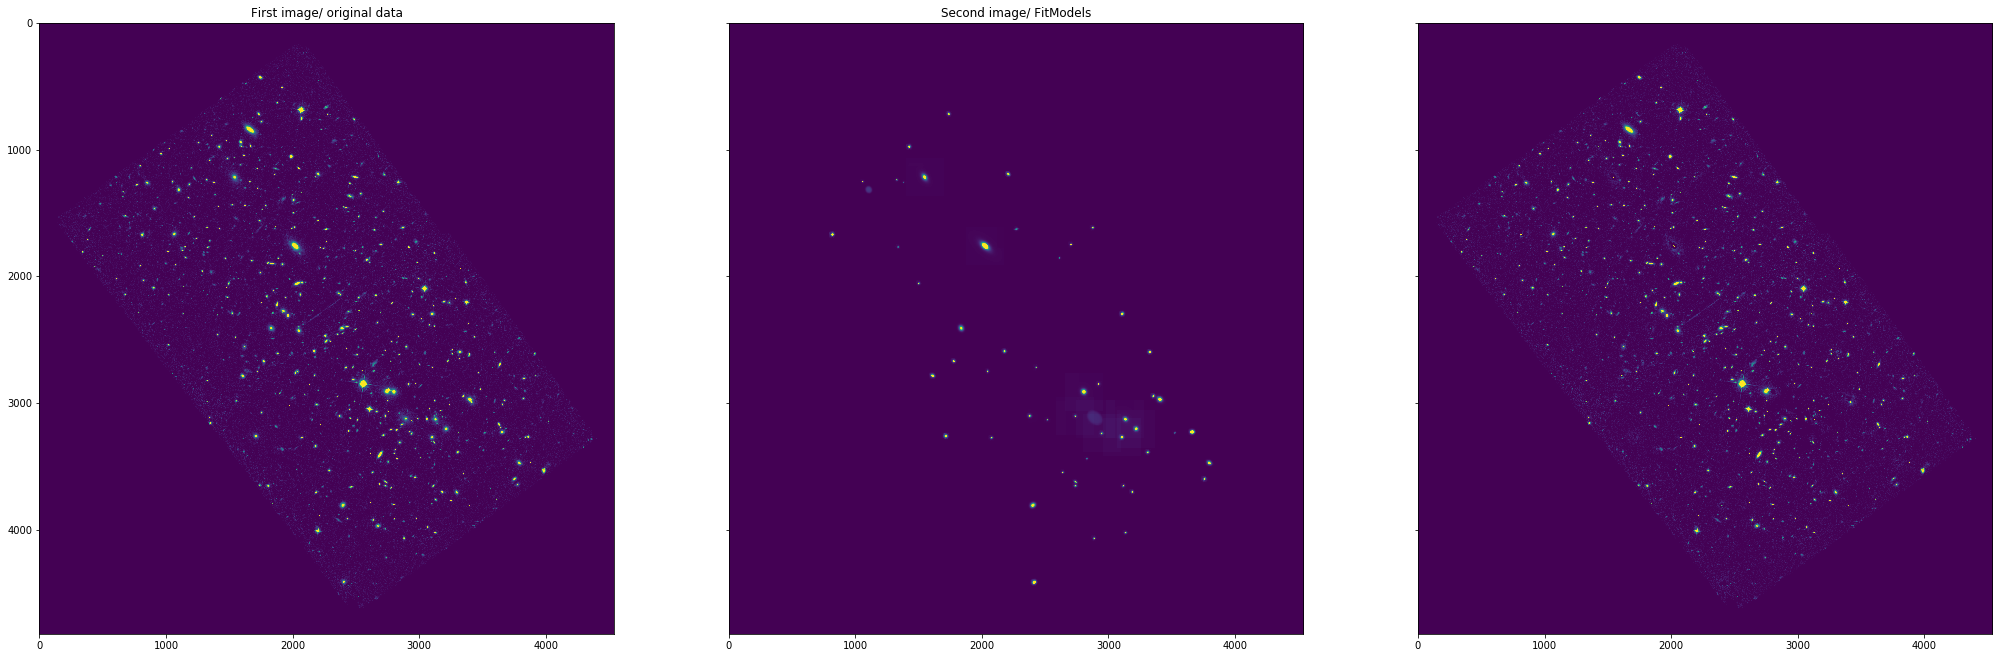

In [19]:
#plotting first 4 filters only b/c same size

emptyfields = {}
for filter in filters[0:1]:
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    for COUNT,fn in enumerate(bestoutputs): #coudl enumerate filters, if get 10 arrays for bestoutputs[count]
        #print('test:',filter)
        try:
            image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/{}'.format(filter,fn))
            imagefile = pyfits.open(image)
            fitsec = imagefile[2].header['FITSECT']
            x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
            x_upper = int(fitsec.split(",")[0].split(":")[1])
            y_lower = int(fitsec.split(",")[1].split(":")[0])-1
            y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
            #print(COUNT,x_lower,x_upper,y_lower,y_upper,'FOR',image[30::],np.shape(imagefile[2].data))
            #print('mytest:',np.shape(imagefile[2].data))
            data = imagefile[2].data
            #print('for lsast test',np.shape(emptyfields[filter][x_lower:x_upper,y_lower:y_upper]),np.shape(emptyfields[filter]))
            emptyfields[filter][y_lower:y_upper,x_lower:x_upper]+=imagefile[2].data #note x,y order flip
            #print('SECOND',np.shape(emptyfields[filter][x_lower:x_upper,y_lower:y_upper]),np.shape(original_image_data))
            #print('COUNT:',COUNT)
        except urllib.error.URLError:
            print('missing',filter,fn)
        except ValueError as err:
            print('The Valuerror here is :',err)
            #print('pix sector less than 4 digits')
    background = original_image_data - emptyfields[filter]
    #plots one for each
    f, (ax1,ax2,ax3) = mpl.subplots(1,3,sharey=True,figsize=(35,35))
    ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
    ax1.title.set_text('Original Image')
    ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
    ax2.title.set_text('Cluster Galaxy Models')
    ax3.imshow(background,vmin=0,vmax=0.2)#residuals
    ax3.title.set_text('Subtracted Image')

(2500, 3500)

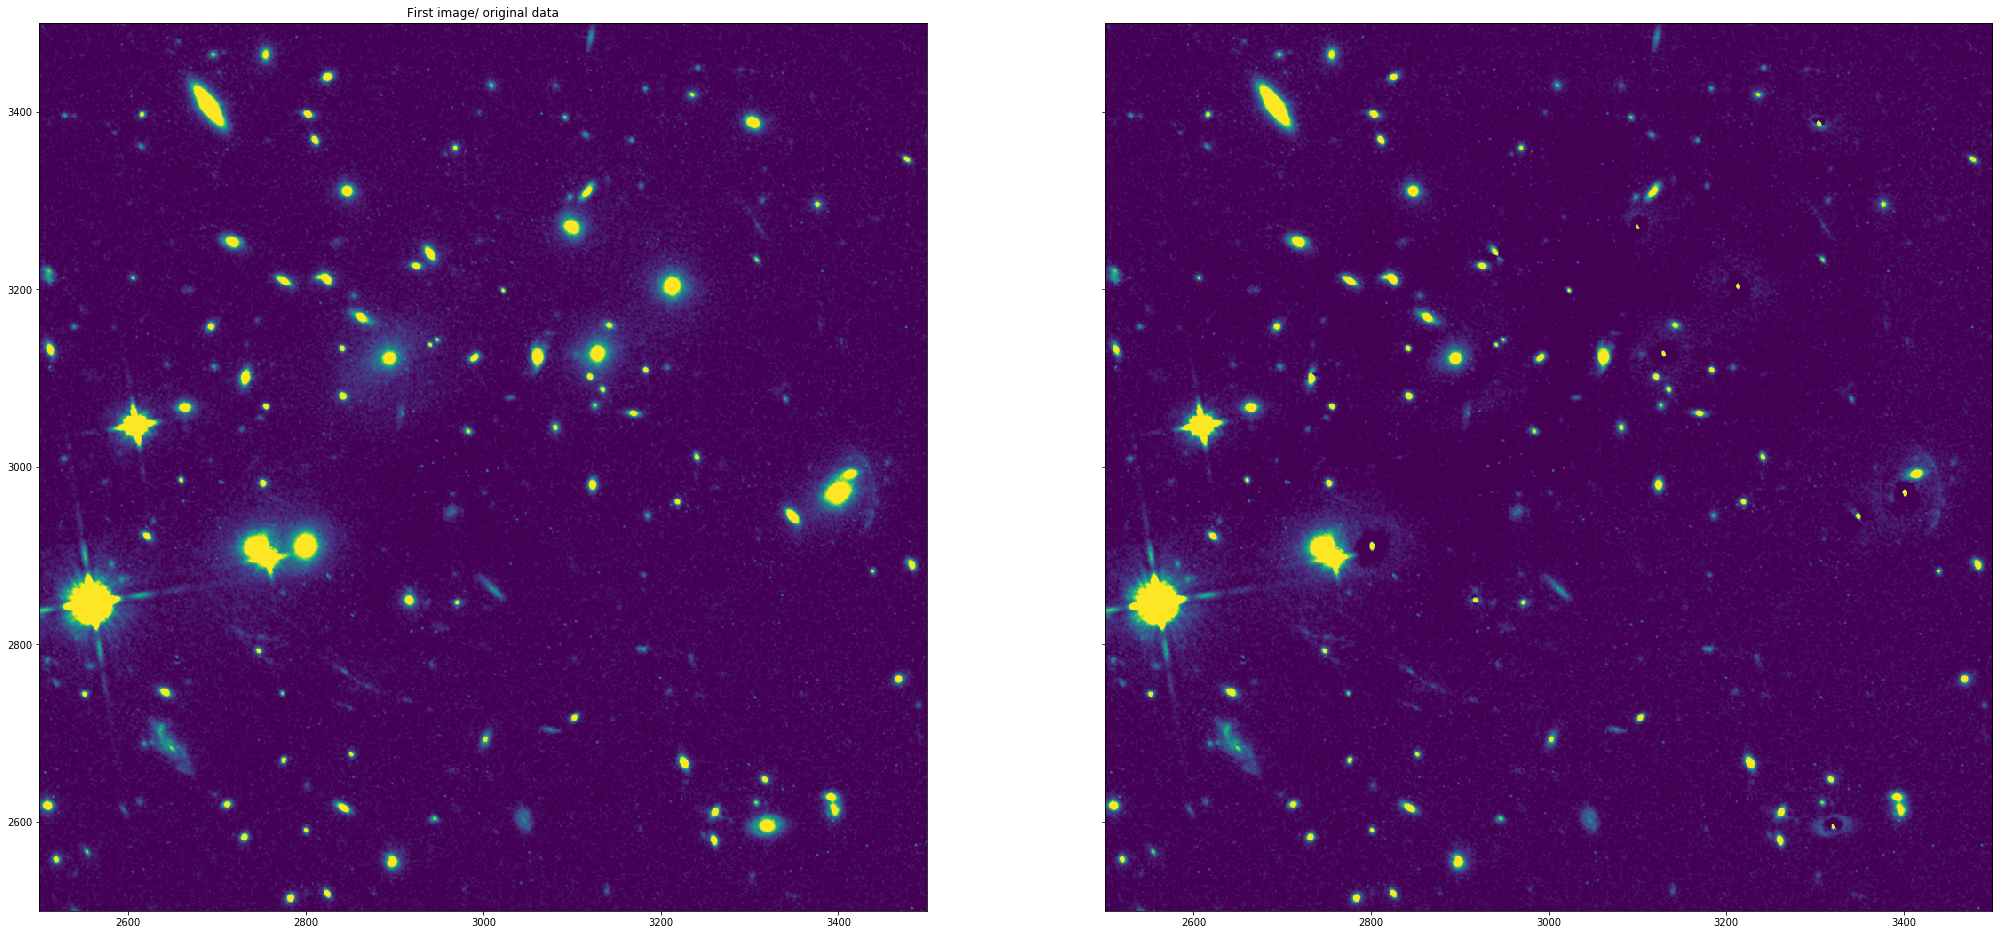

In [18]:
    f, (ax1,ax2) = mpl.subplots(1,2,sharey=True,figsize=(35,35))
    ax1.imshow(original_image_data,vmin=0,vmax=0.2) #elgordo
    ax1.title.set_text('First image/ original data')
    #ax2.imshow(emptyfields[filter],vmin=0,vmax=0.2)#subtracted galaxies
    #ax2.imshow(np.flip(emptyfields[filter],axis=1),vmin=0,vmax=0.2)
    #ax2.title.set_text('Second image/ FitModels')
    ax2.imshow(background,vmin=0,vmax=0.2)#residuals
    ax1.set_ylim(2500,3500)
    ax2.set_ylim(2500,3500)
    ax1.set_xlim(2500,3500)
    ax2.set_xlim(2500,3500)

(53,)
1871 2172 1610 1911
1183 1484 1618 1919
2022 2323 2440 2741
2547 2848 1597 1898
1394 1695 1067 1368
1230 1531 1108 1409
1622 1923 2520 2821
1347 1648 1904 2205
2117 2418 1477 1778
2458 2759 1704 2005
1174 1475 1087 1388
2053 2354 1042 1343
1683 1984 2259 2560
2720 3021 1464 1765
1583 1884 566 867
2271 2572 2569 2870
2766 3067 2700 3001
972 1273 1185 1486
2650 2951 2761 3062
2362 2663 2982 3283
1272 1573 826 1127
1457 1758 2635 2936
665 966 1519 1820
2223 2524 2951 3252
1891 2192 2599 2900
2582 2883 2950 3251
903 1204 1102 1403
1922 2223 3123 3424
2953 3254 2145 2446
2950 3251 3120 3421
3250 3551 2821 3122
3063 3364 3053 3354
2482 2783 3396 3697
2742 3043 2973 3274
1560 1861 3110 3411
3198 3499 2794 3095
2584 2885 3470 3771
3169 3470 2446 2747
2790 3091 3090 3391
2978 3279 2977 3278
2584 2885 3504 3805
2674 2975 3289 3590
3154 3455 3238 3539
2247 2548 3656 3957
3031 3332 3551 3852
2962 3263 3503 3804
3640 3941 3322 3623
3367 3668 3085 3386
3601 3902 3448 3749
2978 3279 3873 4174
2

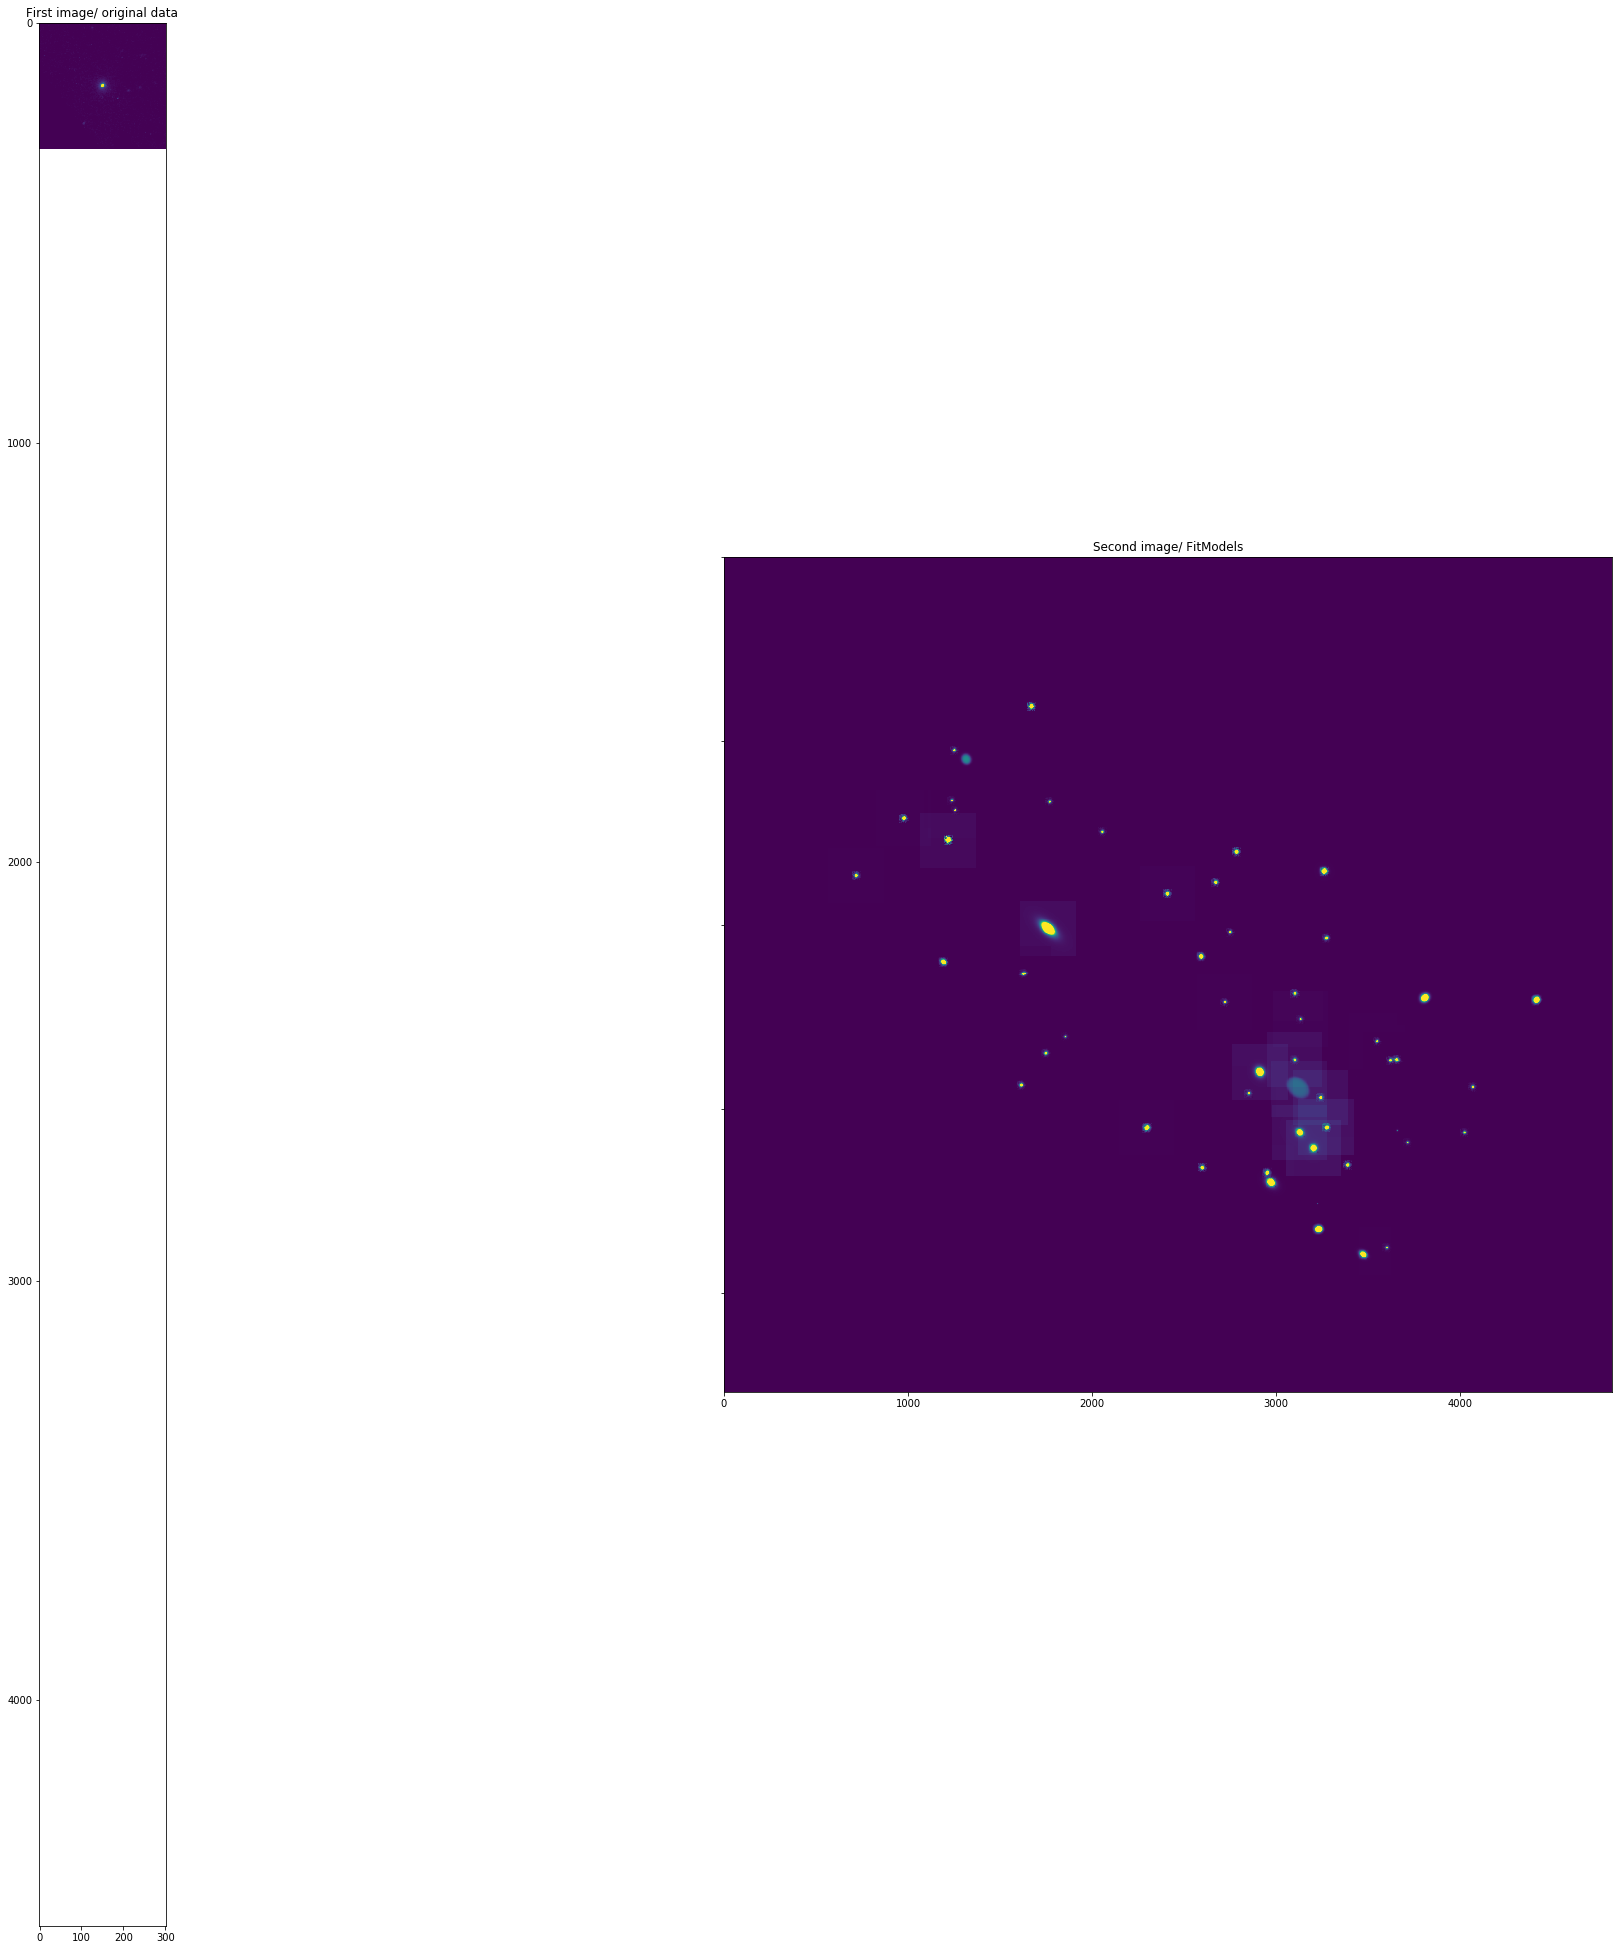

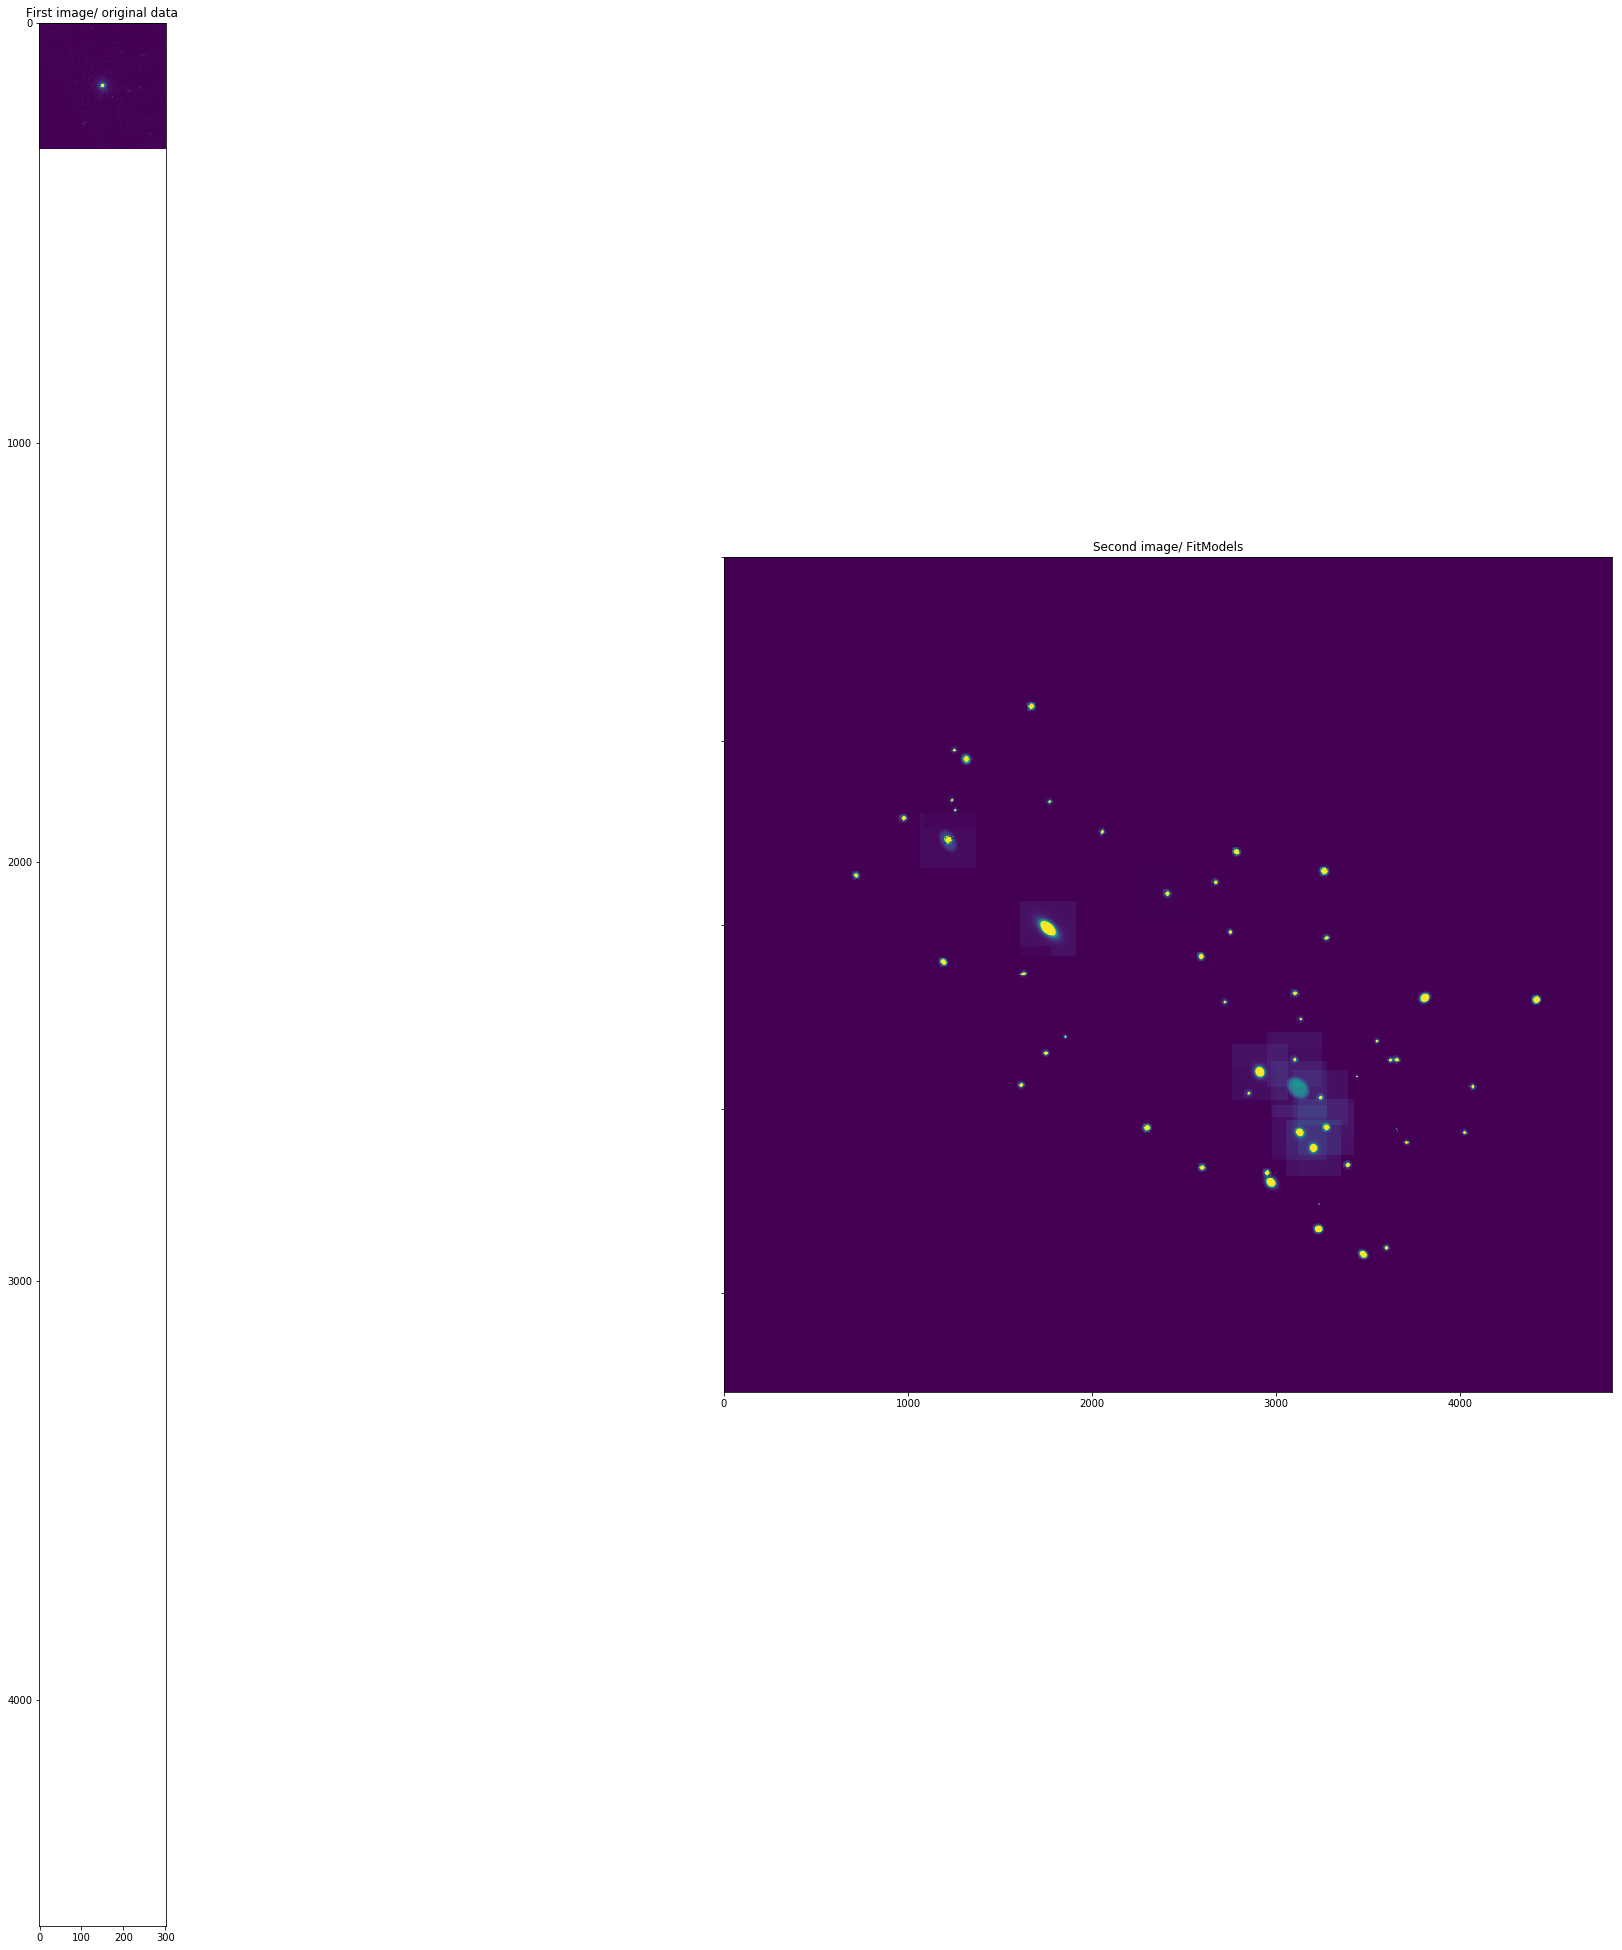

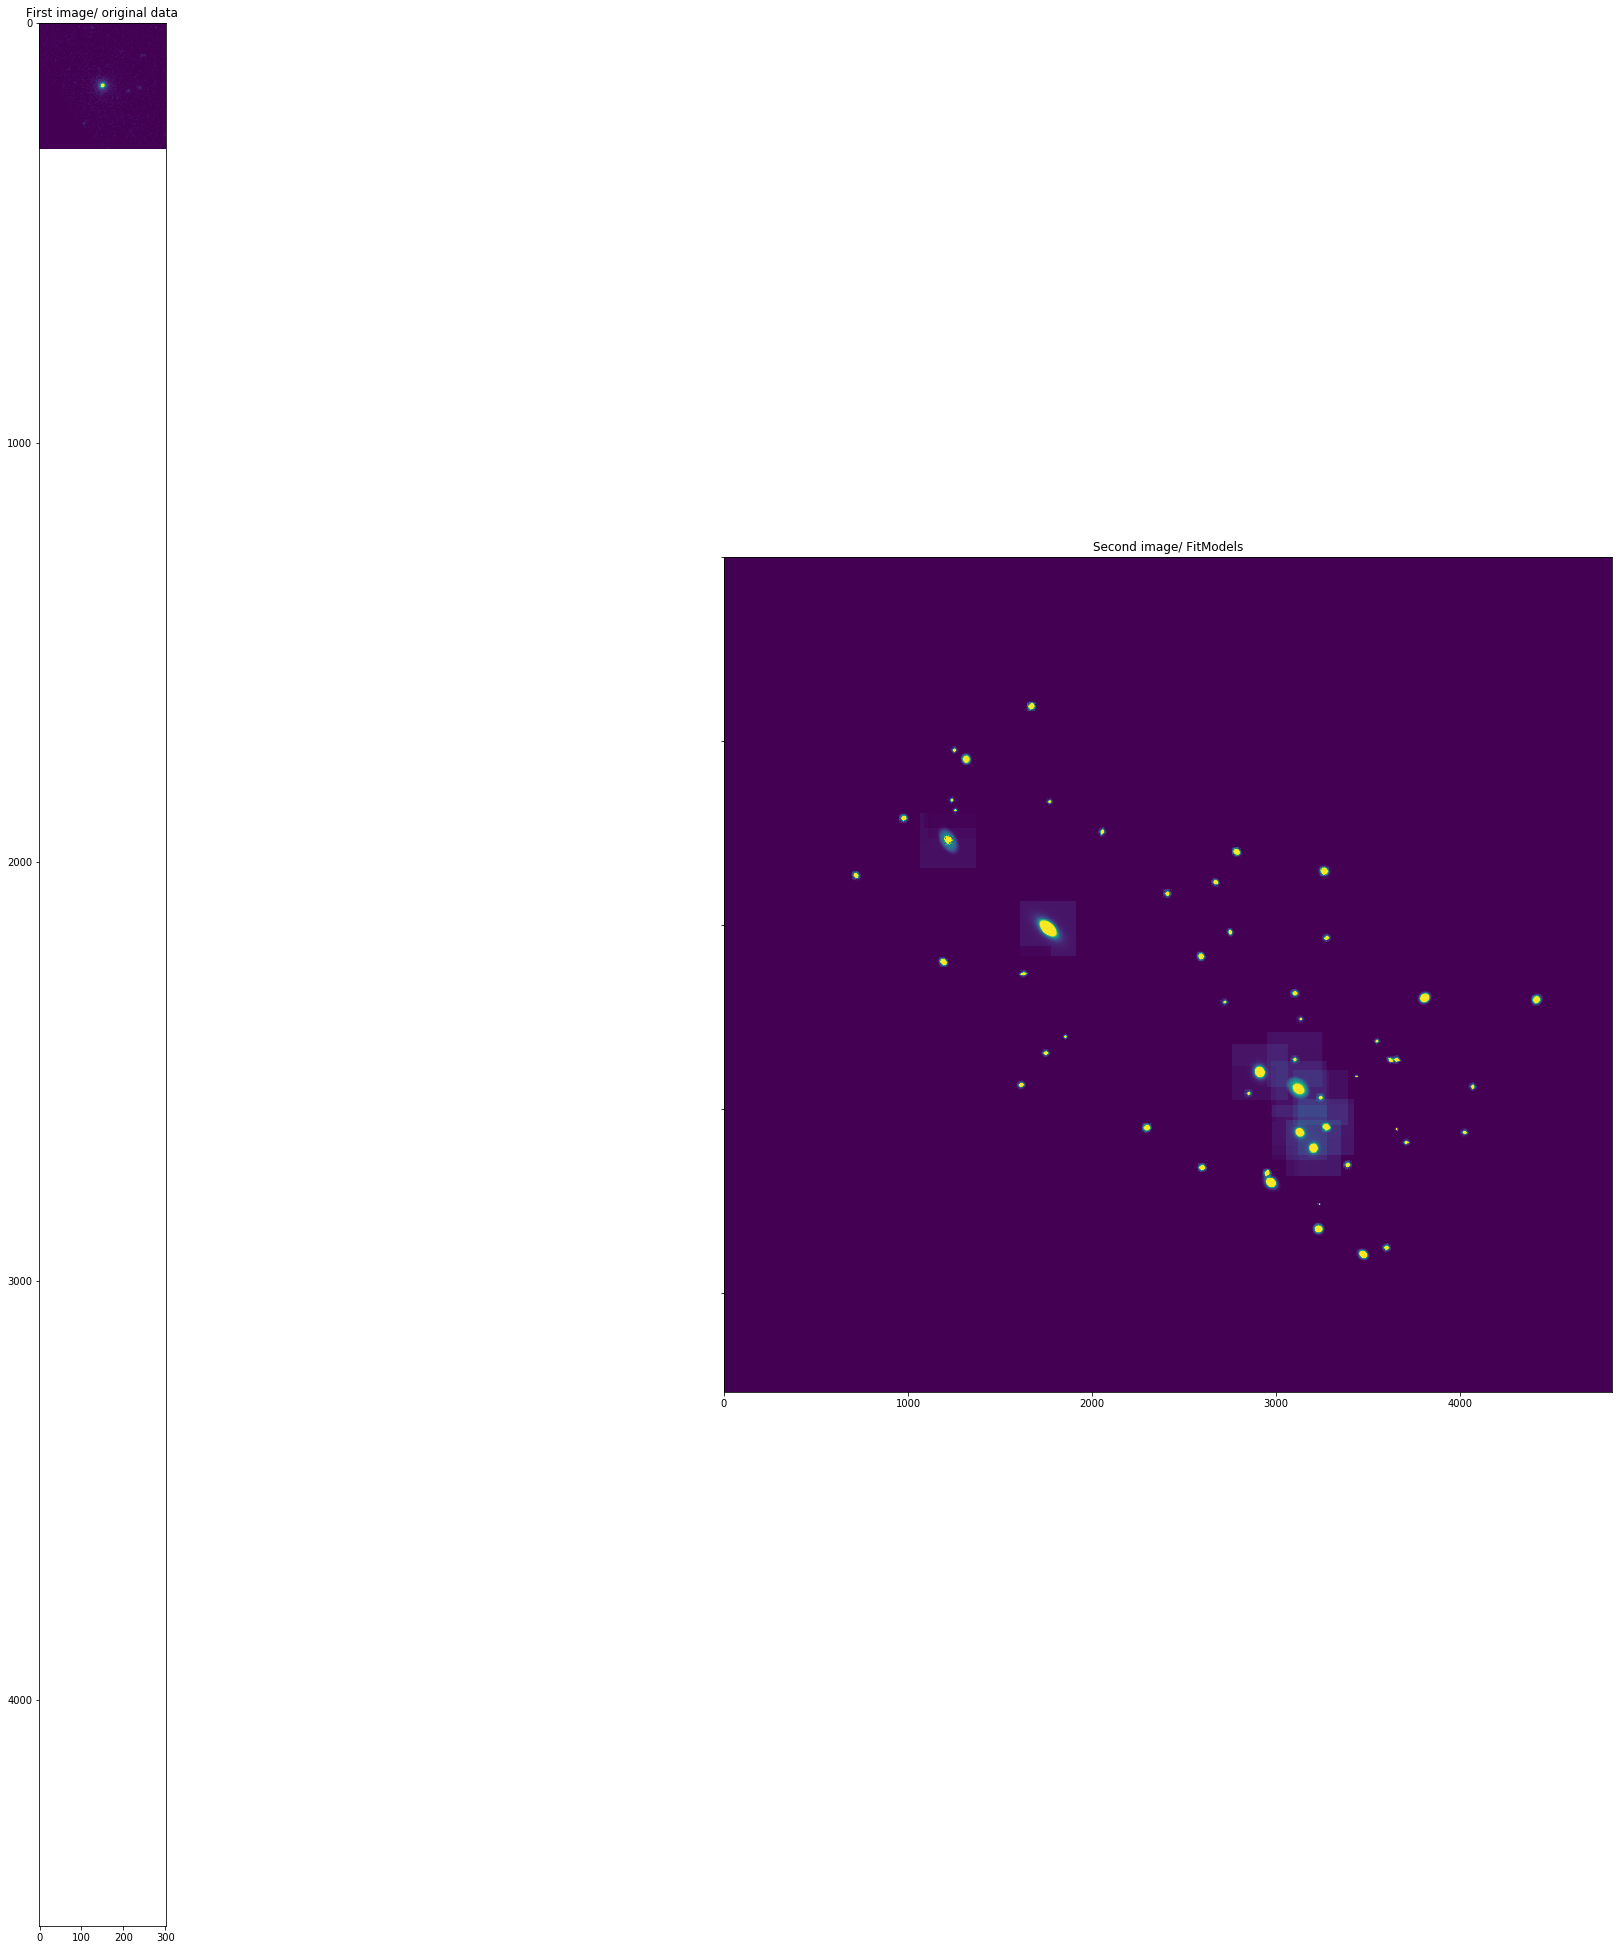

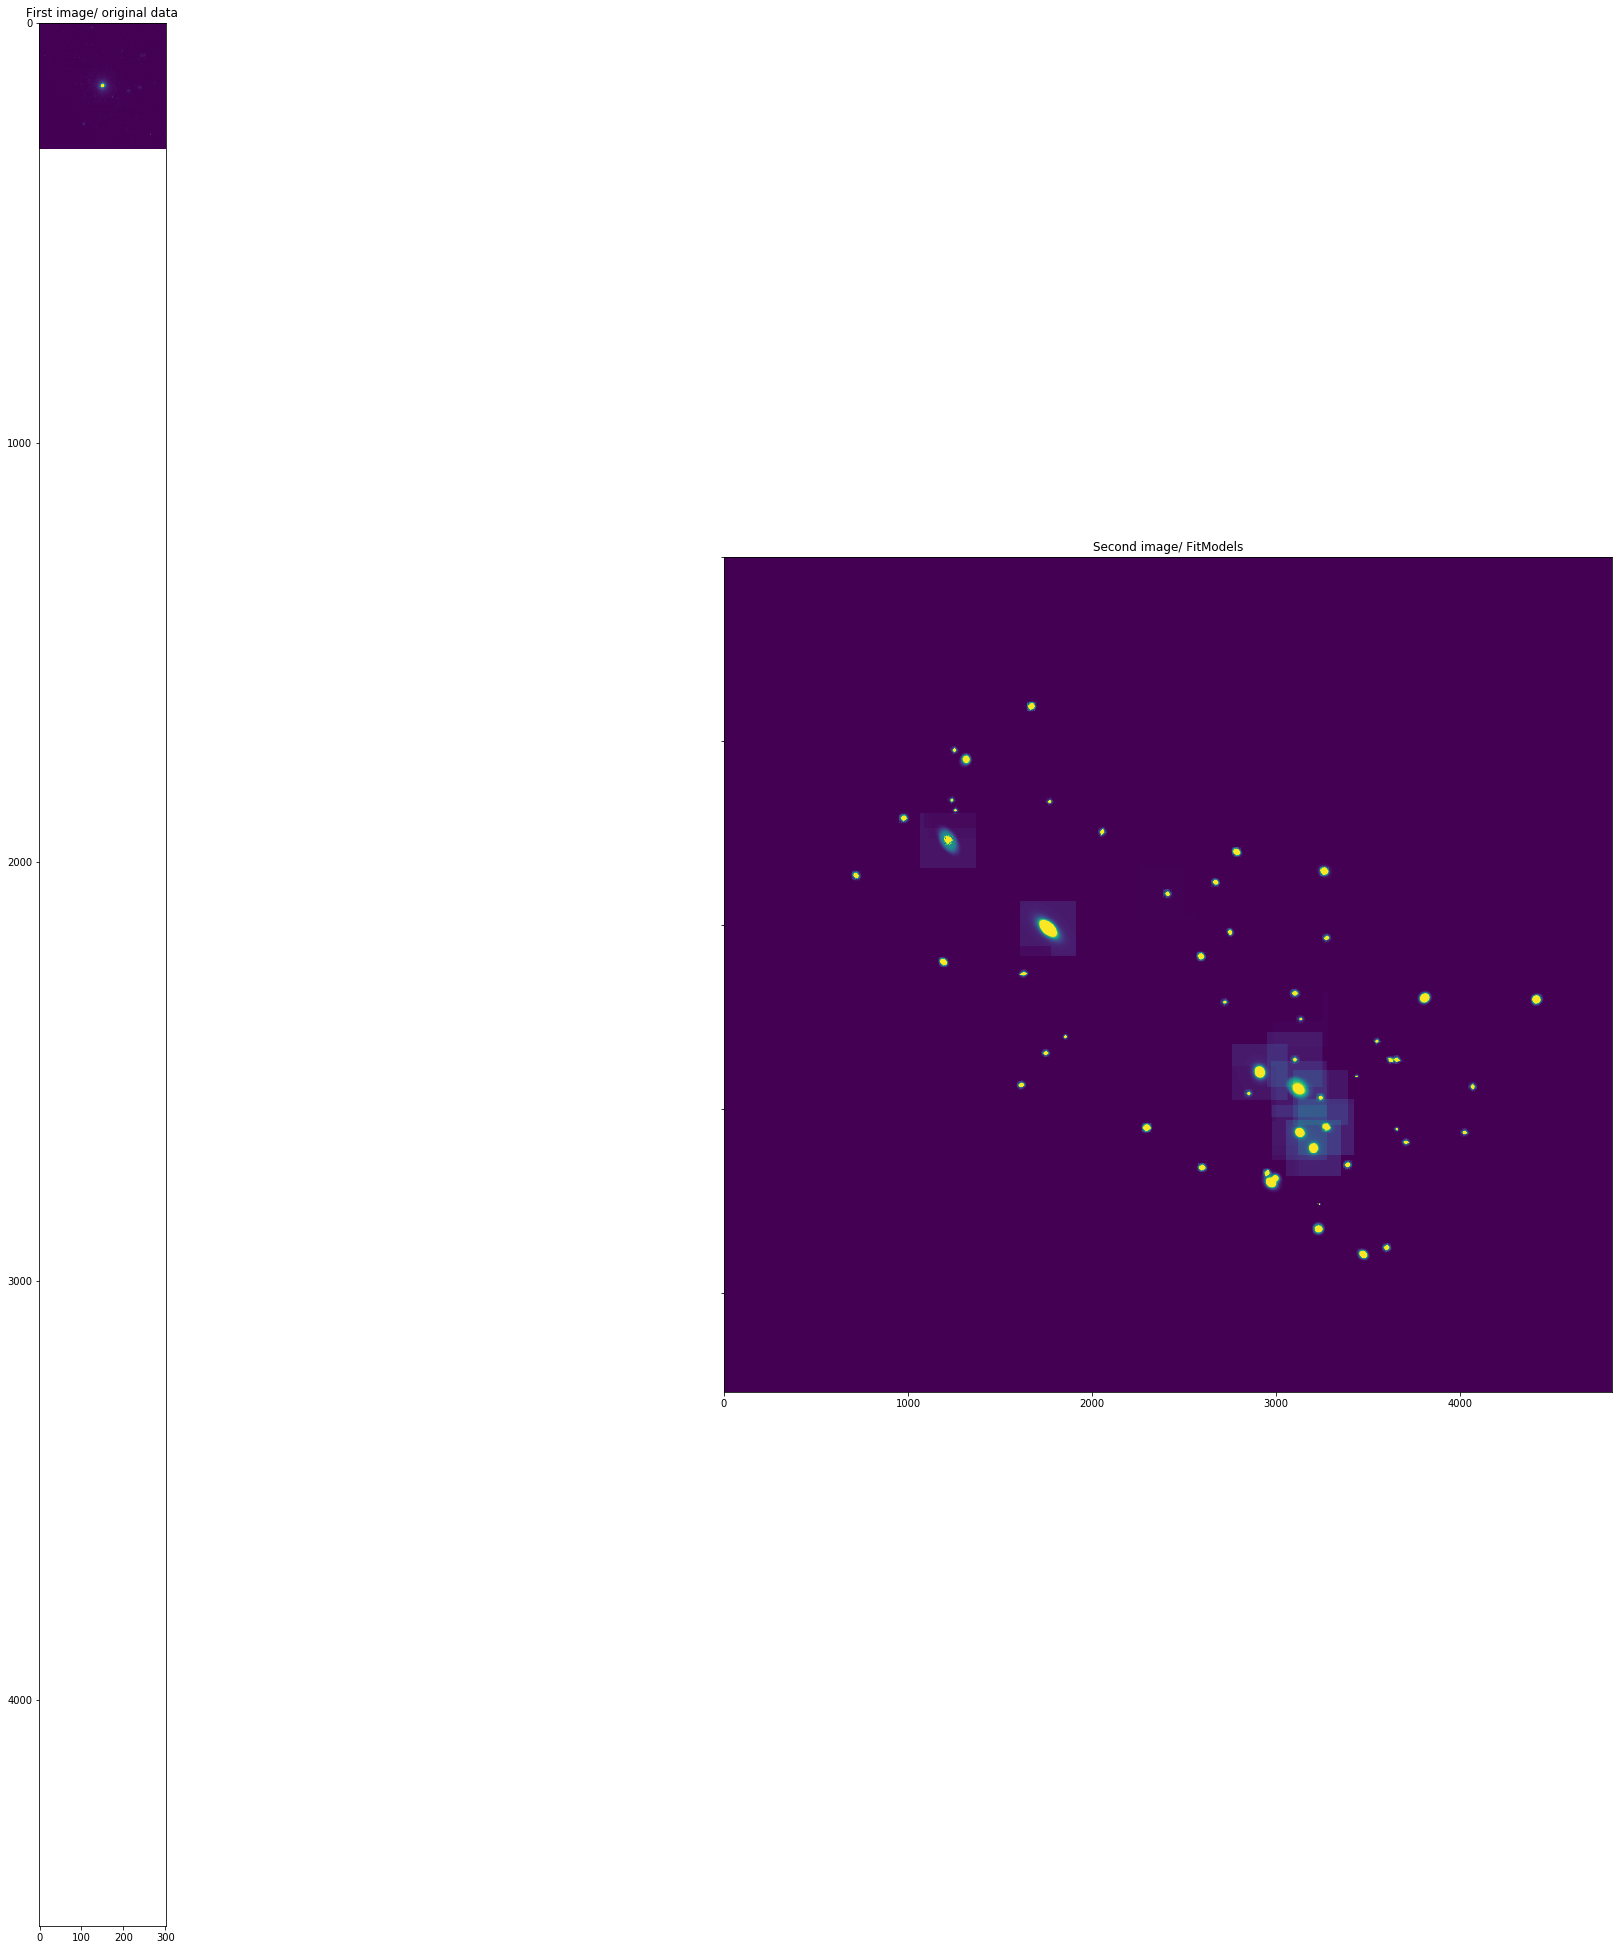

In [29]:
#works for outputs in ascending order,modifying above

#plotting first 4 filters only b/c same size
'''
emptyfields = {}
for filter in filters[0:4]:
    originalimage = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filter))
    original_image_data = pyfits.getdata(originalimage)
    emptyfields[filter] = np.zeros_like(original_image_data)
    
    if filter == 'F850LP':
        tfilter = filter[:-2]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))
    else:
        tfilter = filter[:-1]
        detect_nums = np.arange(0,len(masterdata[~masterdata['X_IMAGE_{}'.format(tfilter)].mask]))  
        print(np.shape(detect_nums))
        for count in detect_nums:
            try:
                image = get_pkg_data_filename('/run/media/rowland/PURPLEDRIVE/{}/Outputs/output{}.fits'.format(filter,count))
                
                imagefile = pyfits.open(image)
                
                #need to sum locations to one field but maintain shape of model, cant use only xc,yc
                
                
                ##xc = int(imagefile[2].header['2_XC'][1:-6])
                #print(type(xc),xc[1:-6])
                ##print(xc,type(xc))
                ##yc = int(imagefile[2].header['2_YC'][1:-6])
                fitsec = imagefile[2].header['FITSECT']
            
                x_lower = int(fitsec.split(",")[0].split(":")[0][1:])-1
                x_upper = int(fitsec.split(",")[0].split(":")[1])
                y_lower = int(fitsec.split(",")[1].split(":")[0])-1
                y_upper = int(fitsec.split(",")[1].split(":")[1][:-1])
                print(x_lower,x_upper,y_lower,y_upper)
                data = imagefile[2].data
                emptyfield[x_lower:x_upper,y_lower:y_upper]+=imagefile[2].data
                #emptyfield[int(imagefile[2].header['FITSECT'][1:-1])]=1
#                 emptyfield.astype('int')
#                 data.astype('int')
#                 print(np.shape(data),np.shape(emptyfield))
#                 models = np.sum(emptyfield,data)
#                 ##print(xc,yc,np.shape(data),np.shape(emptyfield),emptyfield[xc,yc])
                ##emptyfield[xc,yc]=1
                ##print('new empty field',emptyfield[xc,yc])
                #print(emptyfield)
            except urllib.error.URLError:
                print('missing',filter,count)
            except ValueError as err:
                print(err)
                print('pix sector less than 4 digits')
            #image = get_pkg_data_filename('/data1/rowland/{}/Outputs/output{}.fits'.format(filter,count))
            image_1 = pyfits.getdata(image,ext =1) #original
            image_2 = pyfits.getdata(image, ext=2) #model
        #print(imagefile[2].header['2_XC'],filter,count)
        #break
            #mpl.imshow(emptyfield,vmin=0,vmax=1)
        #print(imagefile[2]['2_XC'])
        #print(np.shape(image_2),(pyfits.open(image))[2]['2_XC'])
#         sky_coords = 
        #models = np.sum(emptyfield,image_2)
        #print(np.shape(models))
        
        f, (ax1,ax2) = mpl.subplots(1,2,sharey=True,figsize=(35,35))
        ax1.imshow(image_1,vmin=0,vmax=1) #change to elgordo
        ax1.title.set_text('First image/ original data')
        ax2.imshow(emptyfield,vmin=0,vmax=0.2)
        ax2.title.set_text('Second image/ FitModels')
        ''' 

In [30]:
emptyfields

{'F105W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F125W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F140W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'F160W': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
   

# old code for mini kabooms only, doesnt include real ones

In [ ]:
#OLD -2 of 4, doesnt count real kabooms, only mini kabooms

#splits kabooms by filter and sets up next cell

# kaboom = Table([kaboomfs,kaboomis],names=('filter','detection_number'))
# master = np.arange(0,len(masterdata))

# T105 = kaboom[np.where(kaboom['filter']==filters[0])]
# T125 = kaboom[np.where(kaboom['filter']==filters[1])]
# T140 = kaboom[np.where(kaboom['filter']==filters[2])]
# T160 = kaboom[np.where(kaboom['filter']==filters[3])]
# T435 = kaboom[np.where(kaboom['filter']==filters[4])]
# T606 = kaboom[np.where(kaboom['filter']==filters[5])]
# T625 = kaboom[np.where(kaboom['filter']==filters[6])]
# T775 = kaboom[np.where(kaboom['filter']==filters[7])]
# T814 = kaboom[np.where(kaboom['filter']==filters[8])]
# T850L = kaboom[np.where(kaboom['filter']==filters[9])]

# mytables = [T105,T125,T140,T160,T435,T606,T625,T775,T814,T850L]

# #added here
# # realkb = Table([totalrealkaboomn,totalrealkaboomf], names=('detection_number', 'filter'))
# # T105kb = realkb[np.where(realkb['filter']==filters[0])]
# # T125kb = realkb[np.where(realkb['filter']==filters[1])]
# # T140kb = realkb[np.where(realkb['filter']==filters[2])]
# # T160kb = realkb[np.where(realkb['filter']==filters[3])]
# # T435kb = realkb[np.where(realkb['filter']==filters[4])]
# # T606kb = realkb[np.where(realkb['filter']==filters[5])]
# # T625kb = realkb[np.where(realkb['filter']==filters[6])]
# # T775kb = realkb[np.where(realkb['filter']==filters[7])]
# # T814kb = realkb[np.where(realkb['filter']==filters[8])]
# # T850Lkb = realkb[np.where(realkb['filter']==filters[9])]
# # mytableskb = [T105kb,T125kb,T140kb,T160kb,T435kb,T606kb,T625kb,T775kb,T814kb,T850Lkb]


# print(len(np.where(masterdata['NUMBER_F435']>0)[0])) 
# print(len(T105),len(T125),len(T140),len(T160),len(T435),len(T606),len(T625),len(T775),len(T814),len(T850L))
# type(mytables[0]['detection_number'].astype('int'))

In [ ]:
#OLD -3 of 4 doesnt count real kabooms, only mini kabooms


#doing all below in one cycle--WORKS

# masks=[]
# allfilters=[]
# mastermatch = []
# idx=[]

# #matches kaboom index (in detection order) with masterdata index (that includes masked nondetections)
# for i,f in enumerate(filters):
#     if f == 'F850LP':
#         fn = f[:-2]
#         tn = f[1:-2]
#     else:
#         fn = f[:-1]
#         tn = f[1:-1]
#     arr1 = (np.where(masterdata['NUMBER_{}'.format(fn)] > 0)[0])
#     arr2 = mytables[i]['detection_number'].astype('int')
#     newarr = np.zeros(len(arr1))
#     newarr[:] = np.nan
#     newarr[arr2] = arr1[arr2]
#     masks.append(newarr)
# for mask in masks:
#     eachfilter = mask[~np.isnan(mask)]
#     allfilters.append(eachfilter)
# for i in allfilters:
#     arr3 = np.arange(0,len(masterdata),1) 
#     arr4 = i.astype('int')
#     newerarr = np.zeros(len(arr3))
#     newerarr[:] = np.nan
#     newerarr[arr4] = arr3[arr4]
#     mastermatch.append(newerarr)
    
# #gets index when there was never a z match per filter
# for filter in filters:
#     if filter == 'F850LP':
#         tfilter = filter[:-2]
#         indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
#         idx.append(indices)
#     else:
#         tfilter = filter[:-1]
#         indices = np.where(masterdata['X_IMAGE_{}'.format(tfilter)].mask)
#         idx.append(indices)
        
# #creates 0 & 1 table of galfit runs for kaboom or not
# mastermatch = np.array(mastermatch)
# print('shape:',np.shape(mastermatch))
# mastermatch[np.where(mastermatch>=0.0)]=1 #1 means had a kaboom
# mastermatch[np.where(mastermatch!=1.)]=0 #0 means no kaboom

# #makes nongalfit runs into nan values
# for i,master in enumerate(mastermatch):
#     master[idx[i]]=np.nan
    
# #gets total num of kabooms per detection, another column to add
# sums = np.nansum(mastermatch,axis=0).astype('int') 

In [ ]:
#OLD -4 of 4 doesnt count real kabooms, only mini kabooms
#final table of galfit results #nan=no galfit run; 0=good; 1=KABOOM

# masterkabooms = Table([masterdata['recno'],mastermatch[0],mastermatch[1],mastermatch[2],mastermatch[3],mastermatch[4],\
#                        mastermatch[5],mastermatch[6],mastermatch[7],mastermatch[8],mastermatch[9],\
#                       sums],names=("masterdataRECNO","F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","KaboomTotals"))
# masterkabooms

# TEST CELLS BELOW

In [13]:
 #how many filters had kabooms per galaxy
    
    
# sums = np.nansum(mastermatch,axis=0).astype('int') #this wont let me see the first row b/c values =0 & nans become 0
# numbadfilters =[]
# for count,s in enumerate(sums):
#     if count == 0:
#         count = 99
#     else:
#         count = count
#     #print('count',count)
#     howmanyfilters = s/count
#     numbadfilters.append(howmanyfilters)
#     #print(count,howmanyfilters)
# #print(np.shape(numbadfilters)) #this is per detection row in masterdata, the number of filters that went kaboom    
# numbadfilters = np.array(numbadfilters)
# numbadfilters[np.where(numbadfilters==0.0)]=np.nan
# for count,i in enumerate(numbadfilters):
#     print(count,i)

In [14]:
# print(numbadfilters)

In [15]:
# print(type(numbadfilters))
# numbadfilters=np.array(numbadfilters)
# numbers = np.where(numbadfilters==0.0)
# print('nums:',numbers)
# numbadfilters[np.where(numbadfilters==0.0)]=np.nan
# numbadfilters

In [16]:
# totals = []
# for count,row in enumerate(masterkabooms):
#     for value in row:
#         if value >0:
#         #if value != np.nan:
#             rownum = count
#             totals.append(count)
#             print(count)
#         #print(value, type(value))
#     #print(row =='int')
#     #print(row.as_void()) #prints all rows

In [17]:
# seen = set()
# uniq = []
# for row in masterkabooms:
#     #for value in row:
#     for x in row:
#         if x not in seen:
#             uniq.append(x)
#             seen.add(x)

In [18]:
# uniq = np.array(uniq)
# uniq.astype('int')
# finalis = uniq[~np.isnan(uniq)]
# print(len(finalis),finalis)

In [19]:
#type(uniq),np.shape(uniq),uniq


#### does it all in single steps tho

In [20]:
#does everything in one cycle to create a mask per each filters total detections, not masterdata yet

# masks=[]

# for i,f in enumerate(filters):
#     if f == 'F850LP':
#         fn = f[:-2]
#         tn = f[1:-2]
#     else:
#         fn = f[:-1]
#         tn = f[1:-1]
#     arr1 = (np.where(masterdata['NUMBER_{}'.format(fn)] > 0)[0])
#     print(len(arr1)) #correct
#     arr2 = mytables[i]['detection_number'].astype('int')
#     newarr = np.zeros(len(arr1))
#     newarr[:] = np.nan
#     newarr[arr2] = arr1[arr2]
#     masks.append(newarr)


In [21]:
# fullt = np.zeros((10,89))
# #print(np.shape(fullt),fullt)
# for filternum,mask in enumerate(masks):
#     for count,val in enumerate(mask):
#         print(val)
#         print(fullt[filternum][val])
#         fullt[filternum] = fullt[filternum][val] + mask[count]
# print(np.shape(fullt),fullt)


In [22]:
#dont need anymore

# #testing how to match masks to masterdata size and then insert it into above loop before masks.append
# import numpy.ma as ma
# mastermatch = []
# for i in masks:
#     arr3 = np.arange(0,len(masterdata),1) #might wana start at 0 and +1 b/c recno goes from 1-89 but 4 now this is 0-88
#     #arrtest = np.ma(i)
#     print('masterdata shape:',np.shape(arr3),type(arr3))
#     arr4 = np.ma(i)
#     print('i type:',type(i))
#     ##i.compressed()
#     ##arr4 = i#.compressed()
#     print('checking original mask array:',type(arr4),np.shape(arr4),arr4.dtype,arr4)
#     newerarr = np.zeros(len(arr3))
#     newerarr[:] = np.nan
#     ##arr5=[]
#     ##print('check if starts empty:',np.shape(arr5))
#     ##arr5 = (arr4 >= 0)
#     #for n in arr4 != np.nan:
#     #    arr5.append(n)
#     ##diff = len(arr3) - len(arr5)
#     ##extras = np.repeat('False',diff)
#     ##print('extra info:',np.shape(extras),extras)
#     ##arr5 = np.append(arr5, extras)
#     #arr5 = np.array(arr5, dtype=object)
#     ##arr5 == 'True' 
#     ##print('shape after append:',np.shape(arr5),type(arr5),arr5)
#     newerarr[arr4] = arr3[arr4] #cant do this with a mask
#     mastermatch.append(newerarr)

In [23]:
# x = np.ma.array(np.arange(5), mask=[0]*2 + [1]*3)
# x.compressed()

# type(x.compressed())

In [24]:
# allfilters=[]
# for mask in masks:
#     eachfilter = mask[~np.isnan(mask)]
#     allfilters.append(eachfilter)
# print(np.shape(allfilters),allfilters[0])

In [25]:
# #testing how to match masks to masterdata size and then insert it into above loop before masks.append
# import numpy.ma as ma
# mastermatch = []
# for i in allfilters:
#     arr3 = np.arange(0,len(masterdata),1) #might wana start at 0 and +1 b/c recno goes from 1-89 but 4 now this is 0-88
#     arr4 = i.astype('int')
#     newerarr = np.zeros(len(arr3))
#     newerarr[:] = np.nan
#     #print('my test:',np.shape(arr2),np.shape(arr1))#,arr2)
#     newerarr[arr4] = arr3[arr4]
#     mastermatch.append(newerarr)
# print(np.shape(mastermatch),mastermatch[0])

In [26]:
# filters = ("F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP")

# masterkabooms = Table([mastermatch[0],mastermatch[1],mastermatch[2],mastermatch[3],mastermatch[4],\
#                        mastermatch[5],mastermatch[6],mastermatch[7],mastermatch[8],mastermatch[9]],\
#                       names=("F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"))
# print(masterkabooms[:])

In [27]:
# for num,i in enumerate(masterdata['NUMBER_F606']):  ###this proves mask values are index of masterdata for each filter
#      print(num,i)

#T606

In [28]:
#checking = learned these wont match to masterdata yet, these are only masks per filter's detections!

# viewing = hstack(masks) #values in table is the # of object in filter, col are each filter, table length matches masterdata
# # for row in viewing:
# #     print(row)
# viewing
# # for i in viewing['col0_1']:
# #     print(i)

In [29]:
#trying to match these masks to full masterdata 


#newtable = masterdata['NUMBER_F105','NUMBER_F125','NUMBER_F435']
# ONLY = masterdata[np.where(masterdata['NUMBER_F105']>0)]
# ONLY

In [30]:
#mytables[0]#['detection_number']

In [31]:
# for i in np.where(masterdata['NUMBER_F435']>0):
#     print(i)

In [32]:
#test on single filter


#gets corresponding indices

# arr1 = (np.where(masterdata['NUMBER_F105'] > 0)[0])
# print(type(arr1),arr1,'lenght:',len(arr1))
# arr2 = T105['detection_number'].astype('int')
# print('t2',type(arr2),len(arr2))

# newarr = np.zeros(53)
# newarr[:] = np.nan
# newarr[arr2] = arr1[arr2]
# print(newarr) #these are the indices of masterdata table that have kaboom values for F105 detections

In [115]:
# # totalgals = np.zeros(len(masterdata))
# # np.shape(totalgals)
# # new = totalgals + [T105['detection_number'].data]
# # new
# values105 = T105['detection_number'].data
# print(type(values105),np.shape(values105),'problem',len((masterdata['NUMBER_F105']>0)),len(T105['detection_number'].data))
# total = len(masterdata['NUMBER_F105']>0)
# kbs = len(T105['detection_number'].data)
# missing = total - kbs
# print(type(missing),np.shape(missing),missing)
# new = np.append(values105, missing)
# np.shape(new)

In [112]:
# # m105 = join(masterdata['recno'],T105)
# # m105
# mask = np.where(masterdata['NUMBER_F105'] > 0)
# len(mask[0]),mask[0][::]
# #type(mask[0])
# totaldetections = np.arange(0,len(mask))
# mask #index in masterdata of detections (length 53)


In [113]:
# collect = []
# for i in master:
#     #print(i) #0-88
#     if i not in T105['detection_number'].data:
#         newi = 0
# #     elif i != np.any(T105['detection_number']:
# #         newi =1
#     collect.append(newi)
# len(collect)

In [114]:
# T105['detection_number'].data


In [209]:
# for count,value in enumerate(mask):
#     abc = (count == np.any(T105['detection_number']))
# abc,len(mask[0])
# b=[]
# for a in T105['detection_number']:
#     print('firsta:',a)
#     for i in totaldetections:
#         print('i:',i,'a:',a)
#         if i == a:
#             c = 0
#             b.append(c)
#         else:
#             c=1
#             b.append(c)

# len(b),b

In [109]:
# mask = []
# for f in filters:
#     numbers = []
#     print('one')
#     for row in kaboom:
#         master = np.arange(0,len(masterdata))
#         print('two')
#         if row['filter'] == f:
#             print('three')
#             nums = row['detection_number']
#             numbers.append(nums)
#     print('nums:',len(numbers))
#     mask = master[(np.where(numbers== np.any(master)))]
# #     for i in numbers:
# #         print('four')
# #         #print(type(i))
# #         master = master[(np.where(i == master))]
# #         mask.append(ma)
#     break
# mask

In [111]:
#trying to split table
# indexlist = np.arange(0,len(masterdata))
# print(np.shape(indexlist))

# allkaboomnums = []
# kaboomt = Table([indexlist,indexlist],names=('asecond4noreason','master_number'))
# for f in filters:
#     #if kaboom['filter'] == f:
#     split = np.where(kaboom['filter']==f)
#     lowerlim = np.min(split)
#     upperlim = np.max(split)
#     new = kaboom['detection_number'][lowerlim:upperlim+1]
#     allkaboomnums.append(new)
#     print(type(new),len(new))
#     kaboomt = hstack([kaboomt,new])#,uniq_col_name = '{col_name}'.format(f))
# kaboomt

# indexlist = np.arange(0,len(masterdata))
# repeatedfull = np.repeat([indexlist],10,axis=0)
# print(np.shape(repeatedfull),repeatedfull)

In [110]:
# for i,value in enumerate(allkabooms):
#     #print(allkabooms[i],'nexxti',value,'next')
#     values = np.array(allkabooms[i])
#     fn = 
#     kaboomt = hstack([kaboomt,values],uniq_col_name = '{}_{}'.format(fn,i))
# kaboomt

# getting example plots for presentation


In [3]:

def select_object_segmap(segmap,index):
    Regions = np.zeros_like(segmap)
    if index not in segmap:
        raise ValueError('index not in segmentation map')
    Regions[segmap==index]=index
    return Regions

In [7]:
def usingfilter(filtername):
    #filter = filtername
    detected_objs_file_table = ascii.read('/run/media/rowland/PURPLEDRIVE/testPSF_{}.cat'.format(filtername))
    image_file = pyfits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filtername))
    segmap_file = pyfits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(filtername))
    data_perfilter = detected_objs_file_table, image_file, segmap_file, filtername
    return(data_perfilter)

In [8]:
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP","F105W_galfit_test_folder"]
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}

#ONLY CHANGES NEEDED: FILTER HERE, ADJUST B1&B2 VALUES & MAG CUT AS NEEDED
############################################################################
data = usingfilter(filters[0])
############################################################################
print('Currently using this filter:',data[3])

Currently using this filter: F105W


In [9]:
detected_objs_file = data[0]
image_file = data[1]
segmap_file = data[2]
filtername = data[3]


<Table masked=True length=89>
  ACT-CL          SMH         ... FLUX_RADIUS_F850     Separation    
  str10          str18        ...     float64           float64      
---------- ------------------ ... ---------------- ------------------
J0102-4915 J010257.7-491619.2 ...           11.831 1.0754938057555303
J0102-4915 J010301.9-491618.8 ...            3.449 1.3190066447193471
J0102-4915 J010256.8-491529.5 ...            3.879 0.9207549720952949
J0102-4915 J010253.6-491619.9 ...            3.583 0.6373238022439871
J0102-4915 J010300.6-491651.6 ...           10.293 1.3378085446843953
J0102-4915 J010303.5-491624.9 ...               --                 --
J0102-4915 J010301.6-491649.4 ...            3.255 1.4337596823174448
J0102-4915 J010259.2-491524.8 ...             7.95 1.2926809306884182
J0102-4915 J010300.9-491601.5 ...            4.158  1.181886980440979
J0102-4915 J010256.2-491627.1 ...            4.205 0.9930836207863956
       ...                ... ...              ...                ...
J0102-4915 J010255.4-491340.0 ...            4.693  0.555078617885505
J0102-4915 J010254.5-491315.2 ...            3.197 0.5443680478839785
J0102-4915 J010314.2-491635.0 ...            6.068 0.6487224804009911
J0102-4915 J010313.9-491439.1 ...               --                 --
J0102-4915 J010238.3-491412.8 ...            6.009 0.7465421633882857
J0102-4915 J010248.2-491318.4 ...            3.242 0.5017540118105027
J0102-4915 J010317.0-491626.4 ...               --                 --
J0102-4915 J010305.6-491235.6 ...               --                 --
J0102-4915 J010309.9-491300.1 ...               --                 --
J0102-4915 J010243.1-491408.5 ...            8.427   0.70779672621676

In [14]:

segmap = segmap_file[0].data+0 #PARAMETER
collected_regions = []

for detection in masterdata: 
    xc = detection["X_IMAGE_F105"] #in pix #PARAMETER
    yc = detection["Y_IMAGE_F105"] #in pix #PARAMETER
    pixscale = 0.06 #PARAMETER
    index = detection['NUMBER_F105']
    print(type(index))
    #radius=0.5 ##DEFAULT value for reference #PARAMETER
    if type(index) == type(detection['NUMBER_F105'][0]:
        
        each_region = select_object_segmap(segmap,index) #indexing so have matching value so subtracting =0
        collected_regions.append(each_region)
    else:
        continue
collected_regions = np.array(collected_regions)
print('collected_regions: type-',type(collected_regions), 'shape-',collected_regions.shape)    
final_regions = np.sum(collected_regions, axis=0) #COLLECTING ALL OUTPUTS TO ONE MASK
print('shape of final regions:',final_regions.shape)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.ma.core.MaskedConstant'>
<class 'numpy.int6

In [ ]:
#subtracting
mask_file = segmap - final_regions #so the galaxies of the cluster have value=0

#setting values to be binary, all none cluster galaxy pixels are =1 (so galfit will ignore)
mask_file[np.where(mask_file > 0)]=1
#setting regions outside of observation to =1
mask_file[image_data==0]=1

In [ ]:
fig, axis = mpl.subplots(1,4,figsize=(18,8),sharex=True,sharey=True)
axis[0].imshow(image_data,vmin = -0.01,vmax = 0.1)
axis[0].set_title('hubble data')
axis[1].imshow(segmap,vmin=0,vmax=1)
axis[1].set_title('segmap')
axis[2].imshow(final_regions,vmin=0, vmax=1)
axis[2].set_title('detected regions')
axis[3].imshow(mask_file,vmin=0,vmax=1)
axis[3].set_title('mask')